<a href="https://colab.research.google.com/github/joshdohler/FCTT_Project_3/blob/Diego/Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SOC Range: 90% - 100%
Pulse 1: Start Time: 16097.485, End Time: 16197.347
Pulse 2: Start Time: 16707.64499, End Time: 16807.50499
Pulse 3: Start Time: 17327.803, End Time: 17427.665
Pulse 4: Start Time: 17937.96299, End Time: 18037.82299
Pulse 5: Start Time: 18558.121, End Time: 18657.985
Pulse 6: Start Time: 19168.28299, End Time: 19268.145
Pulse 7: Start Time: 19793.443, End Time: 19893.30699
Pulse 8: Start Time: 20403.605, End Time: 20503.465
SOC Range: 80% - 90%
Pulse 1: Start Time: 37151.34399, End Time: 37251.20599
Pulse 2: Start Time: 37761.504, End Time: 37861.36599
Pulse 3: Start Time: 38381.66399, End Time: 38481.53
Pulse 4: Start Time: 38991.828, End Time: 39091.69
Pulse 5: Start Time: 39611.988, End Time: 39711.85199
Pulse 6: Start Time: 40222.15, End Time: 40322.012
Pulse 7: Start Time: 40847.31, End Time: 40947.176
Pulse 8: Start Time: 41457.474, End Time: 41557.336
SOC Range: 70% - 80%
Pulse 1: Start Time: 58204.99099, End Time: 58304.85299
Pulse 2: Start Time: 58815.151

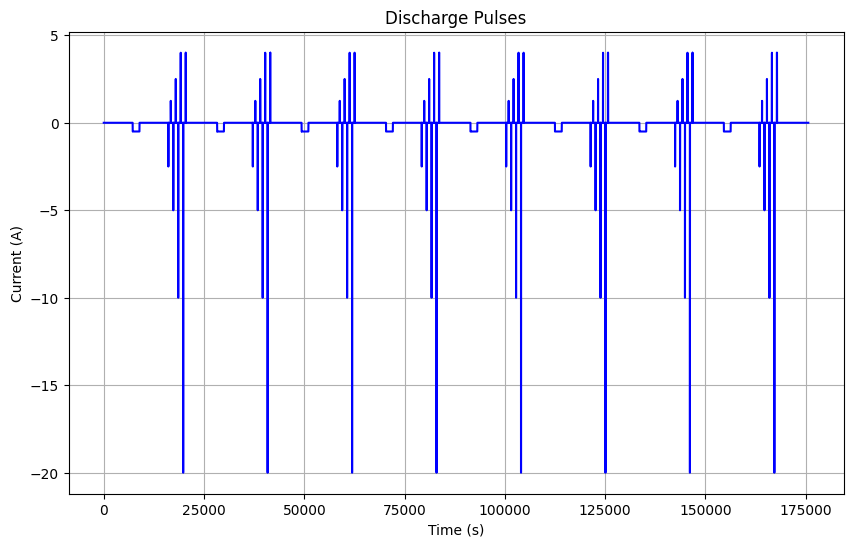

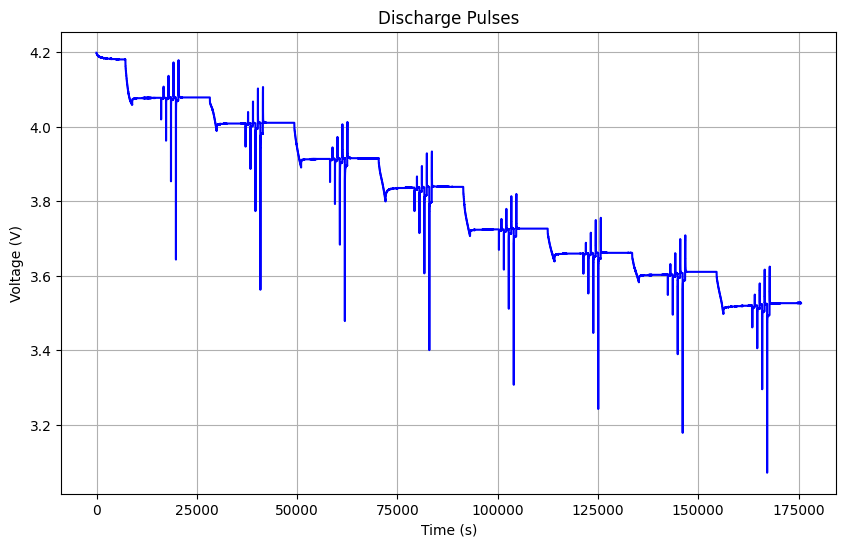

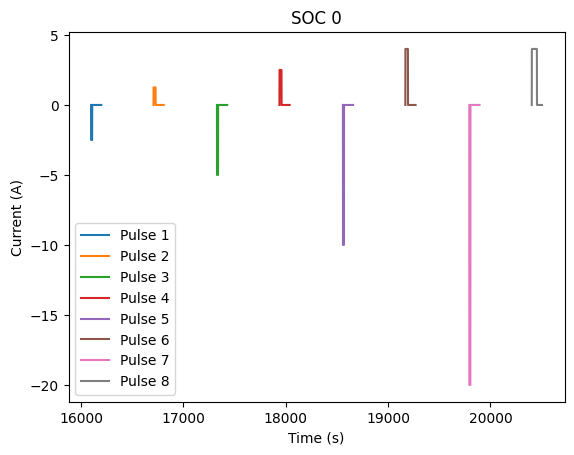

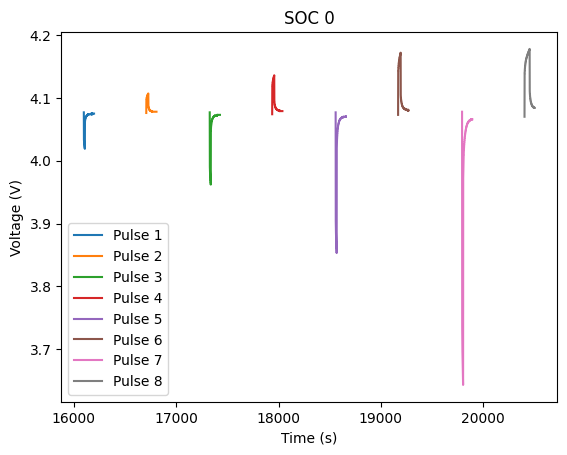

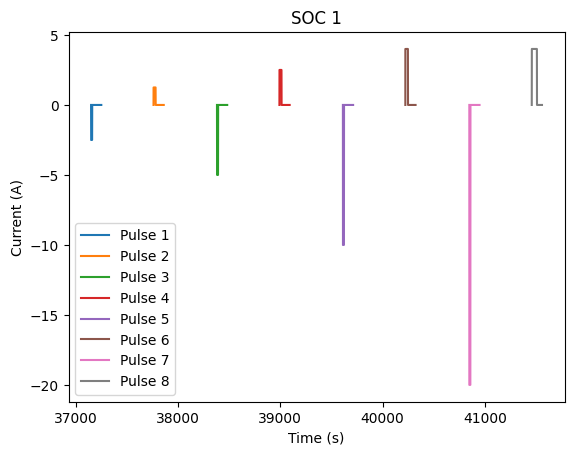

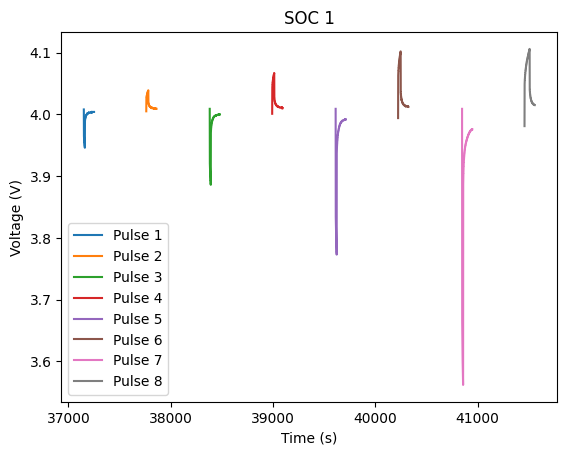

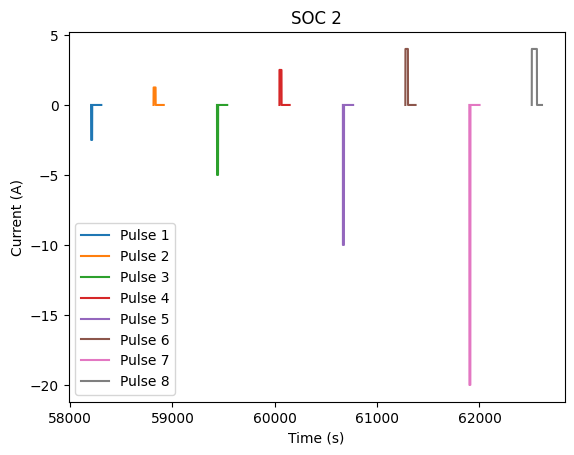

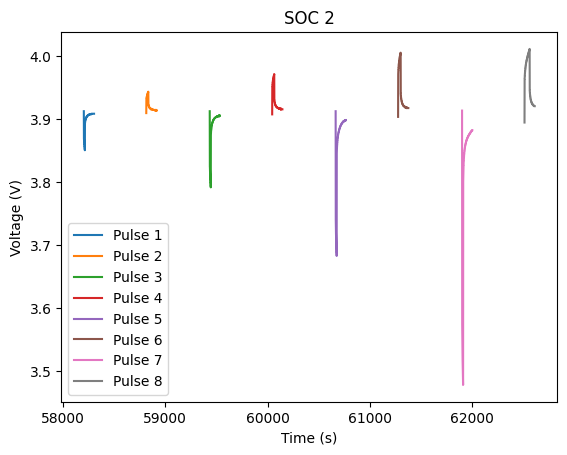

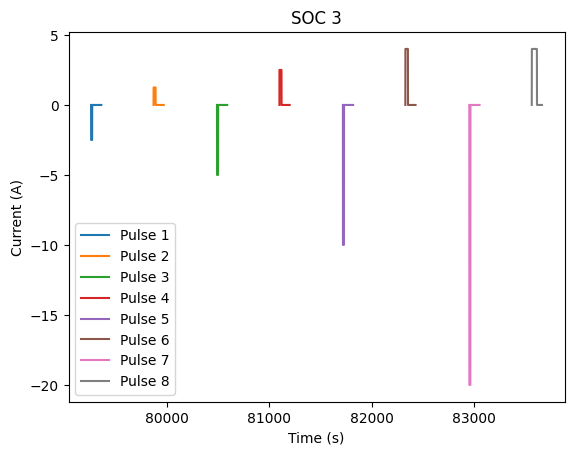

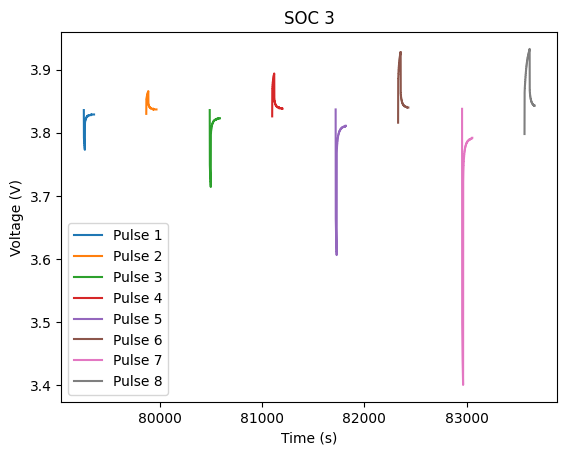

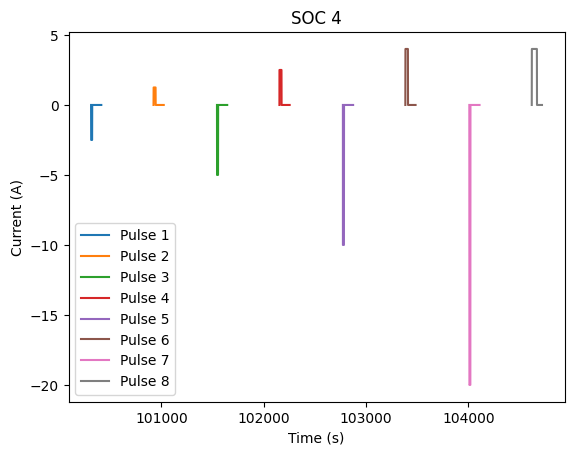

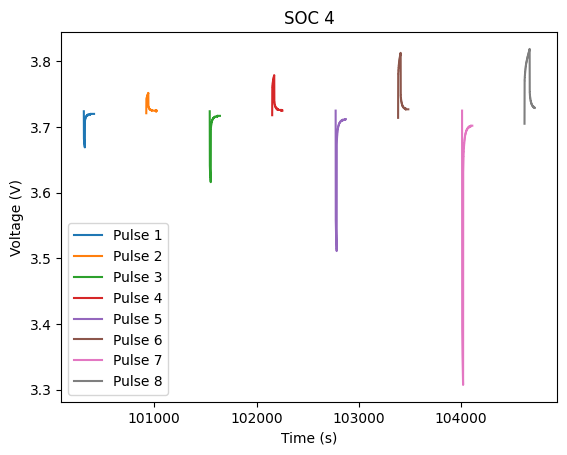

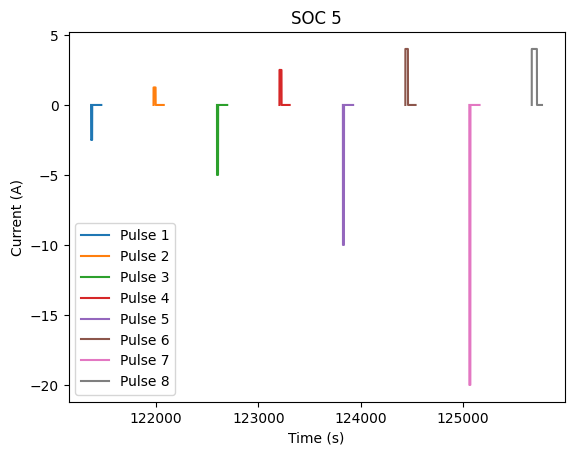

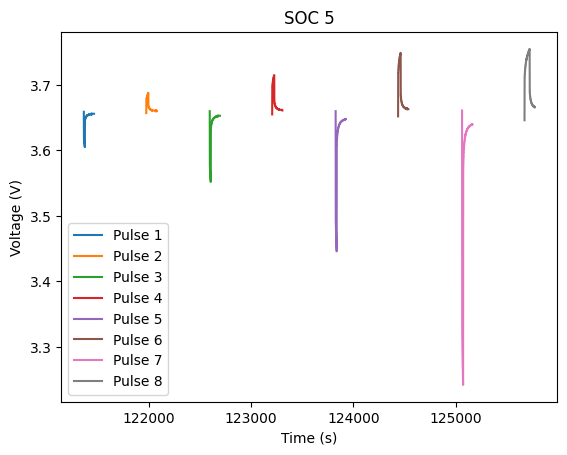

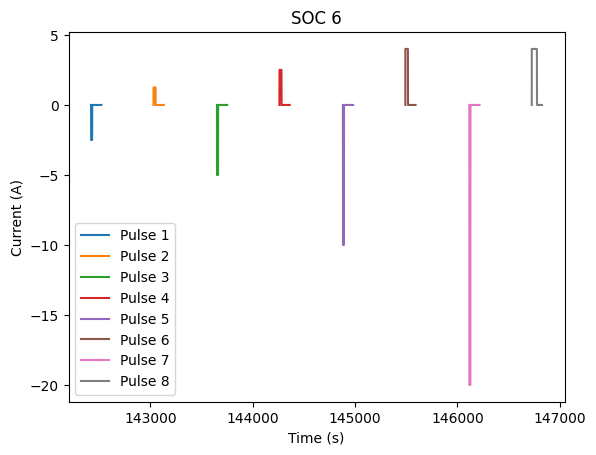

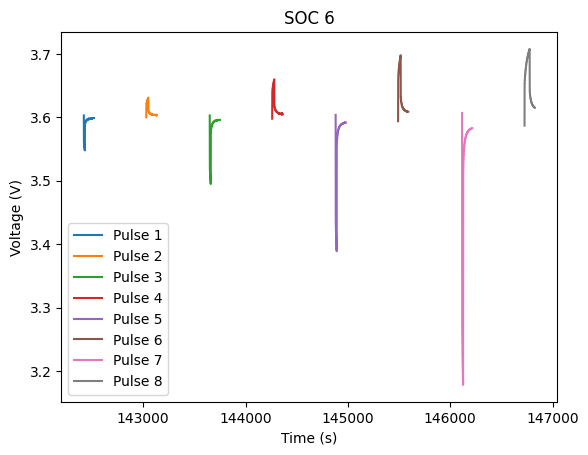

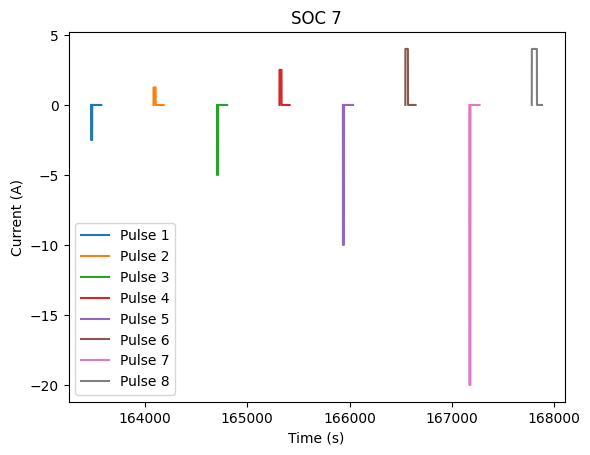

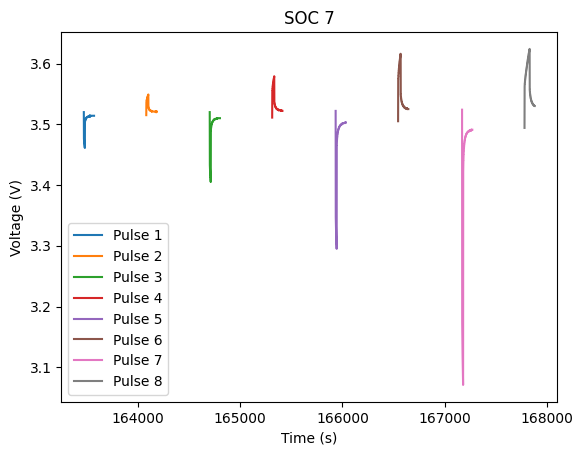

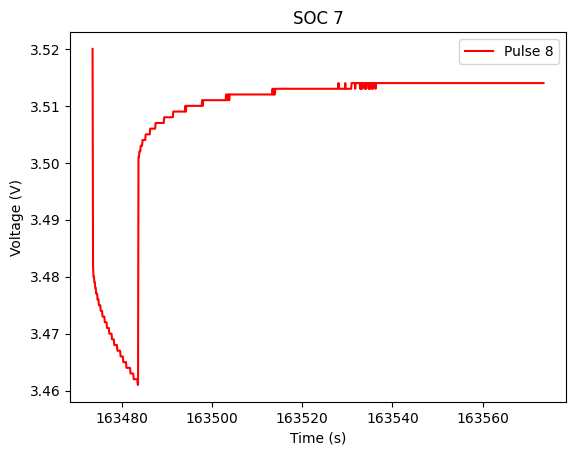

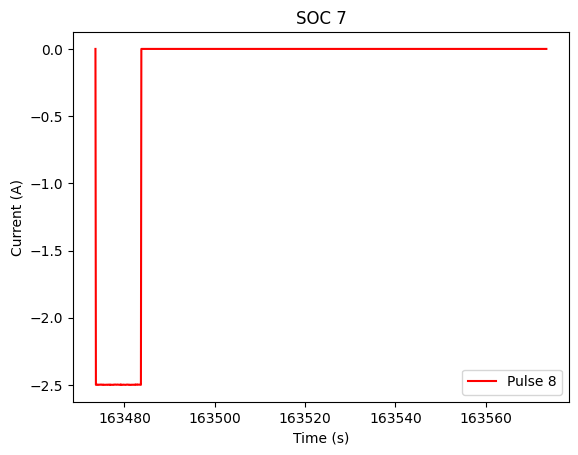

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read CSV file containing training data Temp: 20ºC
df = pd.read_csv('Model_Training_Data_40.csv')
t = np.array(df['Time (s)'][:])
I = np.array(df['Current (A)'][:])
V = np.array(df['Voltage (V)'][:])

# Plot Data - Current
plt.figure(1, figsize=(10, 6))
plt.plot(t, I, label='Current (A)', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.title('Discharge Pulses')
plt.grid(True)

# Plot Data - Voltage
plt.figure(2, figsize=(10, 6))
plt.plot(t, V, label='Voltage (V)', color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Discharge Pulses')
plt.grid(True)

def identifypulses(I, threshold=0.5, pulse_duration=10):
    pulses = []
    in_pulse = False
    pulse_start = 0

    for i in range(1, len(I)):
        if abs(I[i] - I[i-1]) > threshold:
            if not in_pulse:
                pulse_start = i - 1
                in_pulse = True
        elif in_pulse:
            if i - pulse_start >= pulse_duration * 100:  # Check if pulse duration is approximately 10 seconds
                pulses.append((pulse_start, i))
                in_pulse = False
    return pulses

# Analyze pulses for the full data range
pulses = identifypulses(I)
pulsestimes = []

for start, end in pulses:
  tpulsestart = t[start]
  tpulsesend = t[end-1]
  pulsestimes.append((tpulsestart, tpulsesend))

# Divide list: 8 subsections - 8 SOC levels
nSOCs = 8
nPulsesSOC = 8
SOCpulseintervals = [[] for _ in range(nSOCs)]

for i, (tstart, tend) in enumerate(pulsestimes):
    SOCindex = i // nPulsesSOC
    SOCpulseintervals[SOCindex].append((tstart, tend))

# Print the identified pulse intervals for each SOC range
for idx, pulses in enumerate(SOCpulseintervals):
    SOCstart = 90 - idx * 10
    SOCend = 100 - idx * 10
    print(f"SOC Range: {SOCstart}% - {SOCend}%")
    for pulse_idx, (start, end) in enumerate(pulses):
        print(f"Pulse {pulse_idx + 1}: Start Time: {start}, End Time: {end}")


# SOCind: list to hold results
SOCind = []

pp1 = 4
pp2 = 13

for i, pulses in enumerate(SOCpulseintervals):
    SOC = SOCpulseintervals[i]
    Pulse = []
    plt.figure(pp1)
    plt.figure(pp2)
    tpulse = np.zeros((1000, 8))
    Ipulse = np.zeros((1000, 8))
    Vpulse = np.zeros((1000, 8))
    for j in enumerate(pulses):
        pulserange = SOC[j[0]]
        # Use NumPy indexing to find matching time indices
        k_indices = np.where((t >= pulserange[0]) & (t <= pulserange[1]))[0]
        # Populate corresponding pulse data
        tpulse[:len(k_indices), j[0]] = t[k_indices]
        Ipulse[:len(k_indices), j[0]] = I[k_indices]
        Vpulse[:len(k_indices), j[0]] = V[k_indices]

        # Plot
        plt.figure(pp1)
        plt.plot(tpulse[:, j[0]], Ipulse[:, j[0]], label=f'Pulse {j[0]+1}')
        plt.title(f'SOC {i}')
        plt.xlabel('Time (s)')
        plt.ylabel('Current (A)')
        plt.legend()
        plt.figure(pp2)
        plt.plot(tpulse[:, j[0]], Vpulse[:, j[0]], label=f'Pulse {j[0]+1}')
        plt.title(f'SOC {i}')
        plt.xlabel('Time (s)')
        plt.ylabel('Voltage (V)')
        plt.legend()

        Pulse.append([j[0], np.copy(tpulse[:, j[0]]), np.copy(Ipulse[:, j[0]]), np.copy(Vpulse[:, j[0]])])
    pp1 = pp1+1
    pp2 = pp2+1
    SOCind.append(Pulse)

plt.figure(3)
plt.plot(tpulse[:, 0], Vpulse[:, 0], label=f'Pulse {j[0]+1}', color='red')
plt.title(f'SOC {i}')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()

fig, ax = plt.subplots()
plt.plot(tpulse[:, 0], Ipulse[:, 0], label=f'Pulse {j[0]+1}', color='red')
plt.title(f'SOC {i}')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.legend()

-1


Parameters (First Order ECN): 0.015599999999999881 0.006000000000000227 998.2495833332526


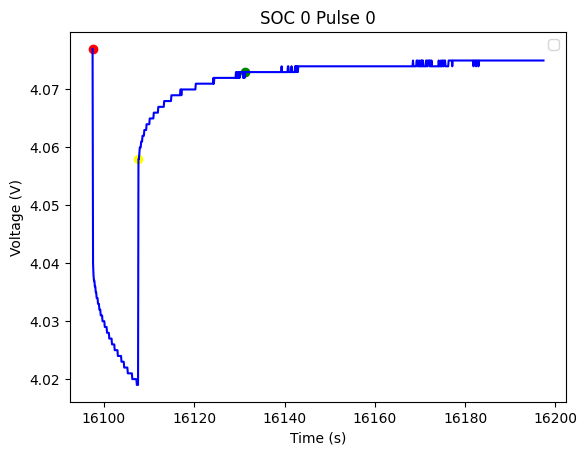

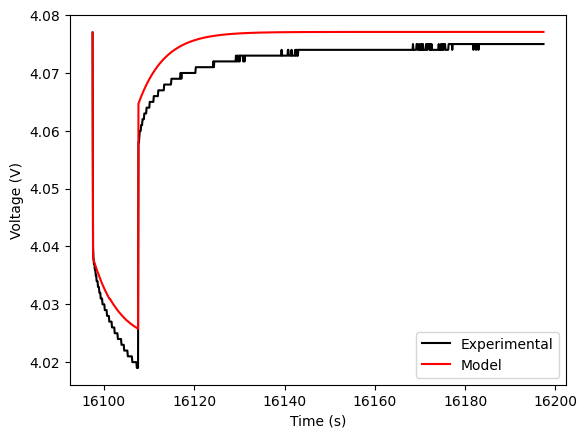

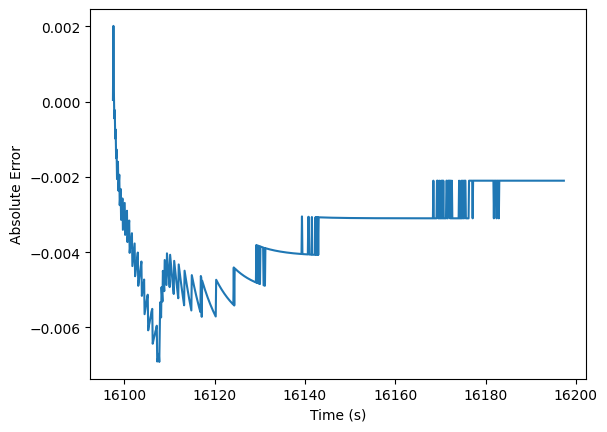

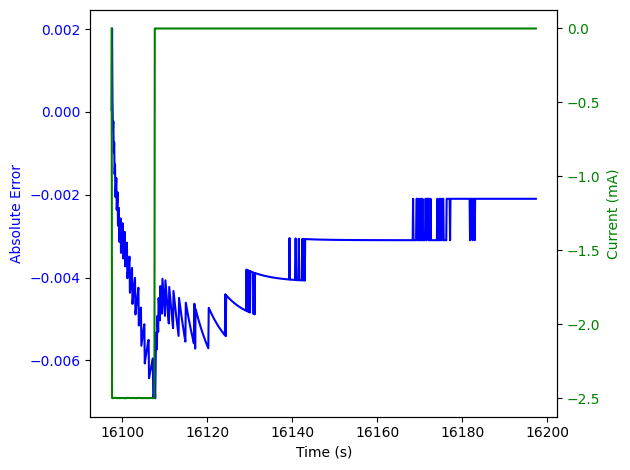

0


Parameters (First Order ECN): 0.015163607342378396 0.007182761372705779 837.3517074998819


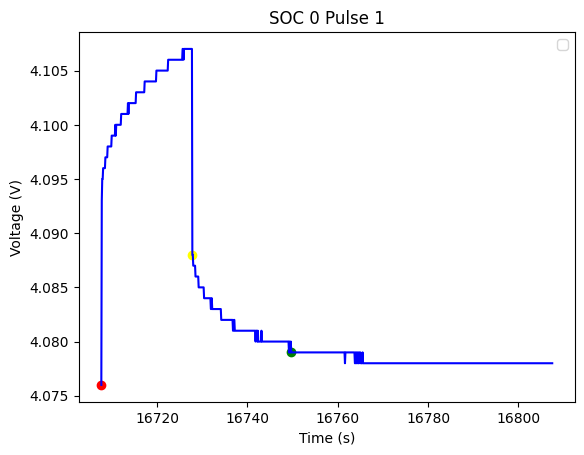

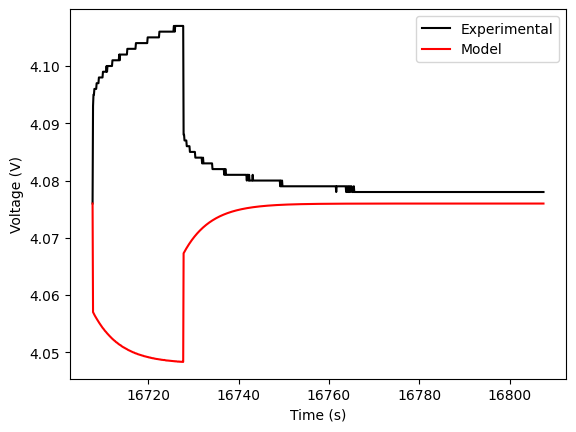

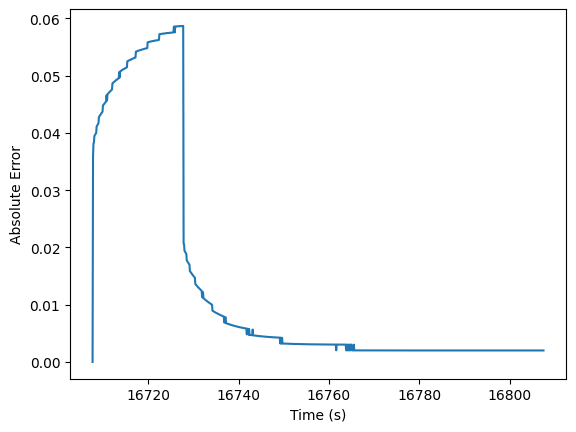

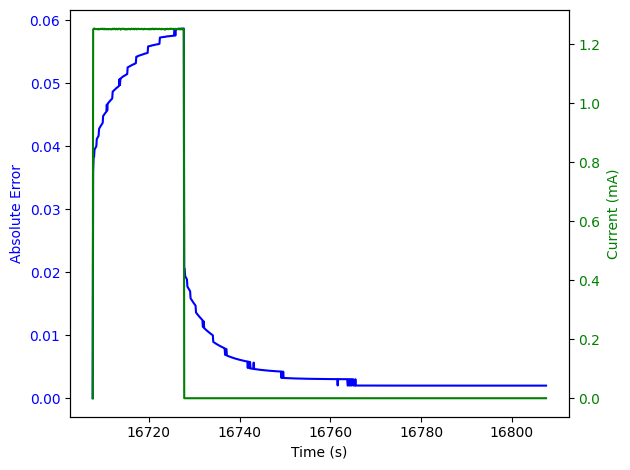

1


Parameters (First Order ECN): 0.015393842463014697 0.006797281087565114 2331.520470588181


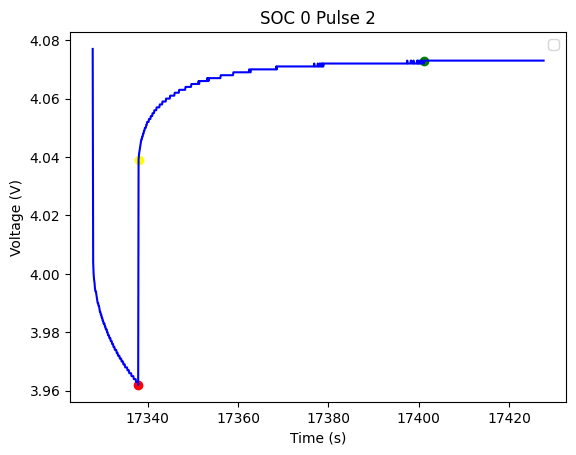

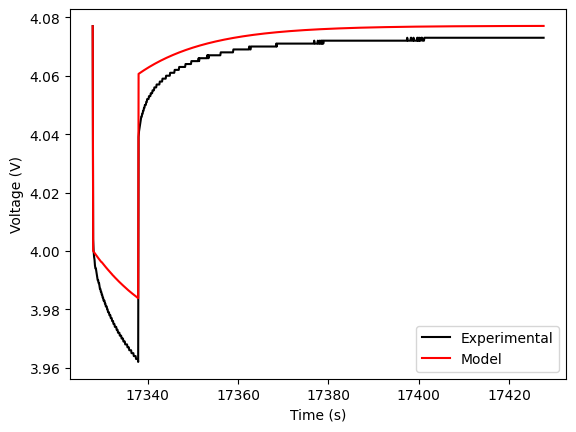

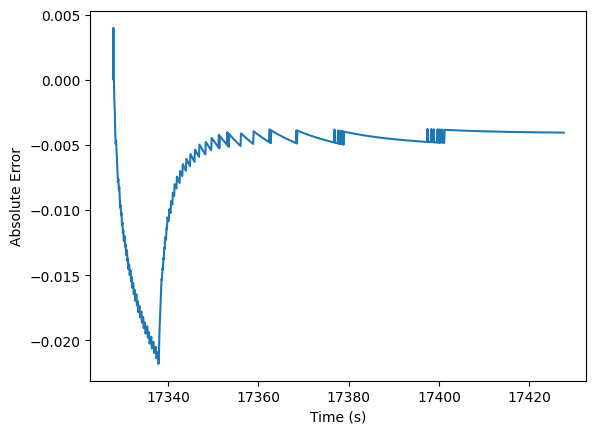

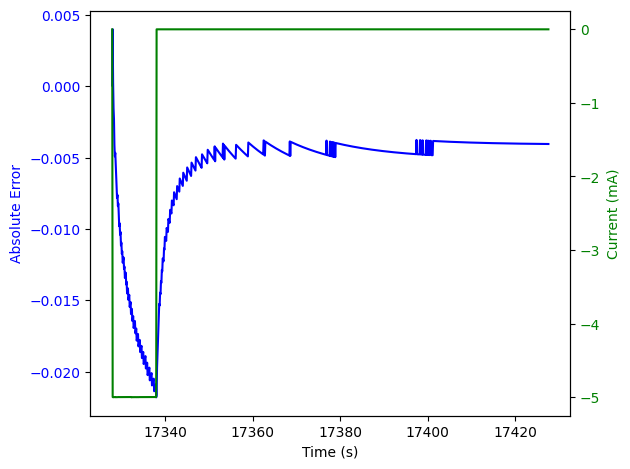

2


Parameters (First Order ECN): 0.015175718849840357 0.0075878594249201795 1781.0685126316048


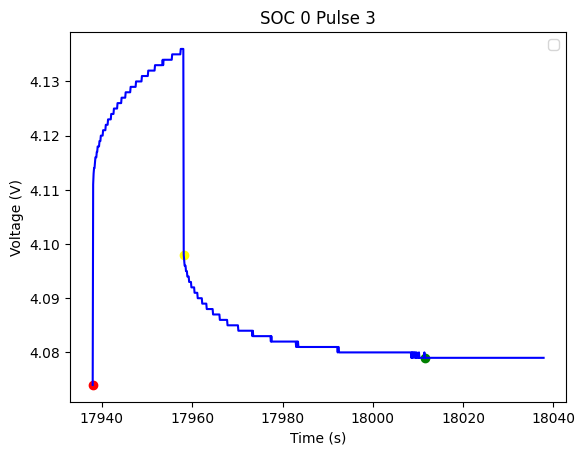

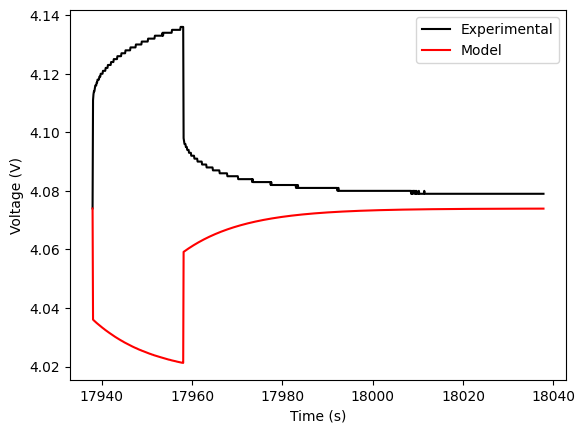

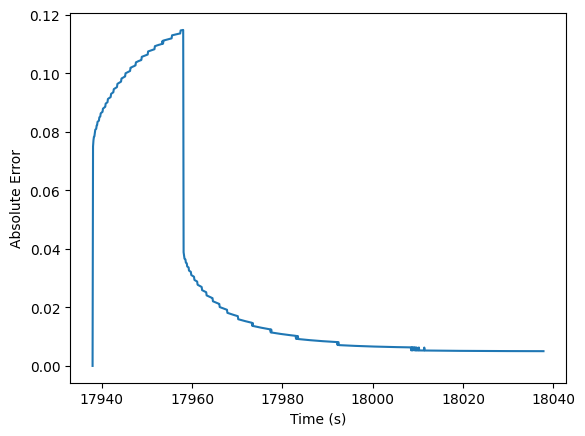

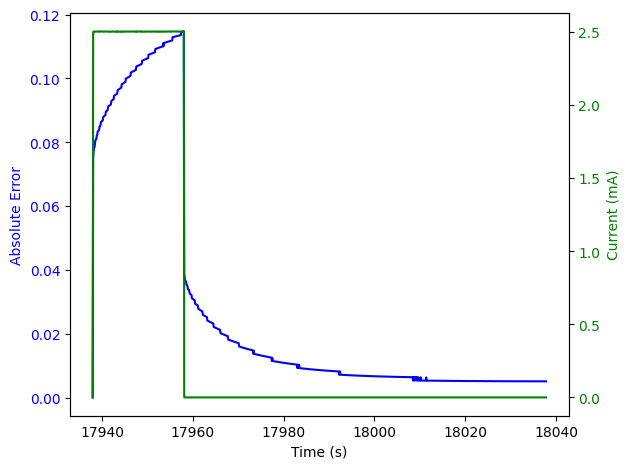

3


Parameters (First Order ECN): 0.015198480151984772 0.006499350064993539 2548.793700038391


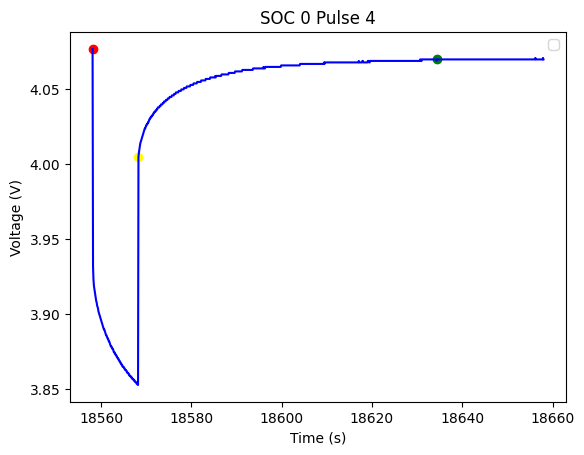

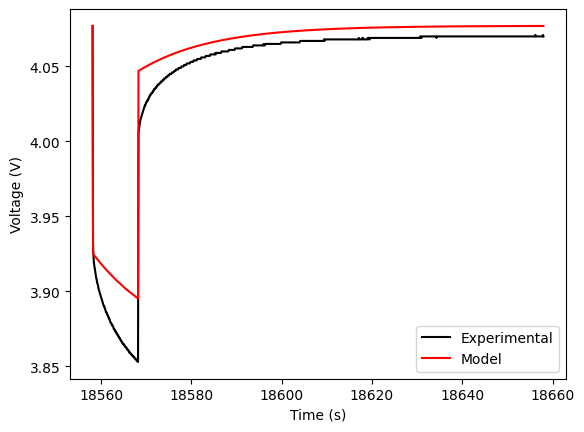

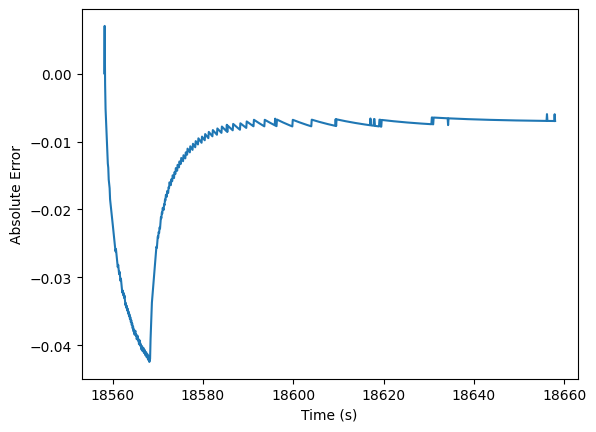

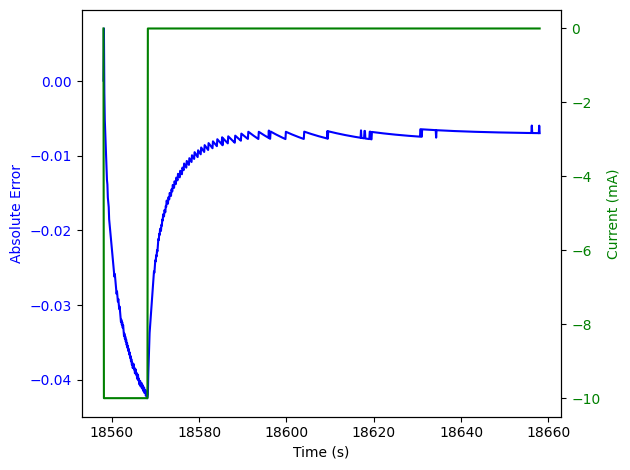

4


Parameters (First Order ECN): 0.015238571071696213 0.007244566575068676 1352.4618620689387


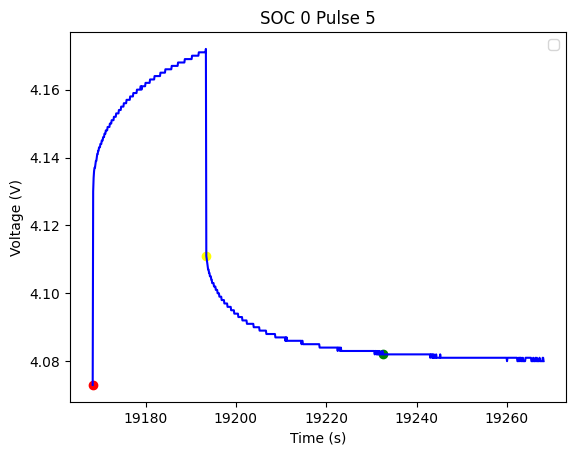

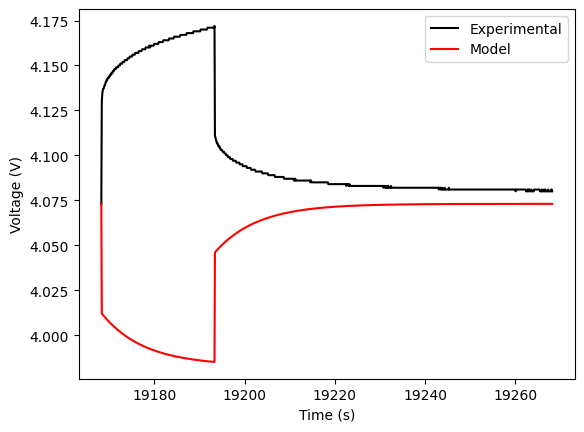

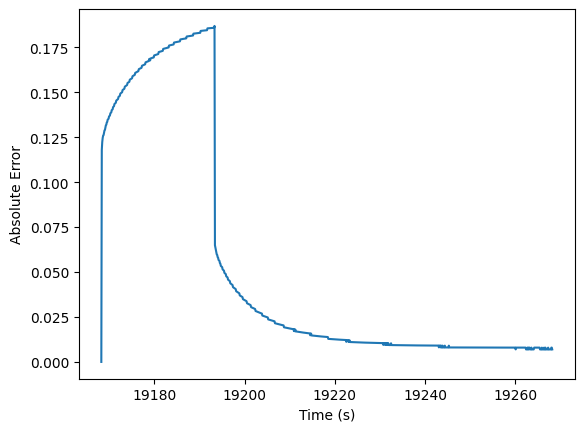

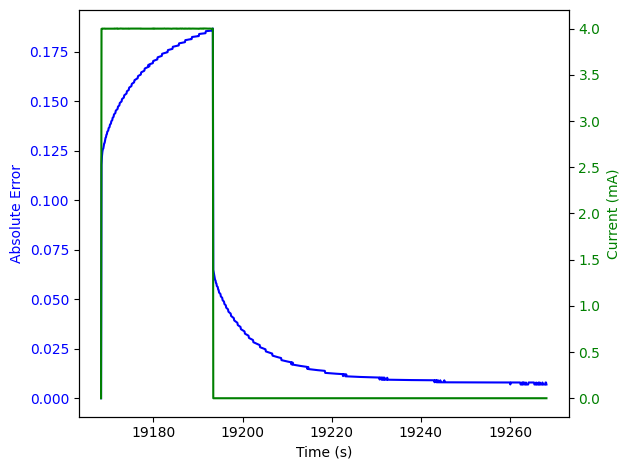

5


Parameters (First Order ECN): 0.014899255037248139 0.006199690015499252 2741.8306330646014


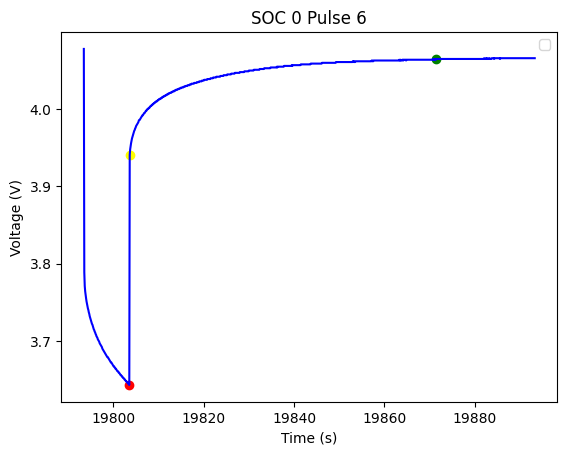

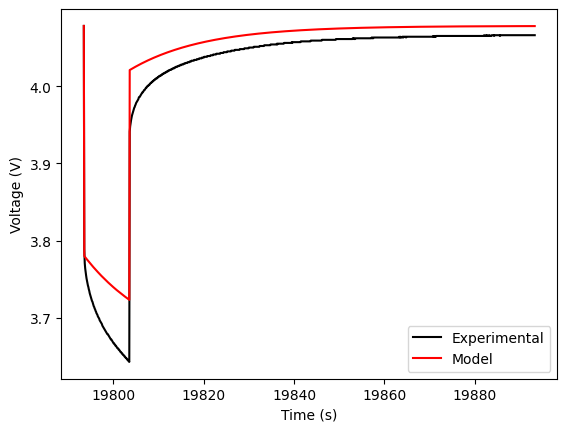

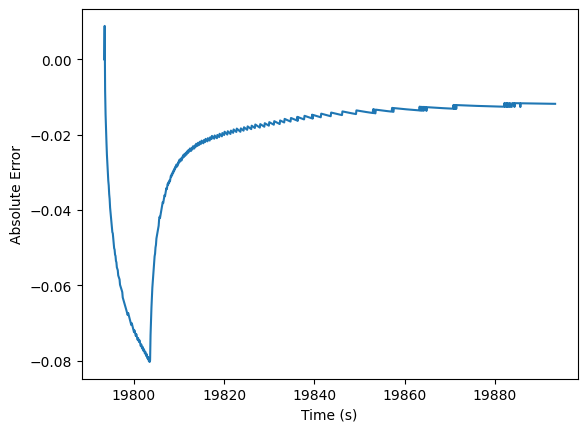

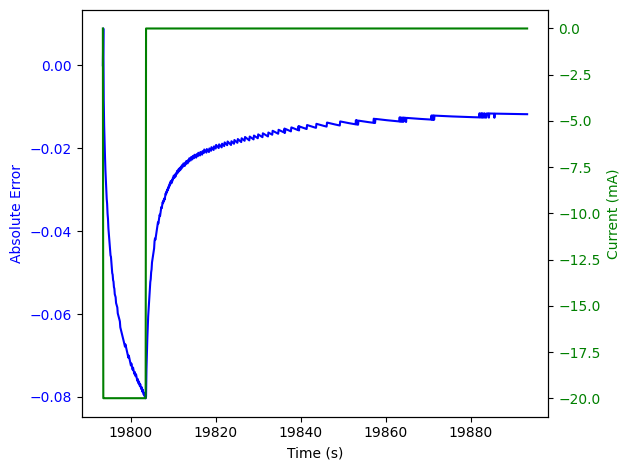

6


Parameters (First Order ECN): 0.015234765234765222 0.008241758241758334 1312.0986666665788


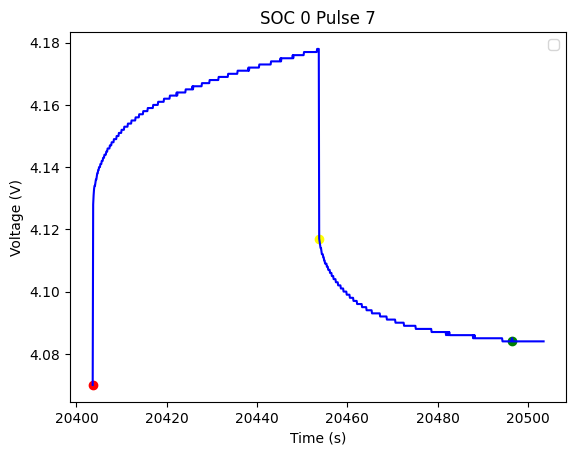

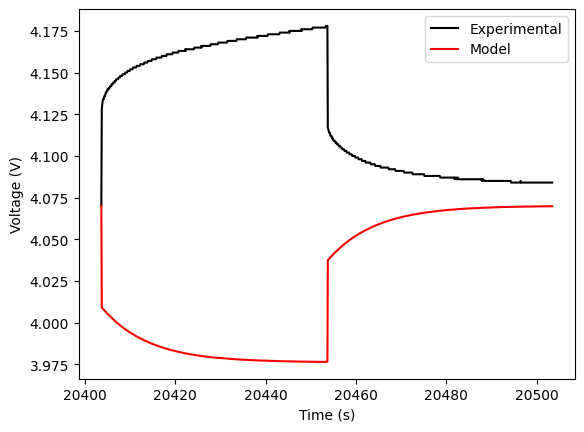

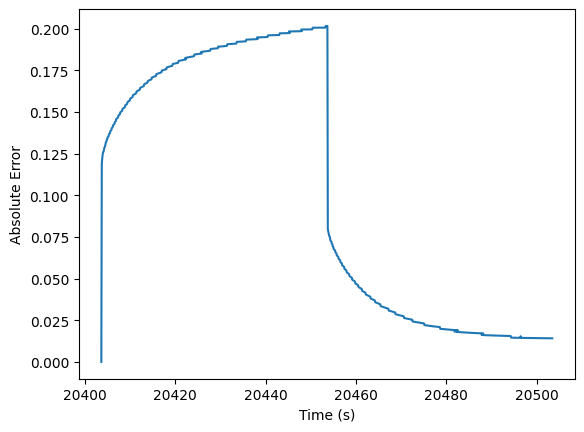

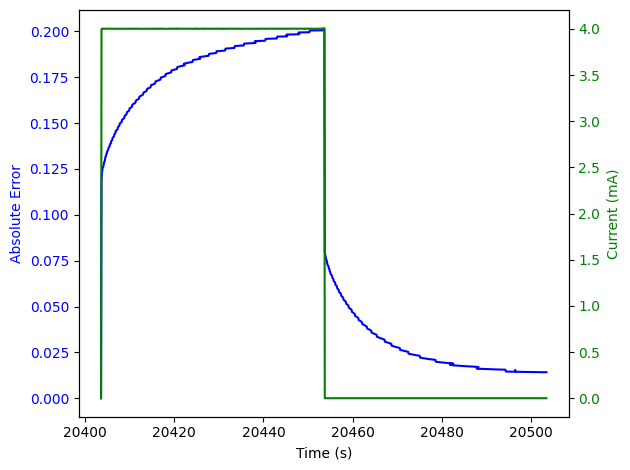

-1


Parameters (First Order ECN): 0.015599999999999881 0.007200000000000095 1305.2781249999932


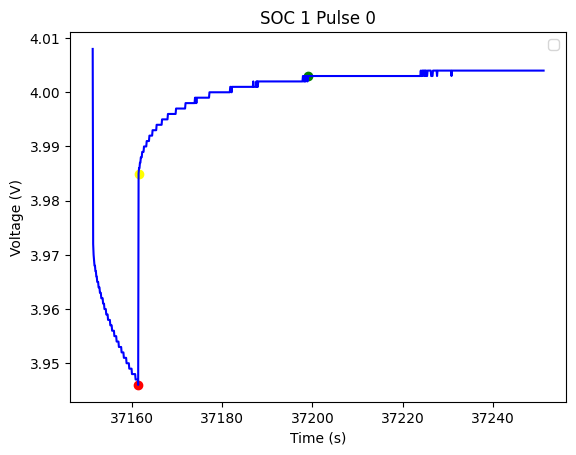

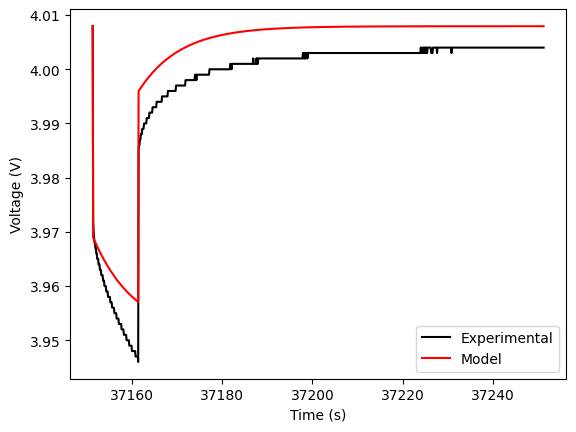

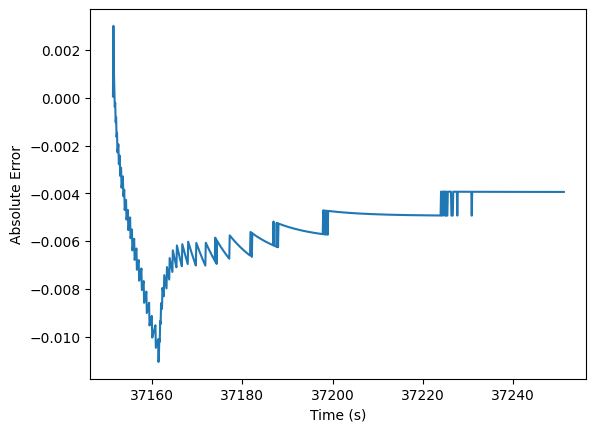

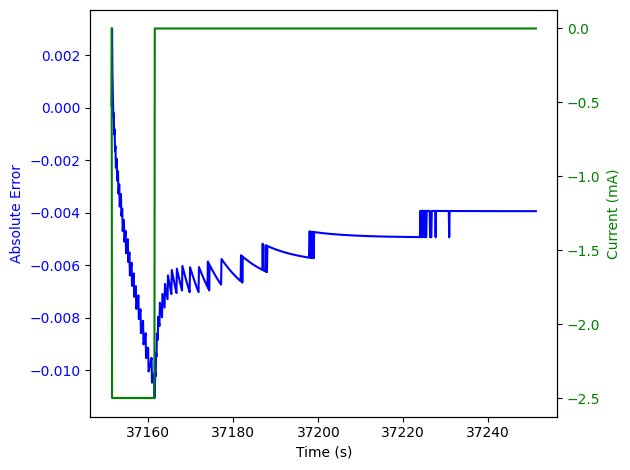

0


Parameters (First Order ECN): 0.015163607342378396 0.006384676775738233 648.4275000001933


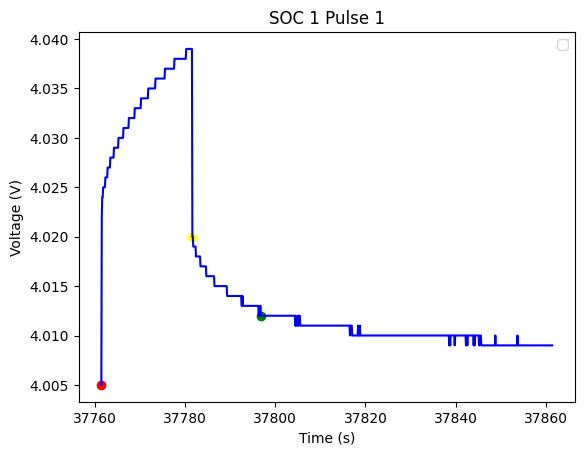

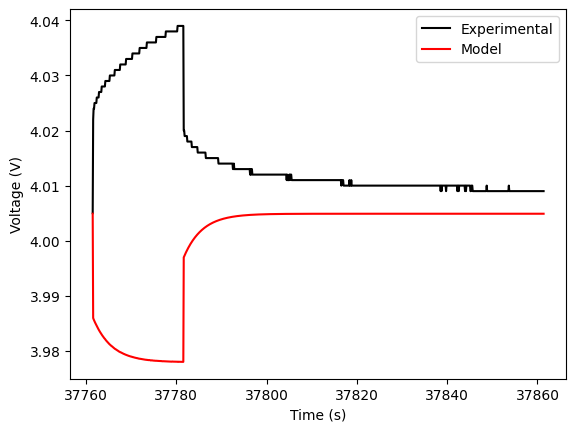

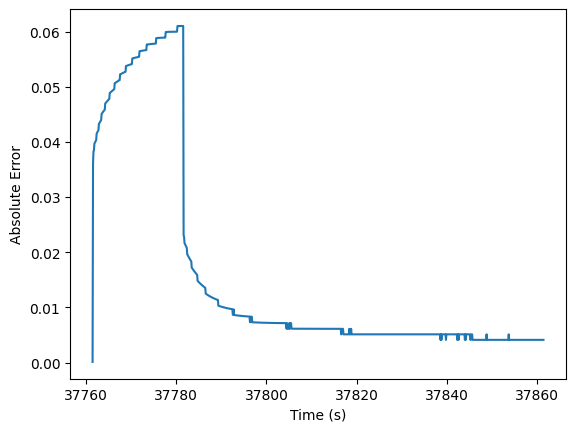

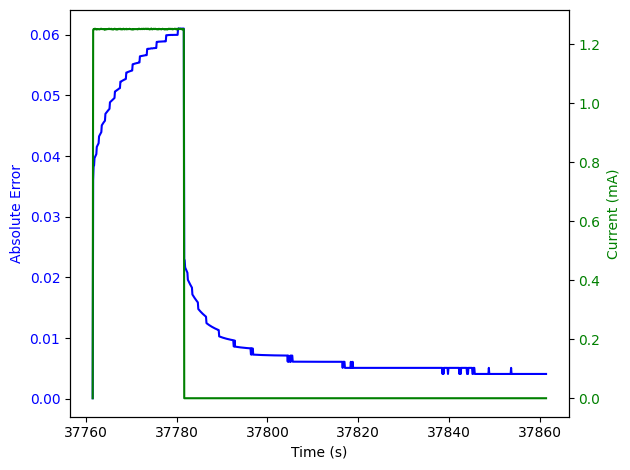

1


Parameters (First Order ECN): 0.015196960607878437 0.007198560287942416 1405.142083333302


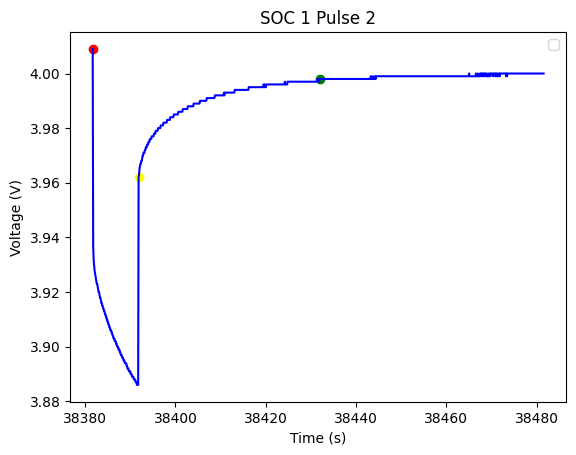

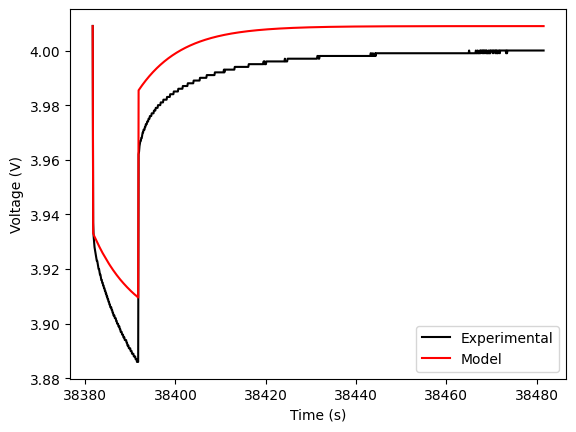

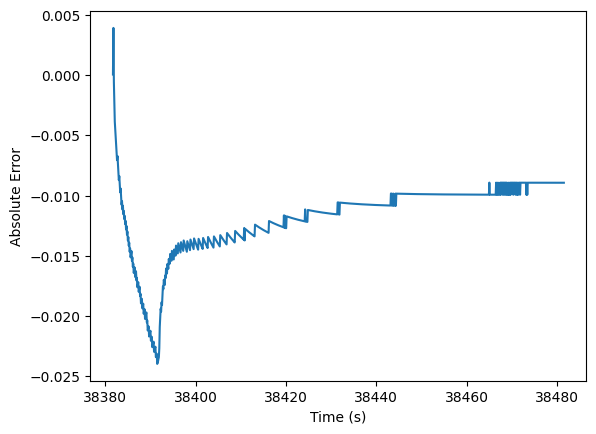

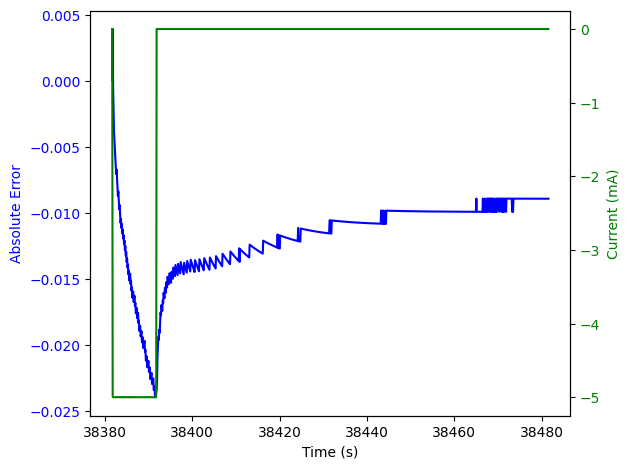

2


Parameters (First Order ECN): 0.014776357827476006 0.007188498402556183 1316.6171111110673


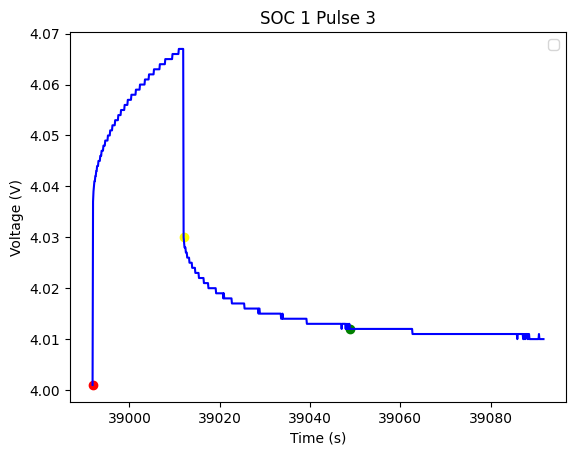

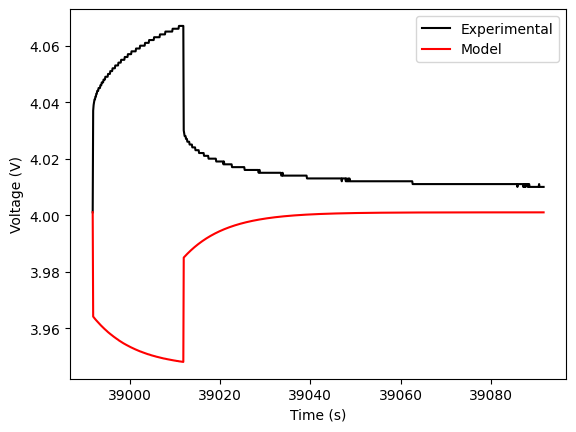

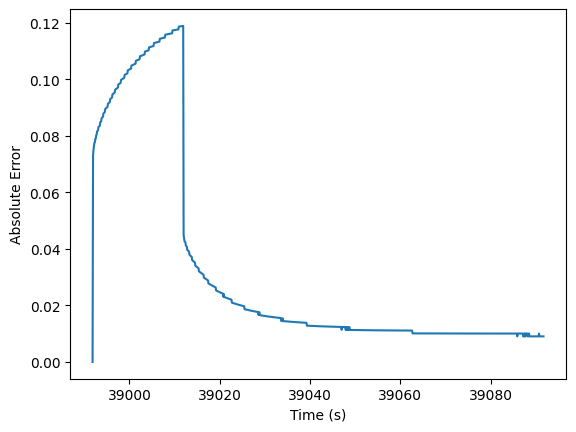

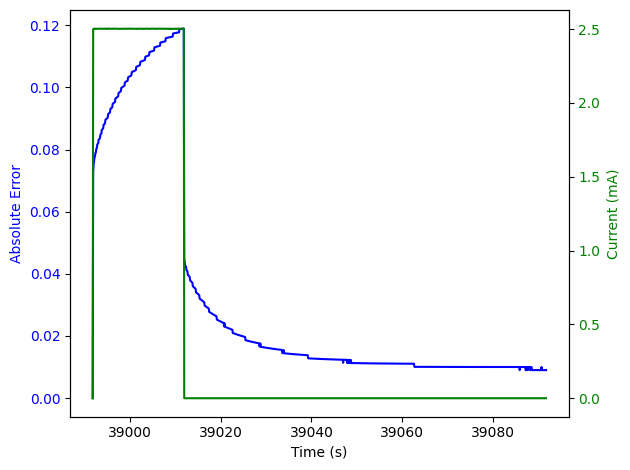

3


Parameters (First Order ECN): 0.014998500149984993 0.006699330066993319 2059.6835597016043


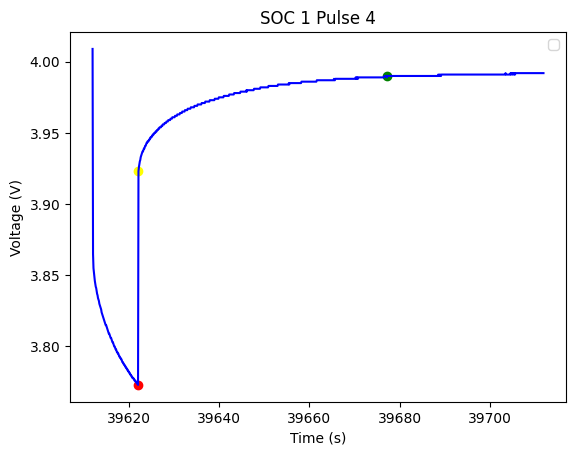

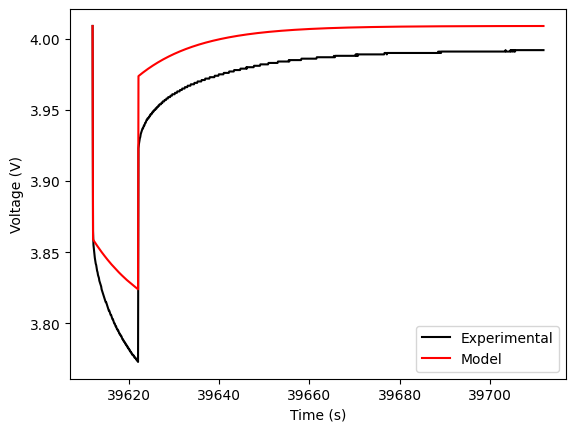

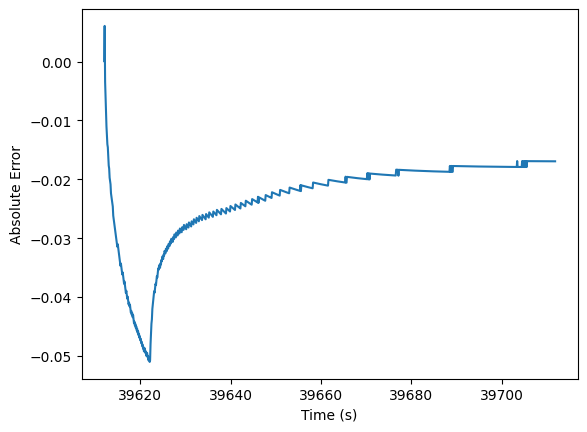

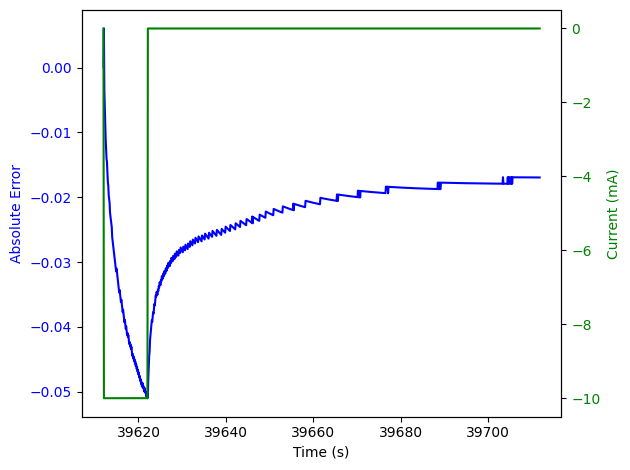

4


Parameters (First Order ECN): 0.014988758431176741 0.007494379215588369 2420.54738333325


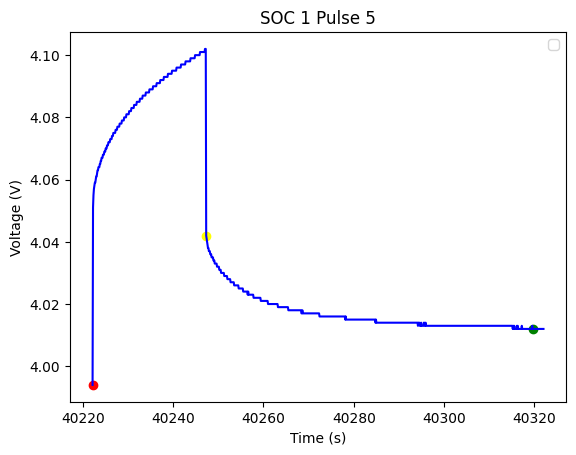

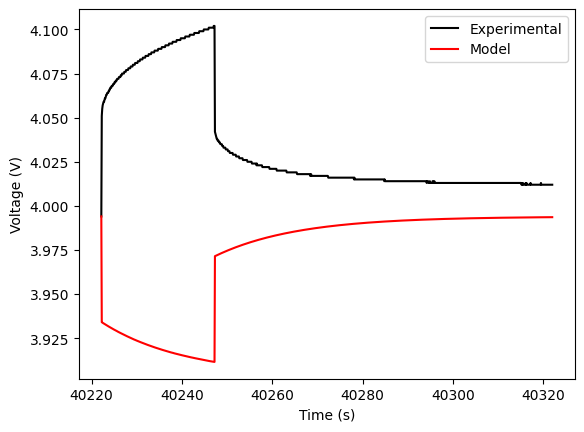

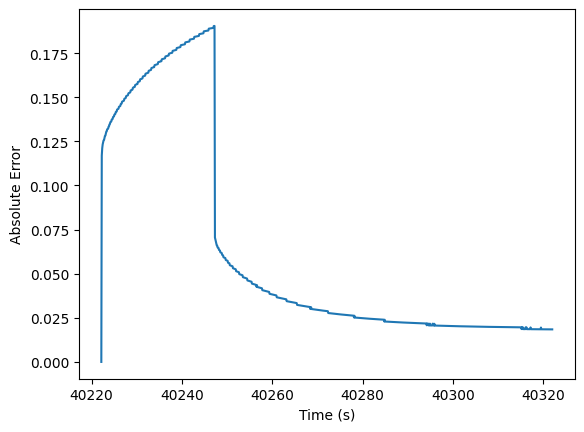

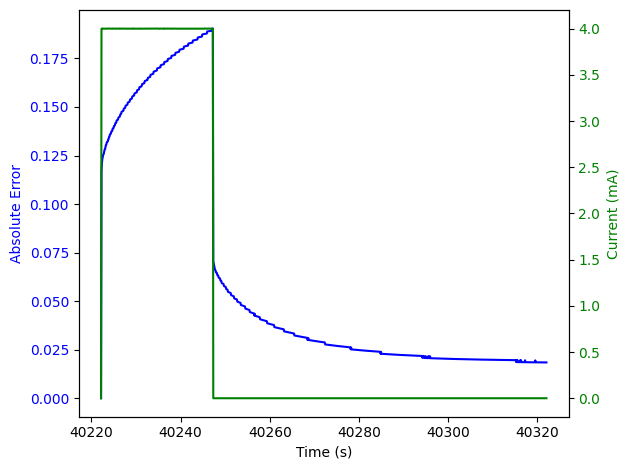

5


Parameters (First Order ECN): 0.01484851514848516 0.0057494250574942635 3134.9217216957154


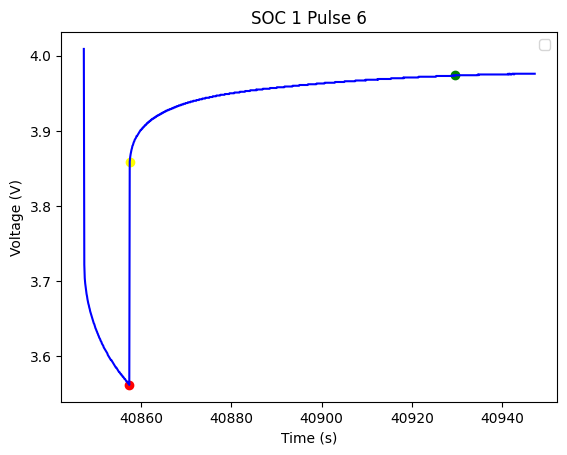

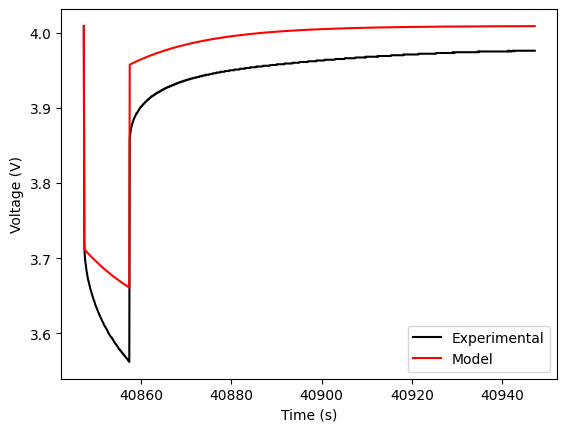

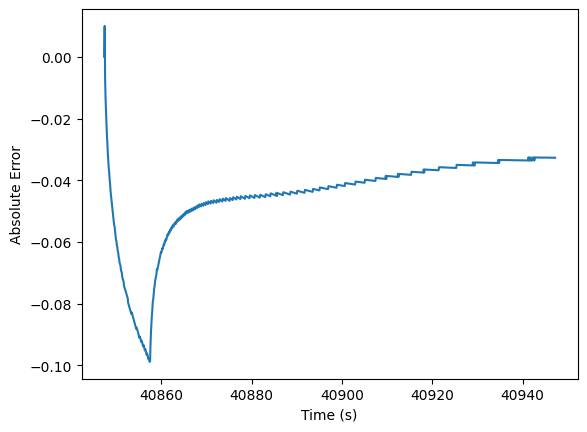

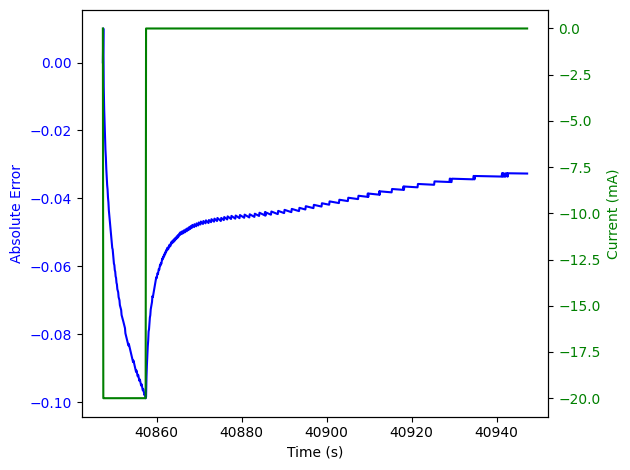

6


Parameters (First Order ECN): 0.016487634274294238 0.006245316012990346 1879.7287399999223


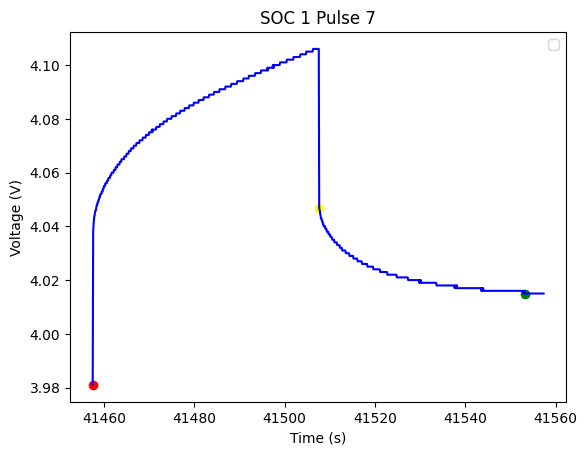

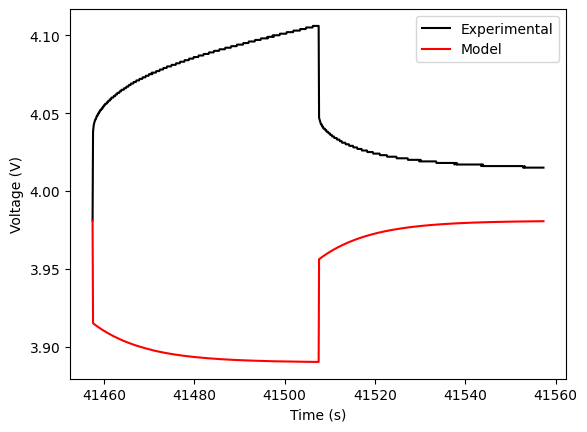

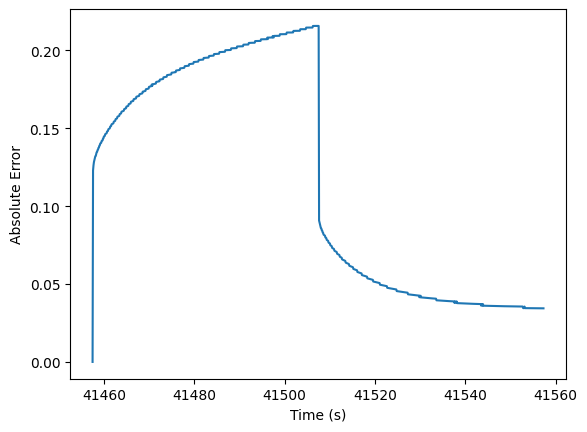

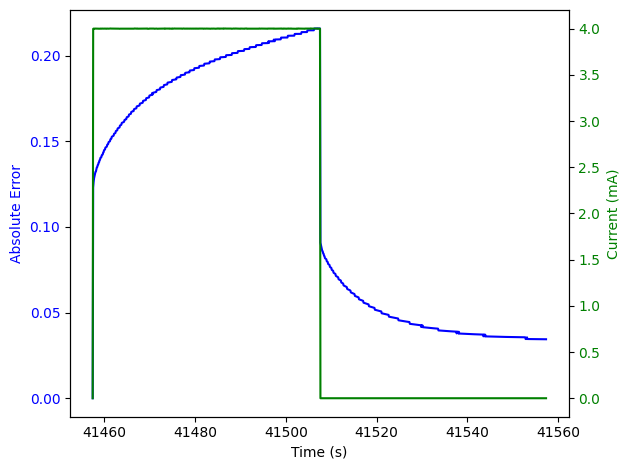

-1


Parameters (First Order ECN): 0.015199999999999925 0.006800000000000139 871.0297794117045


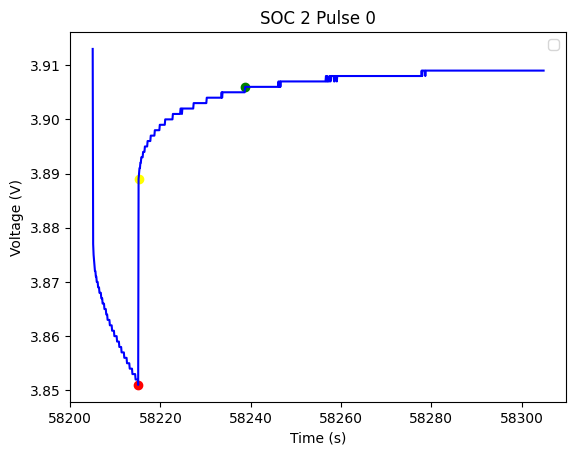

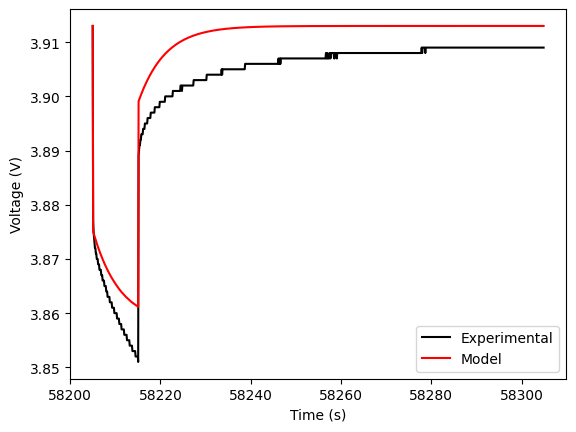

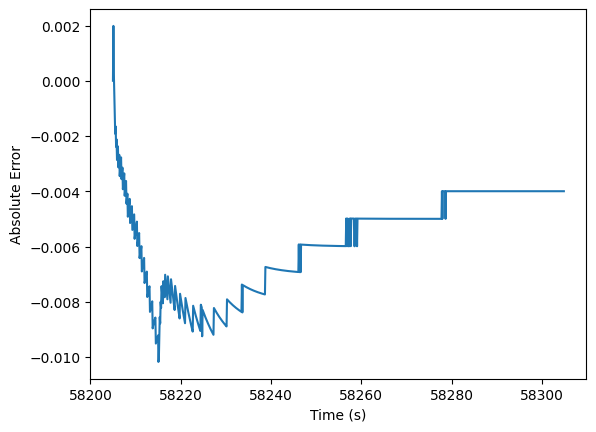

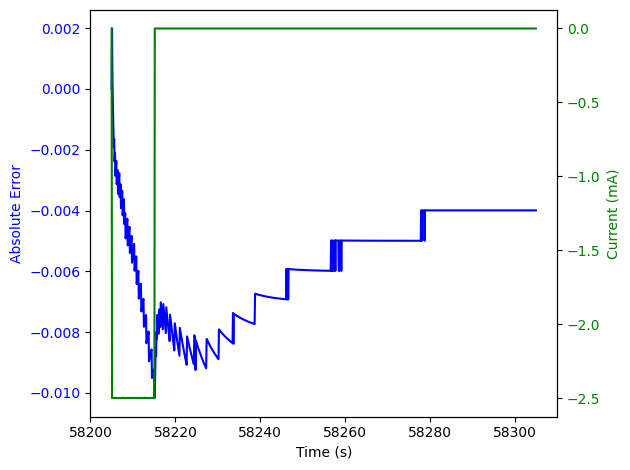

0


Parameters (First Order ECN): 0.015163607342378396 0.006384676775738233 750.2333584375036


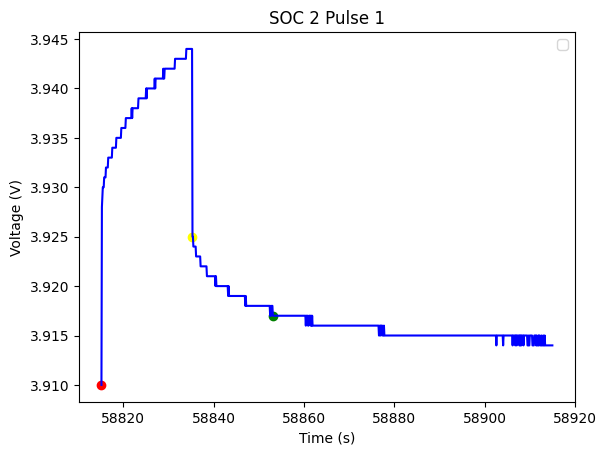

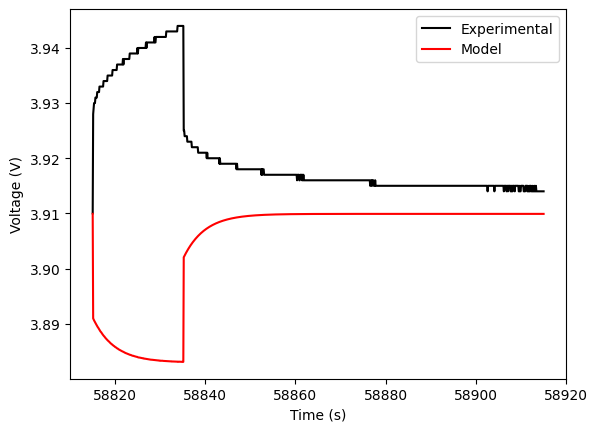

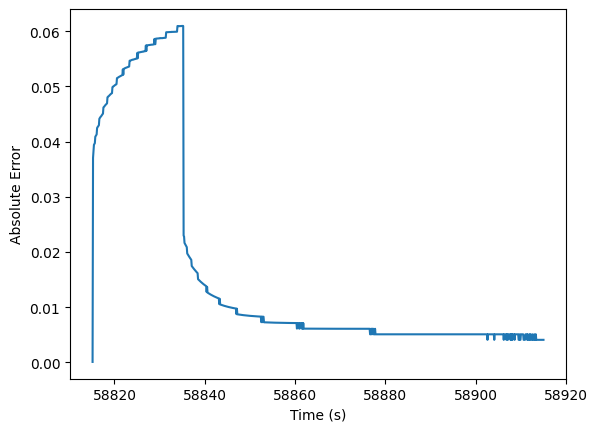

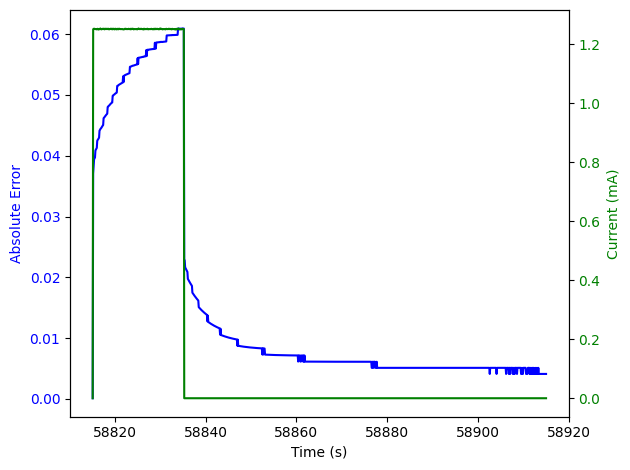

1


Parameters (First Order ECN): 0.015196960607878437 0.006798640271945659 1318.57285301456


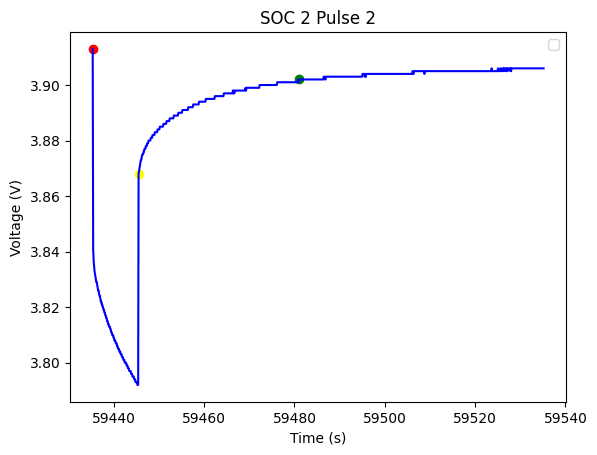

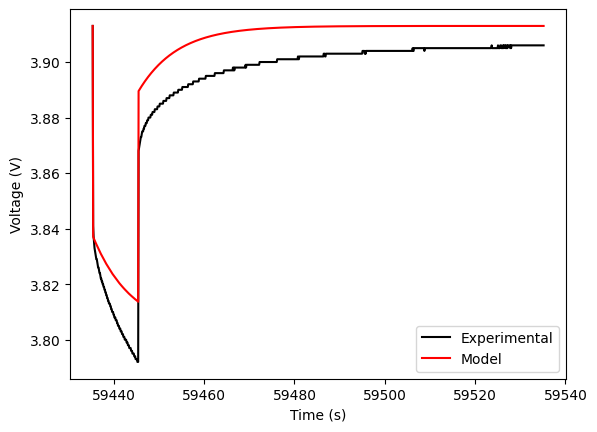

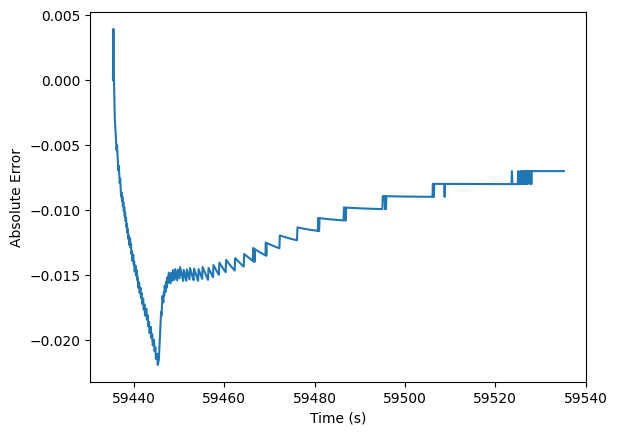

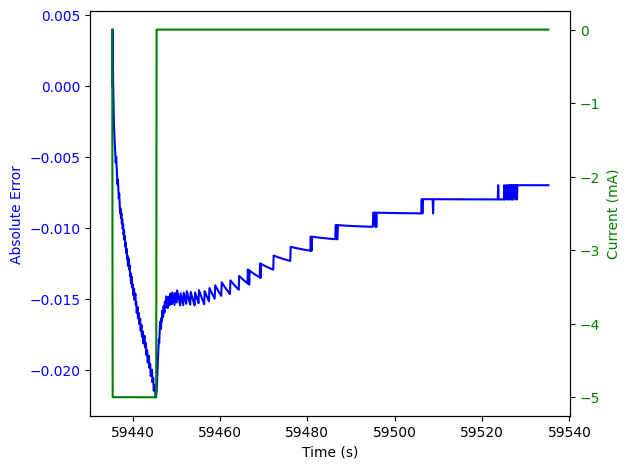

2


Parameters (First Order ECN): 0.014776357827476006 0.005591054313099137 695.8432671429334


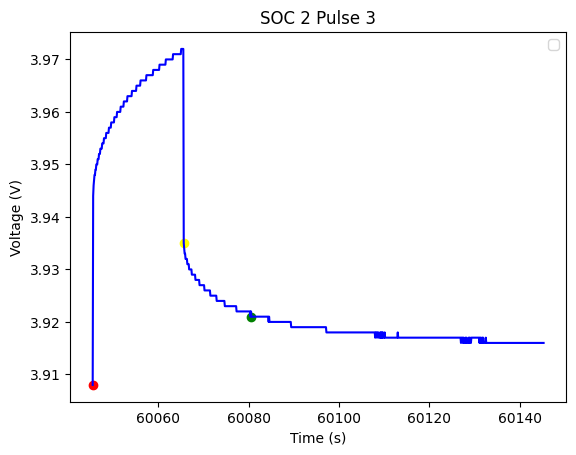

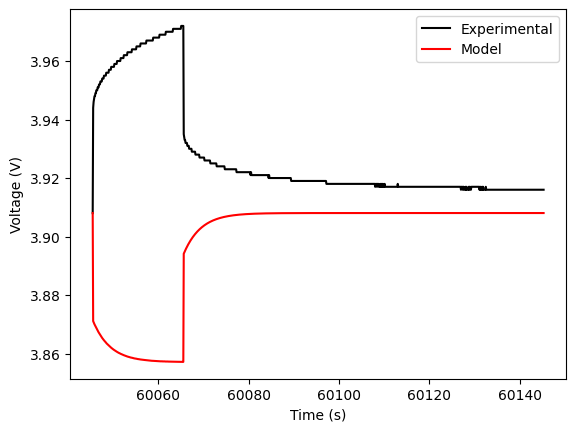

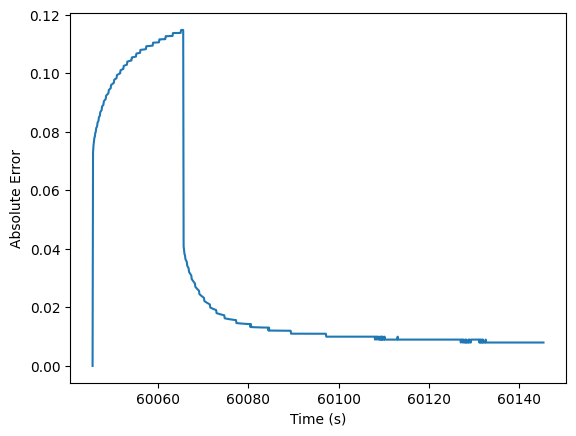

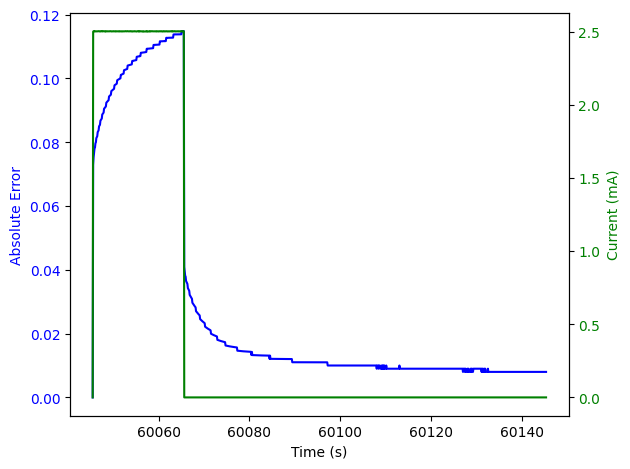

3


Parameters (First Order ECN): 0.014998500149985038 0.006099390060993895 2045.0401393031511


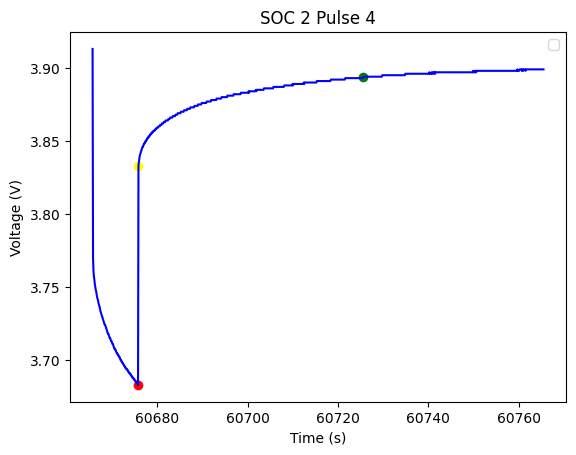

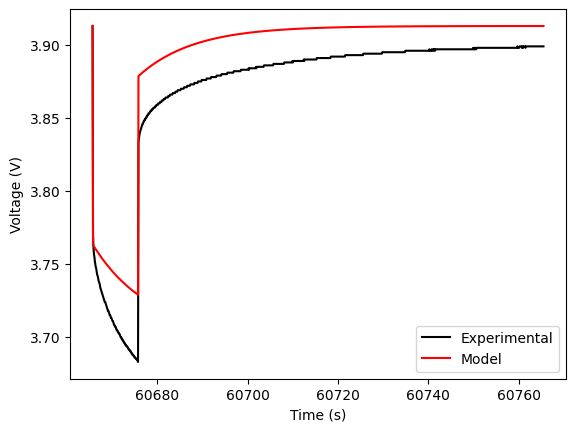

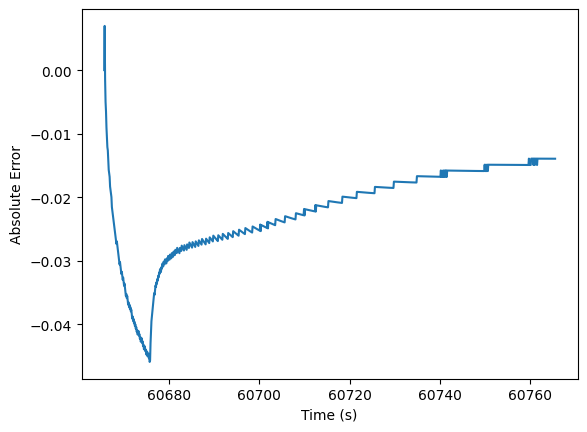

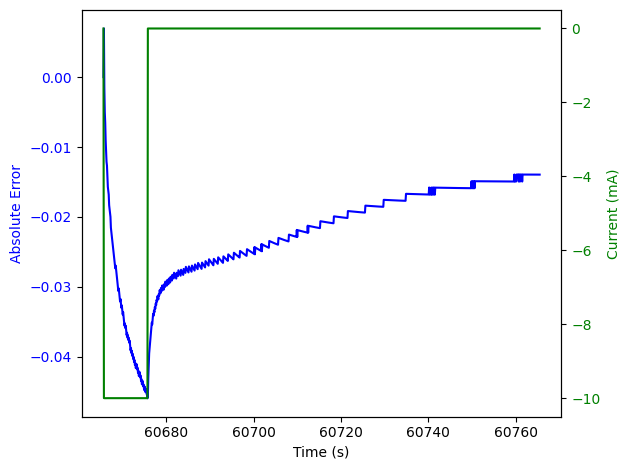

4


Parameters (First Order ECN): 0.01498875843117663 0.006245316012990346 1143.1767399998744


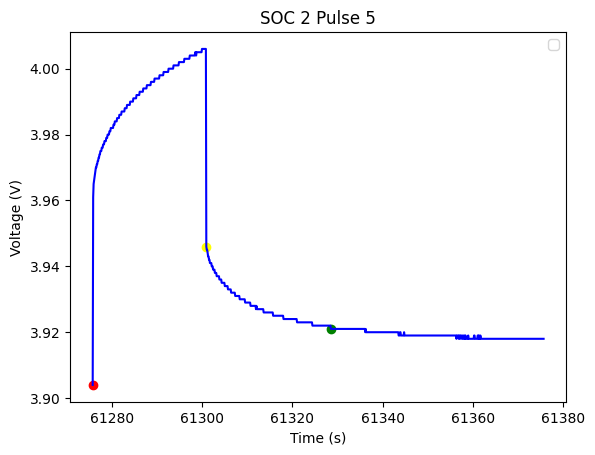

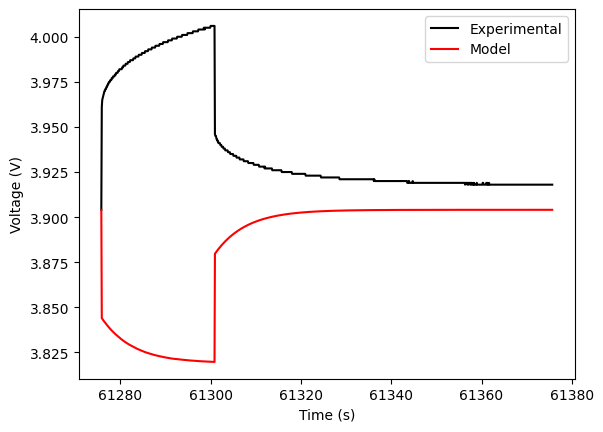

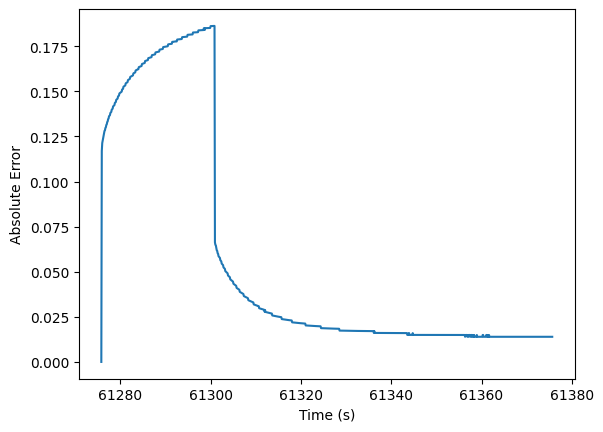

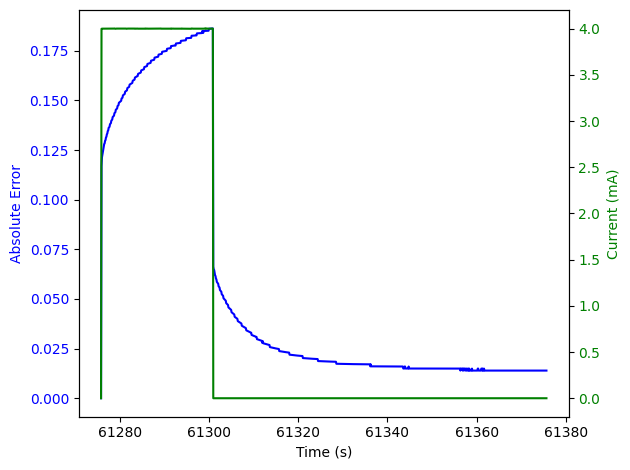

5


Parameters (First Order ECN): 0.014849257537123128 0.0053497325133743424 3826.9207757244412


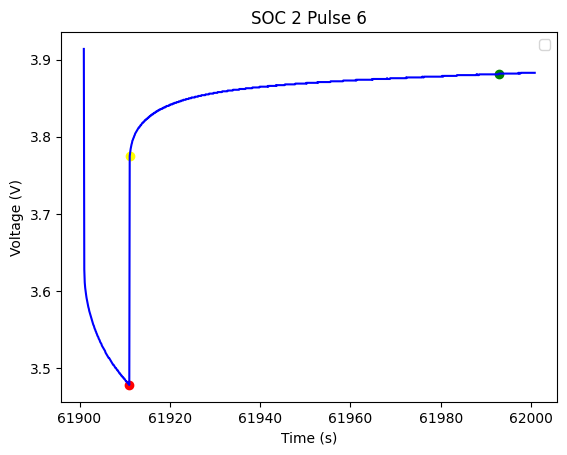

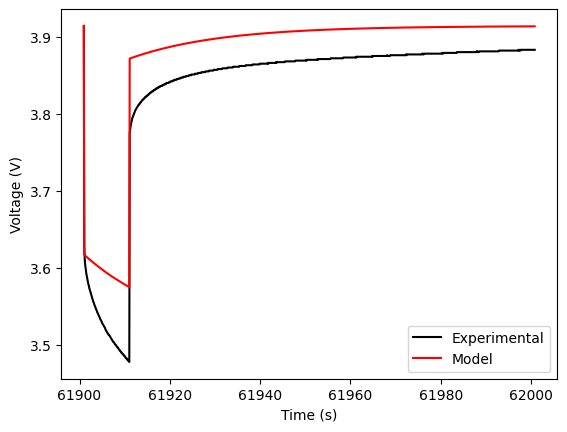

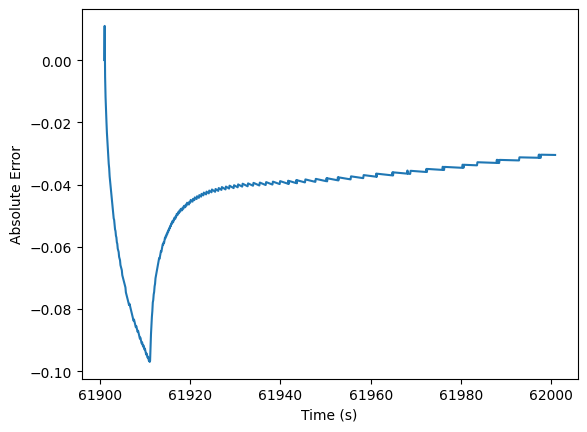

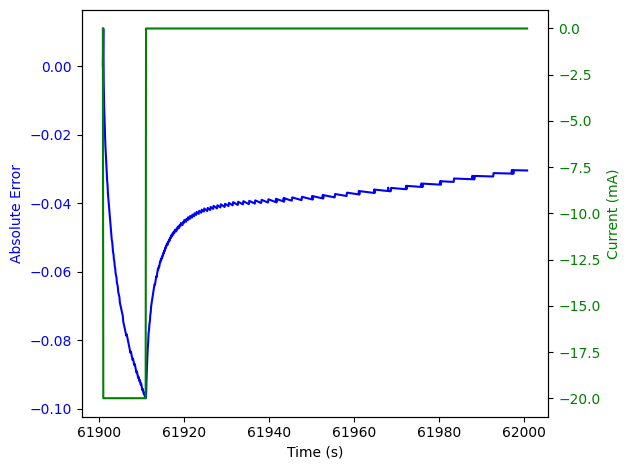

6


Parameters (First Order ECN): 0.014985014985014889 0.006743256743256777 847.4391851851874


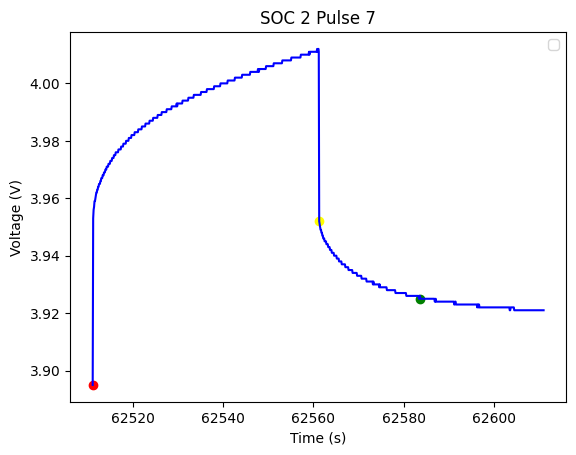

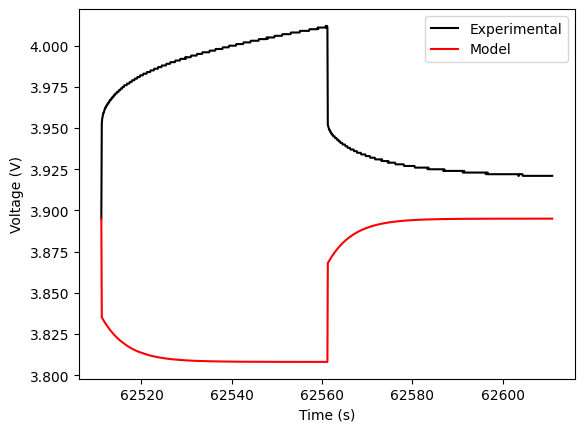

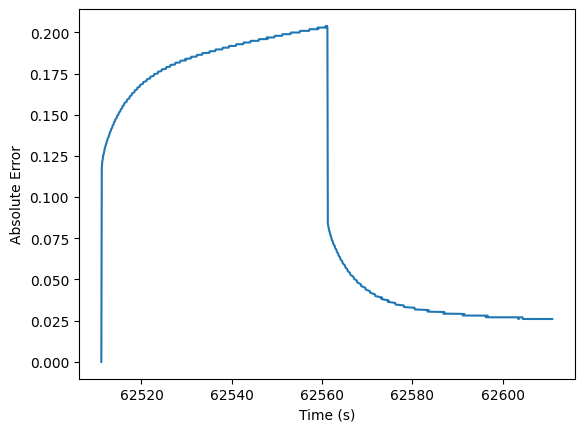

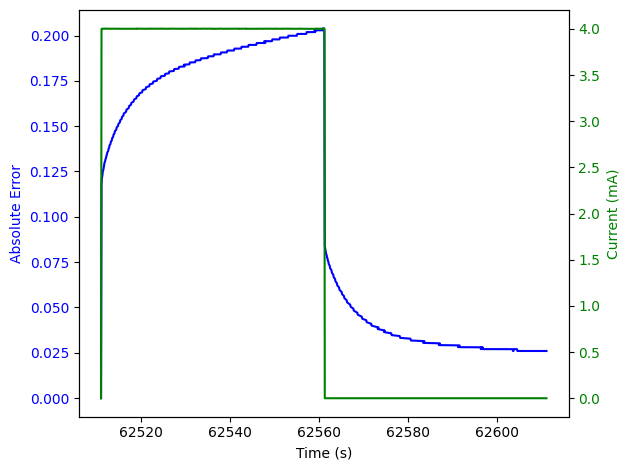

-1


Parameters (First Order ECN): 0.015199999999999925 0.0056000000000000945 703.6607142858115


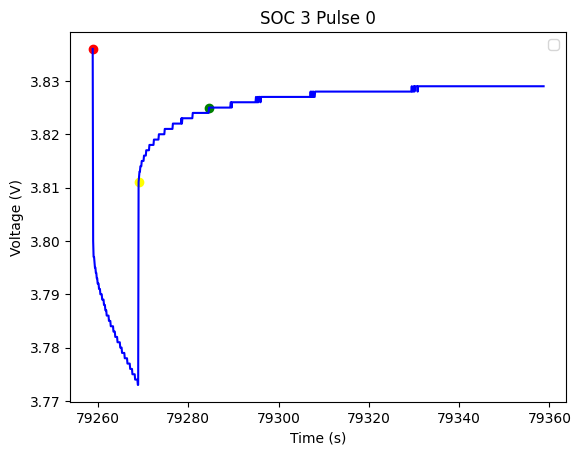

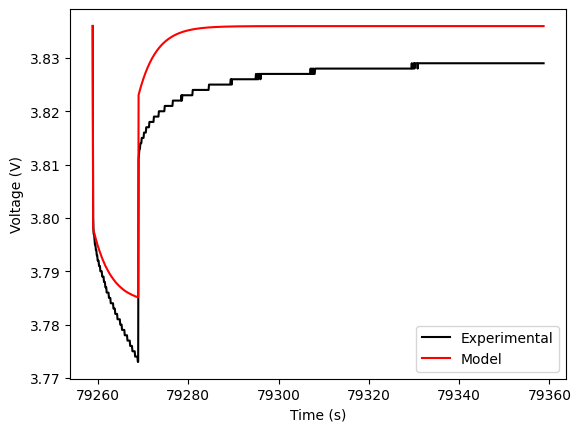

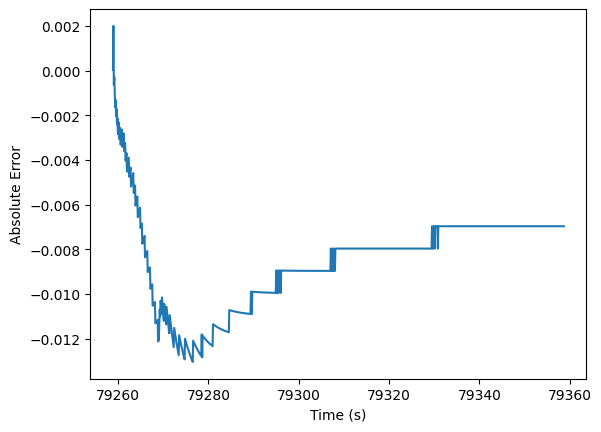

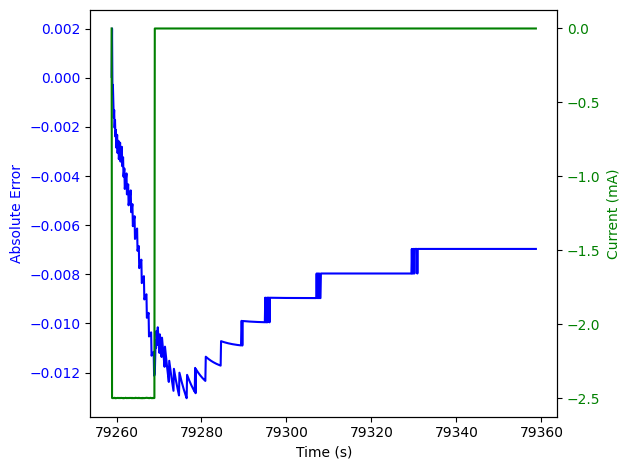

0


Parameters (First Order ECN): 0.015163607342378396 0.0055865921787710444 615.8495000000989


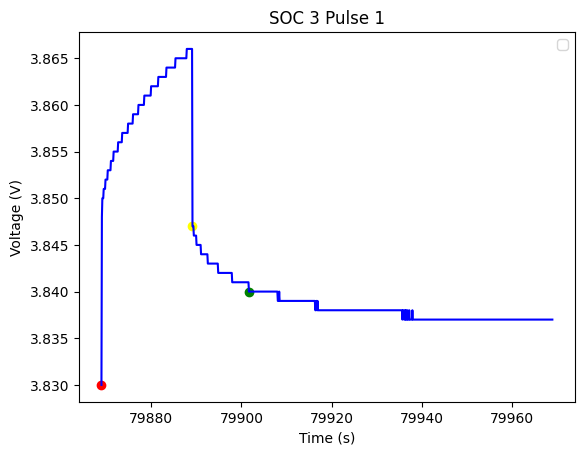

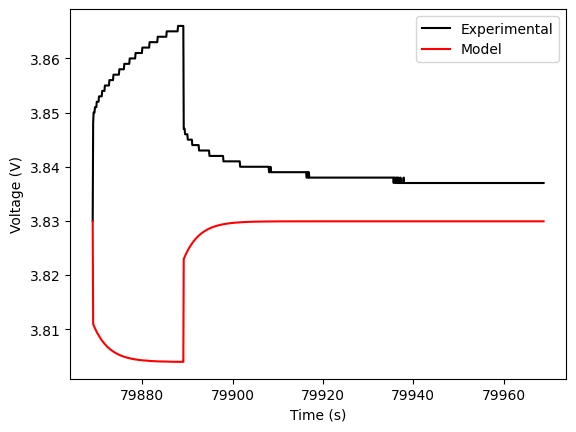

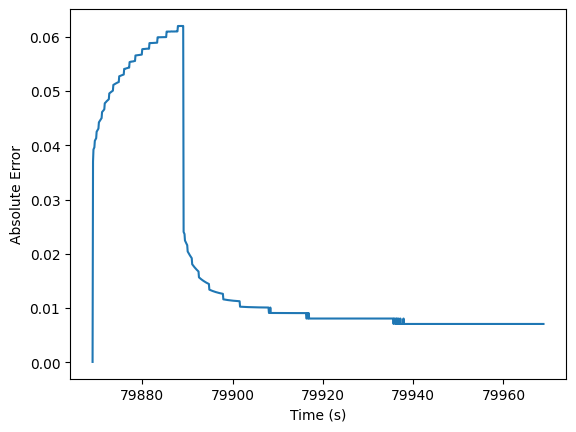

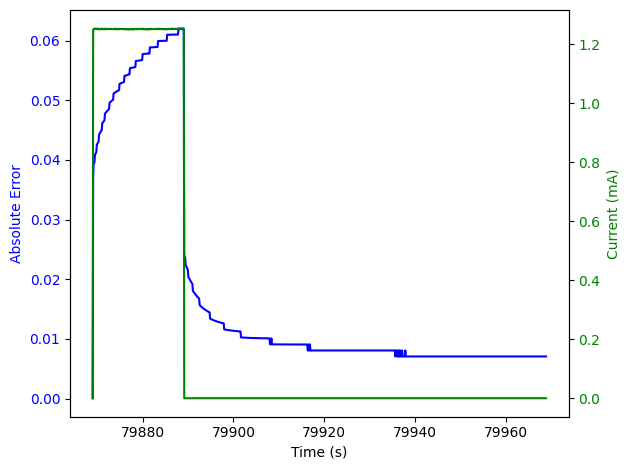

1


Parameters (First Order ECN): 0.015196960607878437 0.005398920215956834 976.7693888887603


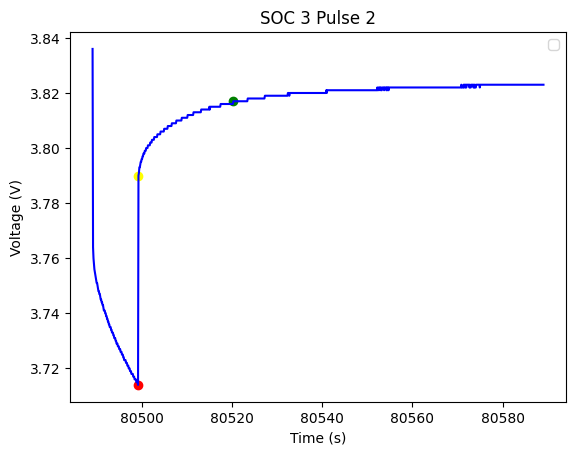

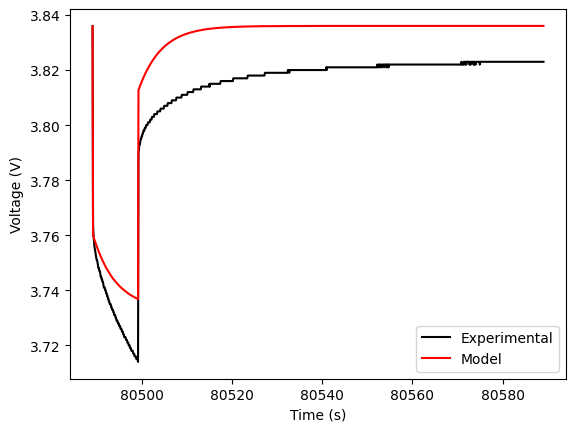

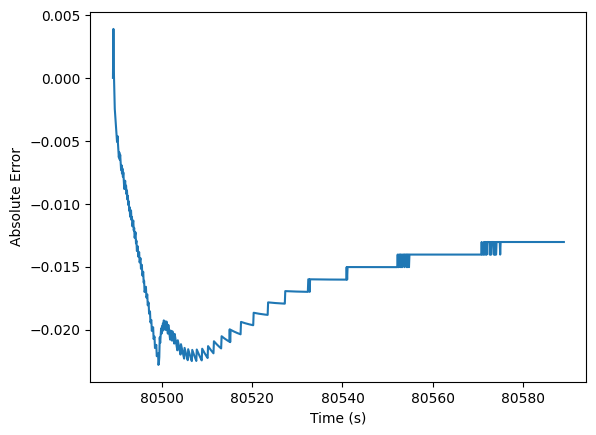

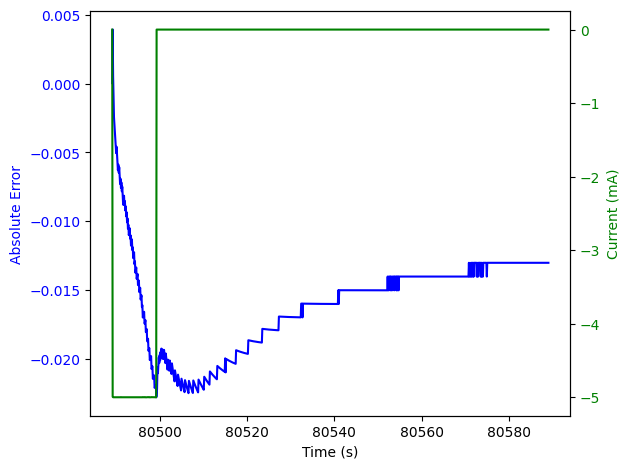

2


Parameters (First Order ECN): 0.014776357827476006 0.005191693290734963 676.9467692302691


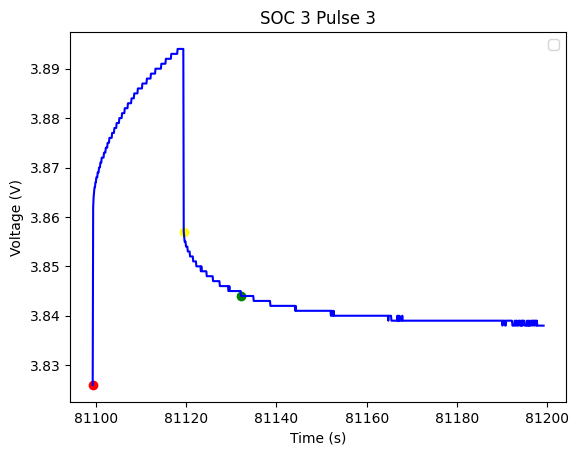

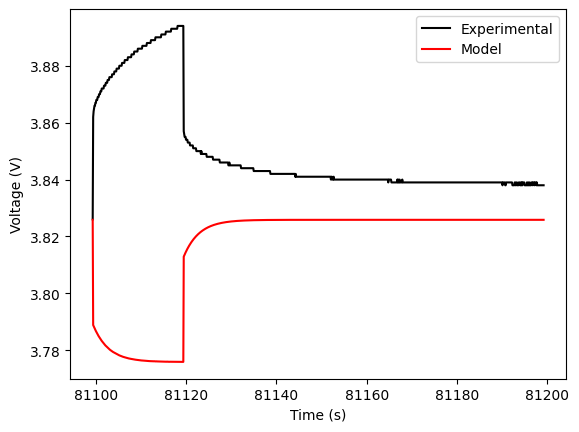

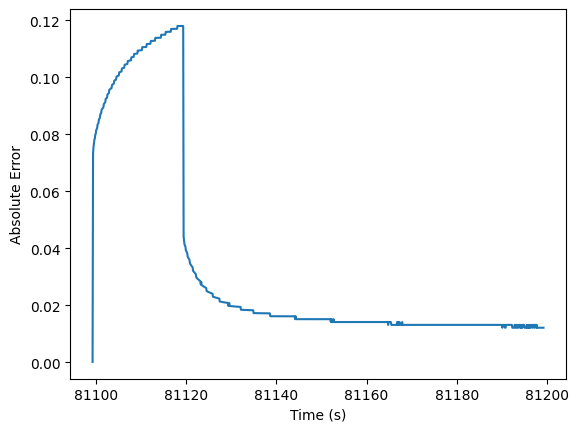

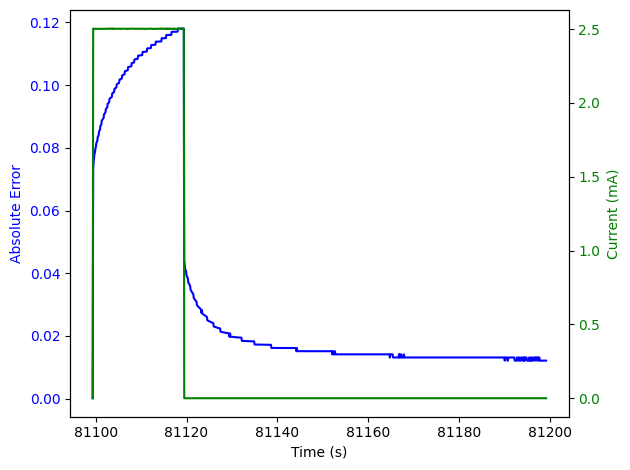

3


Parameters (First Order ECN): 0.014998500149984993 0.004899510048995139 1707.31306117361


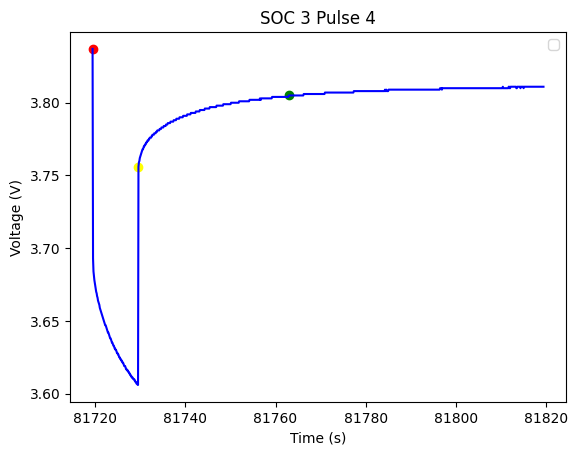

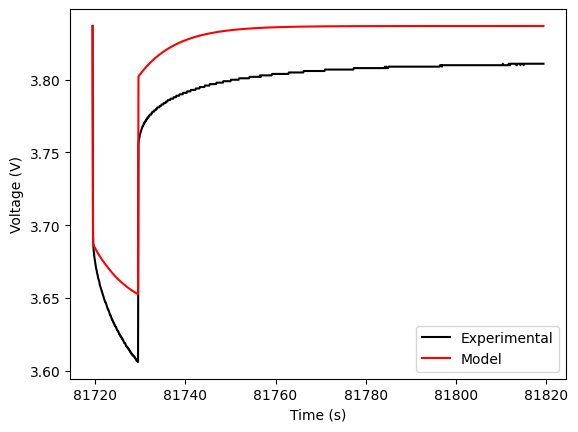

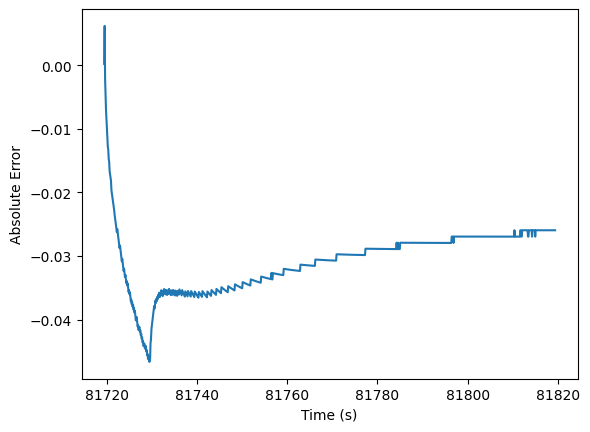

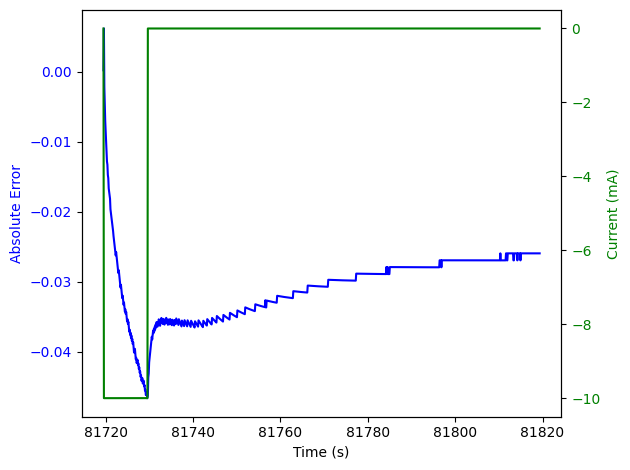

4


Parameters (First Order ECN): 0.014738945790656937 0.006245316012990344 1010.9976800003261


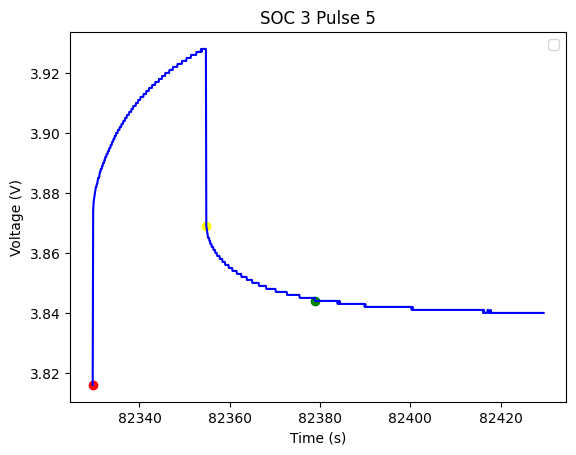

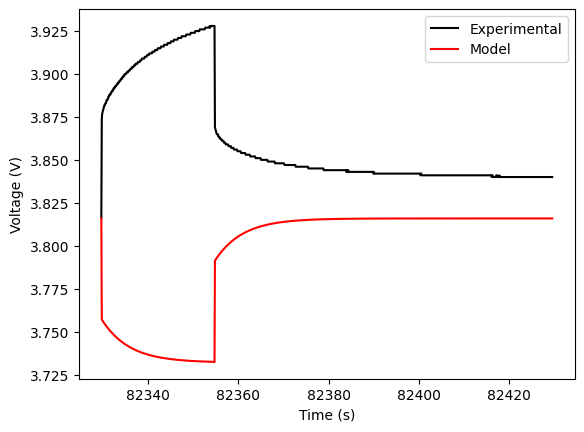

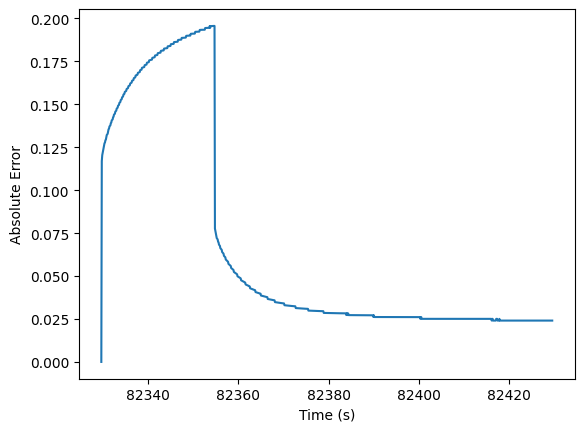

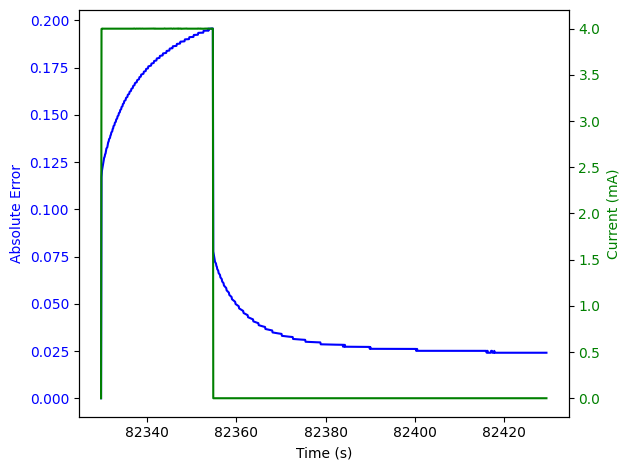

5


Parameters (First Order ECN): 0.014799260036998163 0.00444977751112444 2020.2128033424362


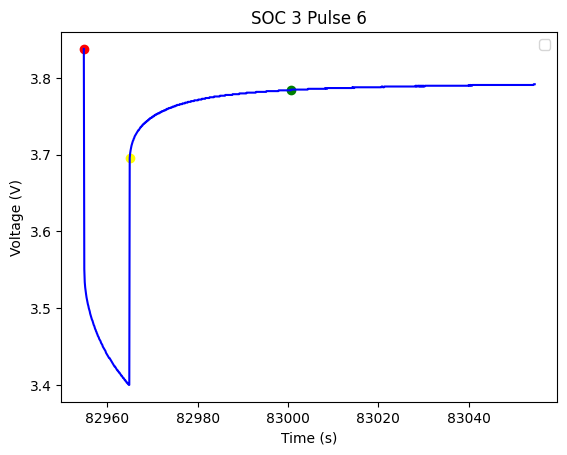

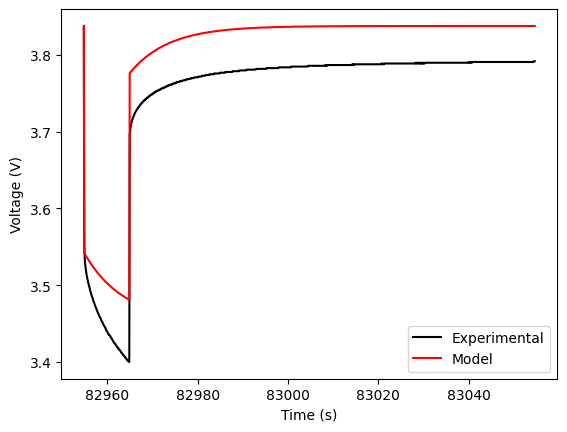

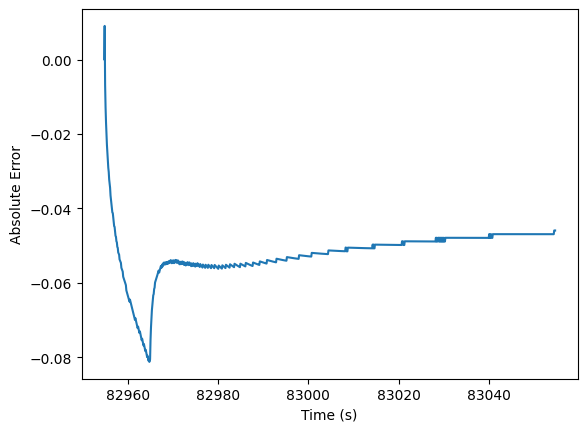

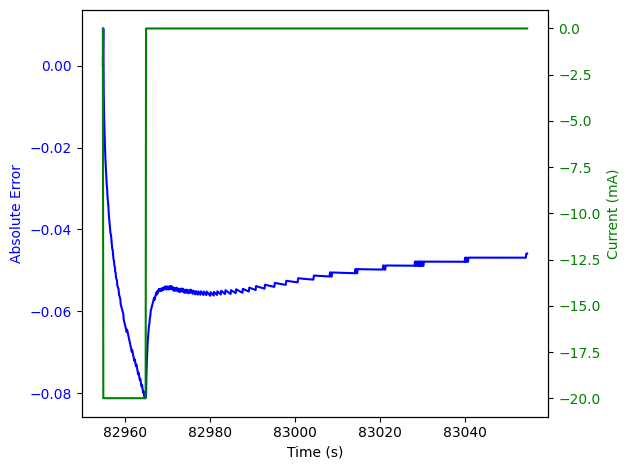

6


Parameters (First Order ECN): 0.018735948038970815 0.003497376967274493 2484.576321428724


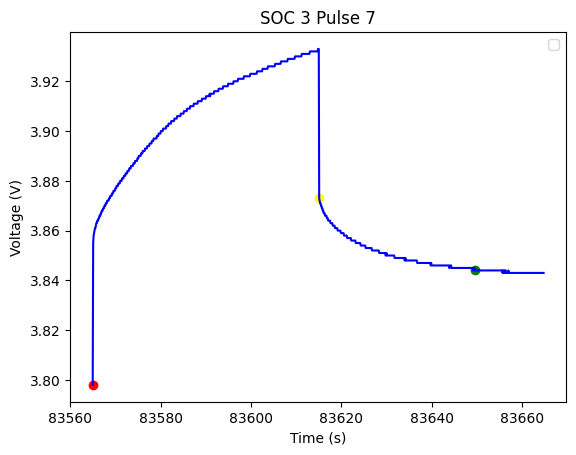

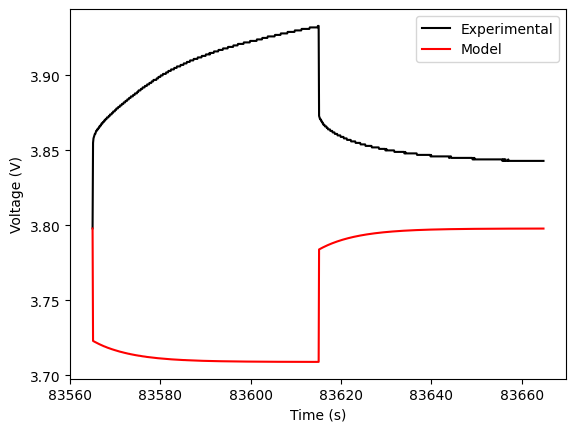

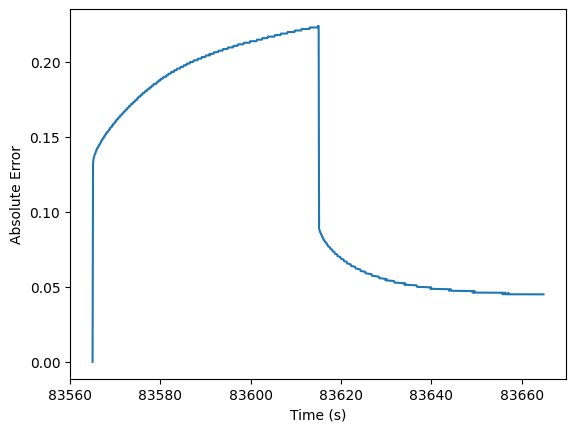

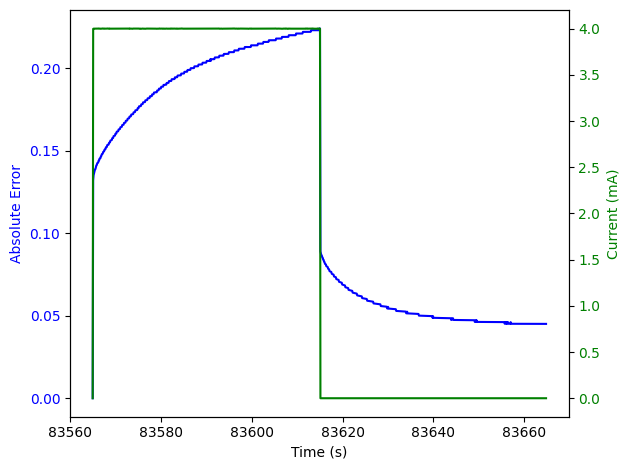

-1


Parameters (First Order ECN): 0.01479999999999997 0.00400000000000009 722.8749999994598


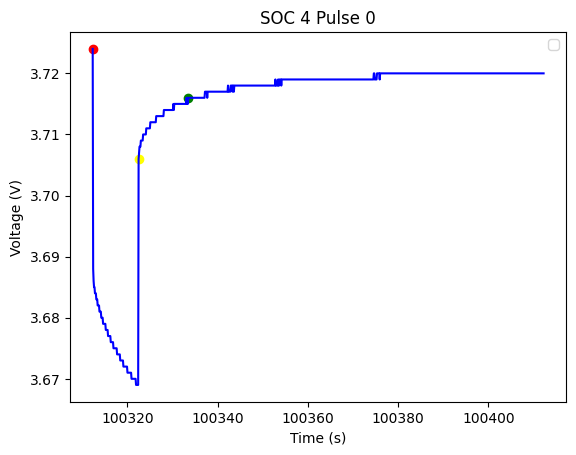

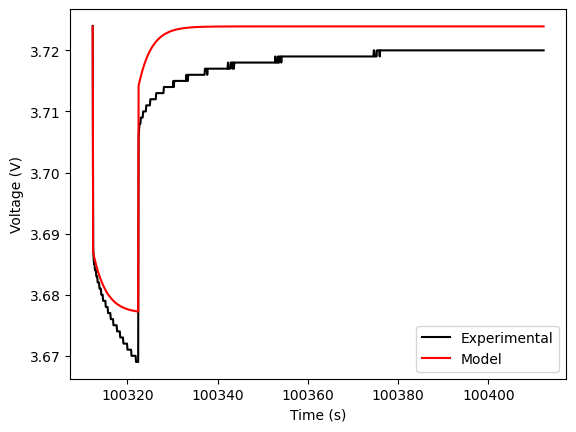

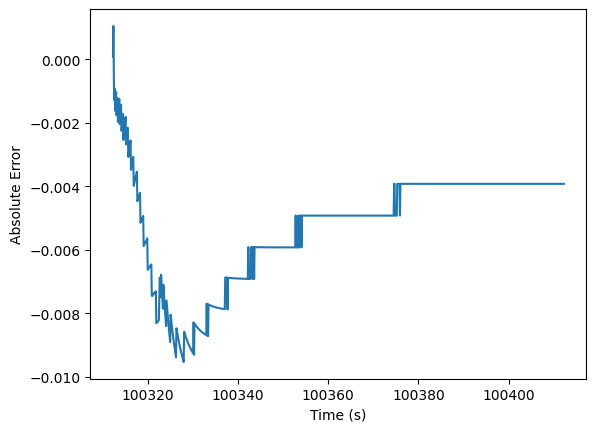

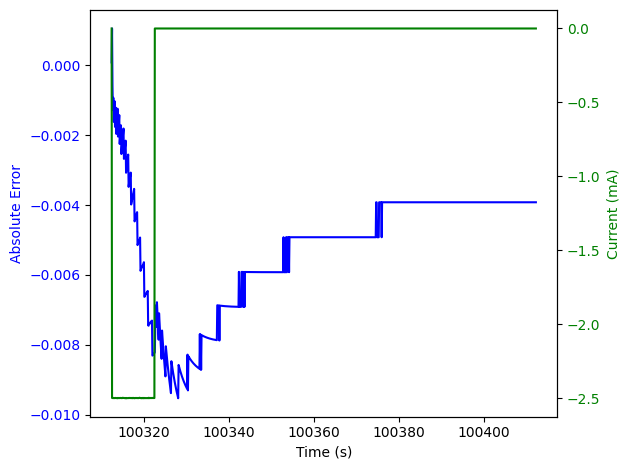

0


Parameters (First Order ECN): 0.015163607342378042 0.0047885075818038525 619.1908333333403


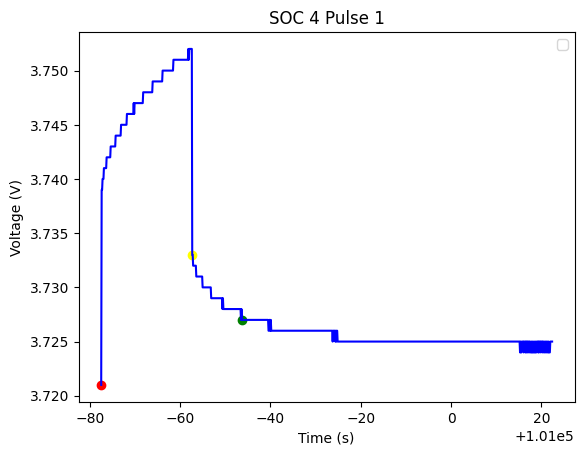

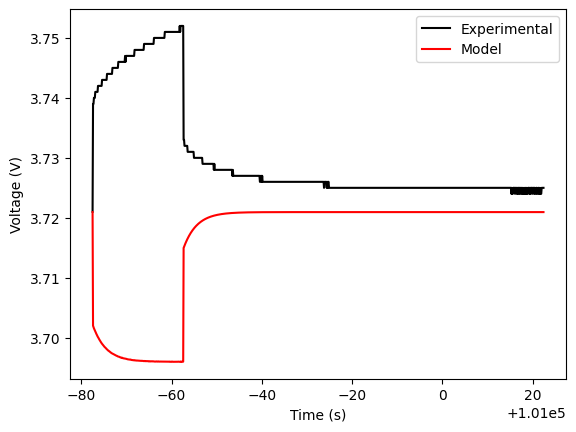

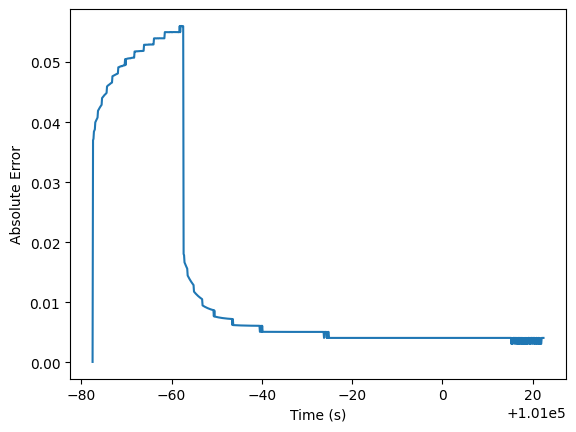

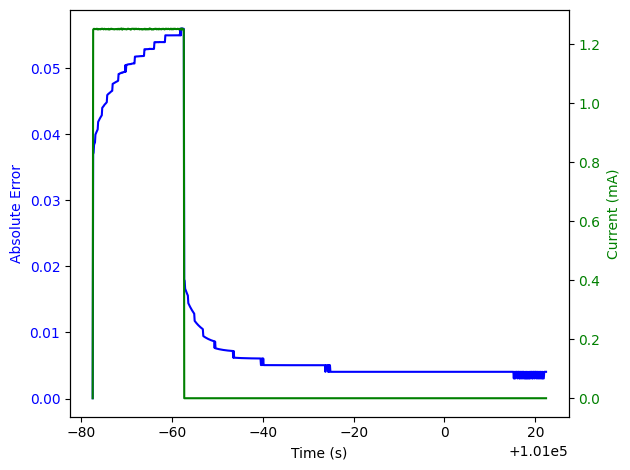

1


Parameters (First Order ECN): 0.01499700059987997 0.004199160167966476 1021.8710000002395


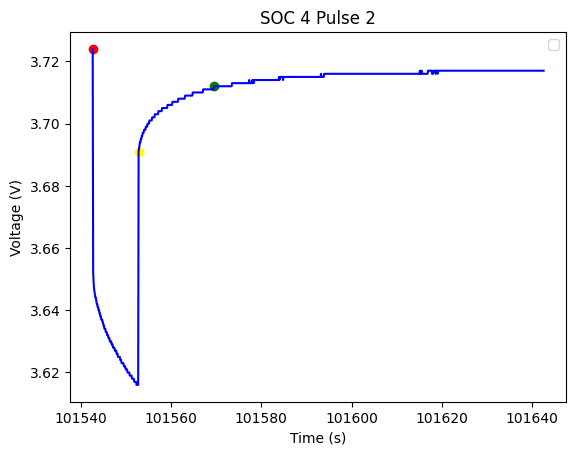

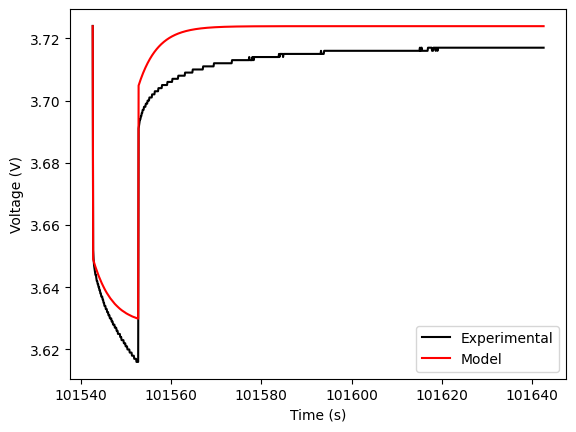

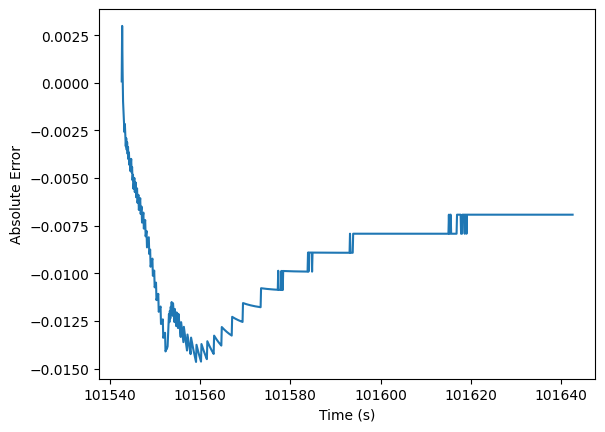

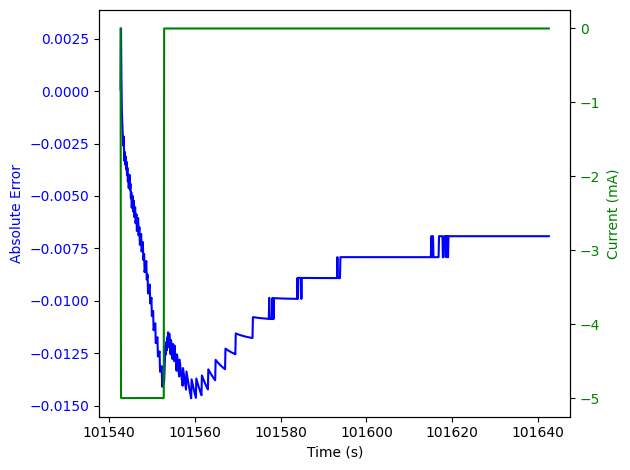

2


Parameters (First Order ECN): 0.014776357827476006 0.005990415335463311 1212.603733333799


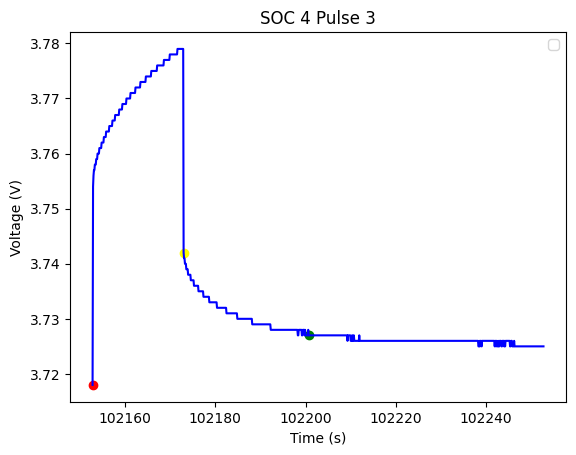

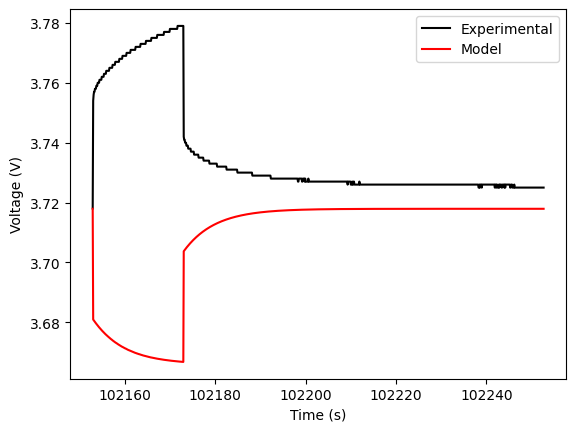

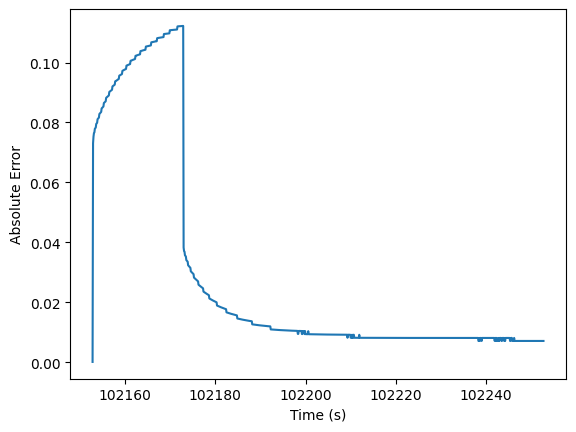

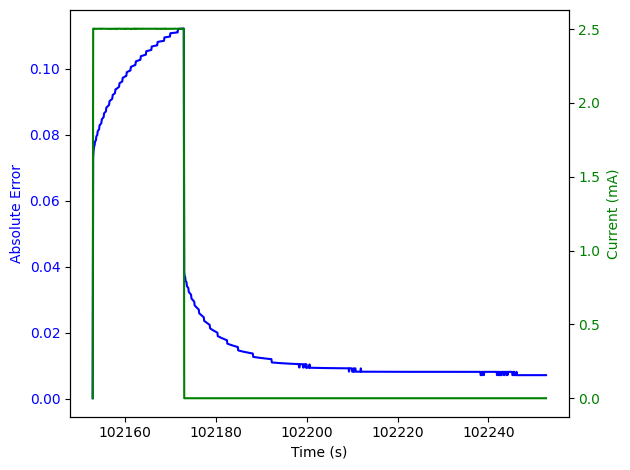

3


Parameters (First Order ECN): 0.014998500149984993 0.004699530046995316 1748.0471276595997


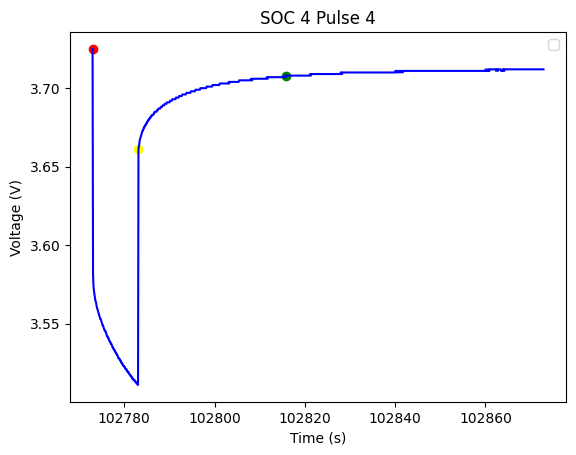

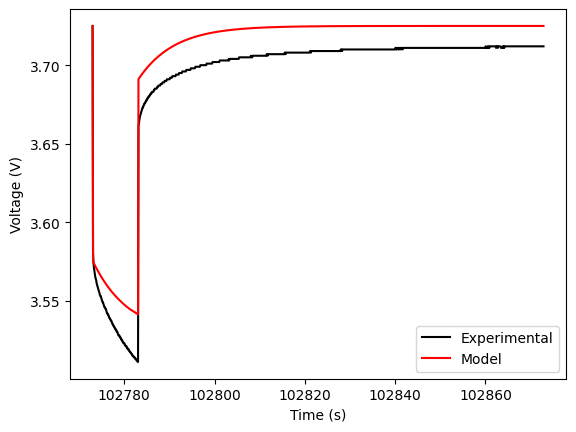

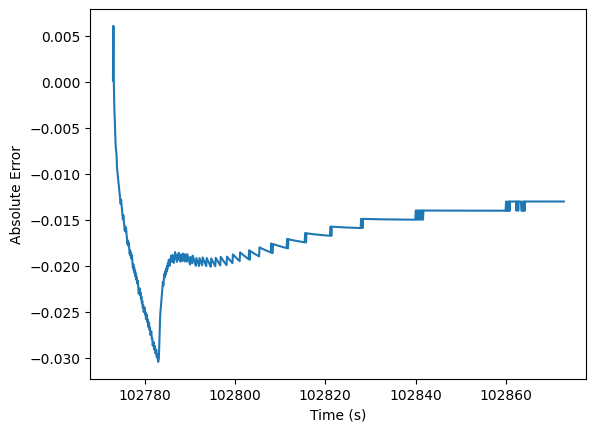

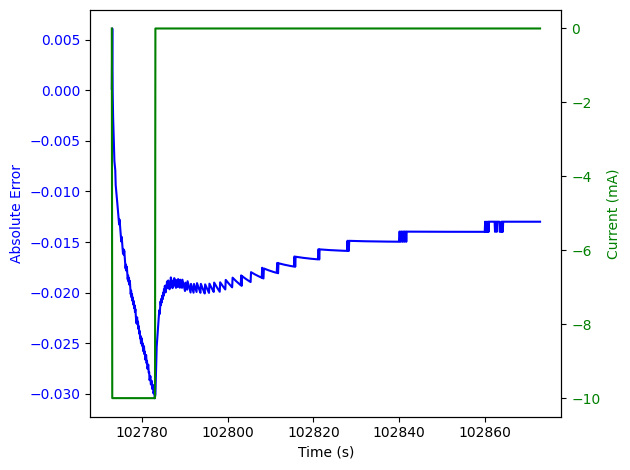

4


Parameters (First Order ECN): 0.014985014985015 0.0054945054945055565 935.389000000196


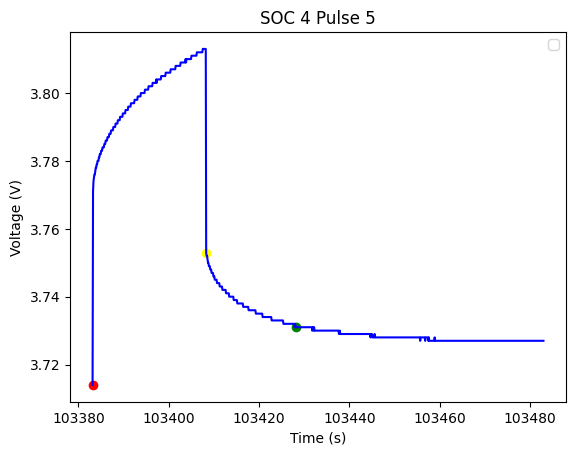

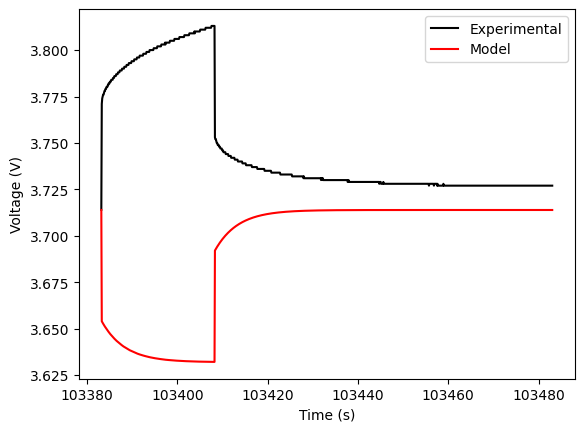

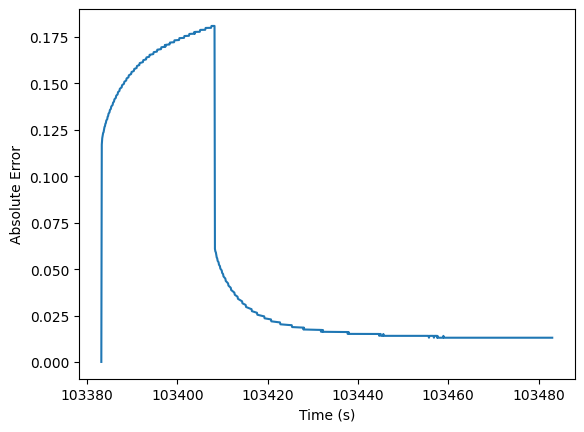

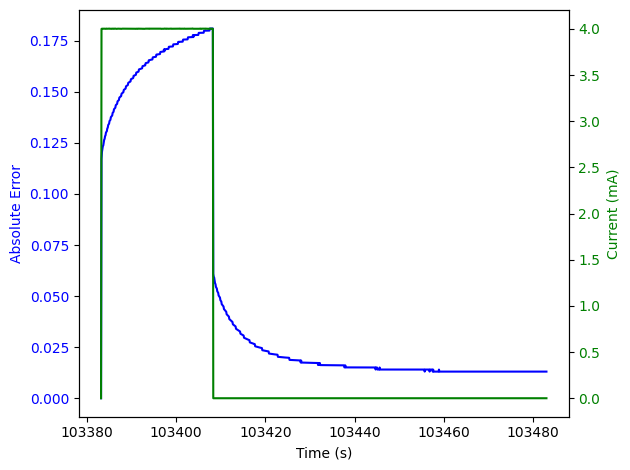

5


Parameters (First Order ECN): 0.014899255037248139 0.0047497625118744155 2882.038831579389


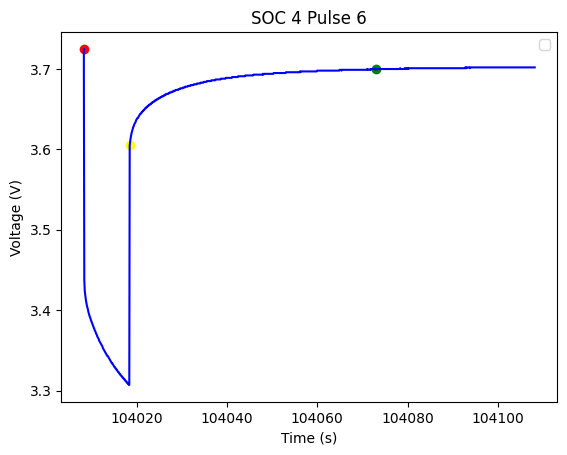

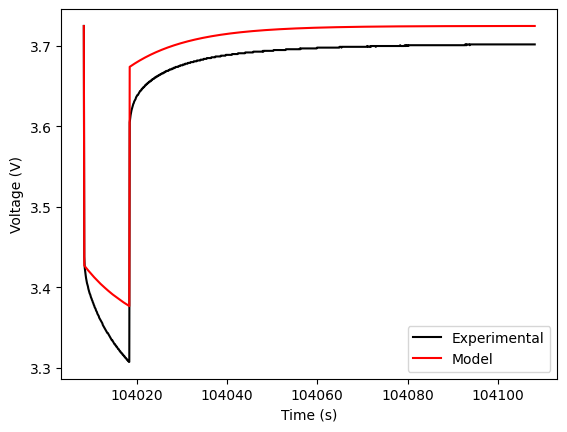

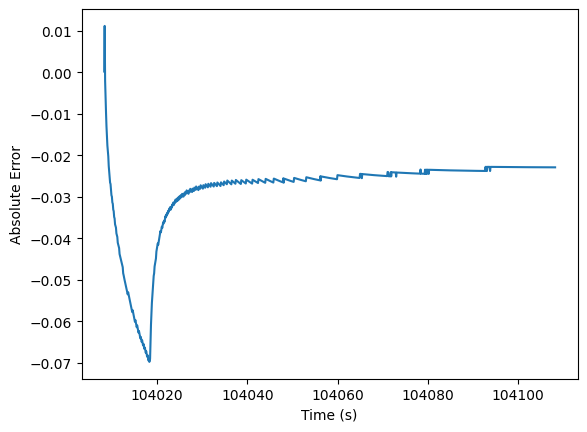

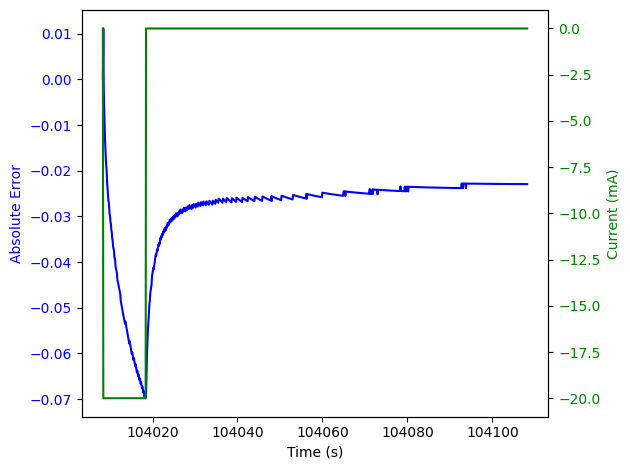

6


Parameters (First Order ECN): 0.01498875843117663 0.006994753934549094 1131.4193571429519


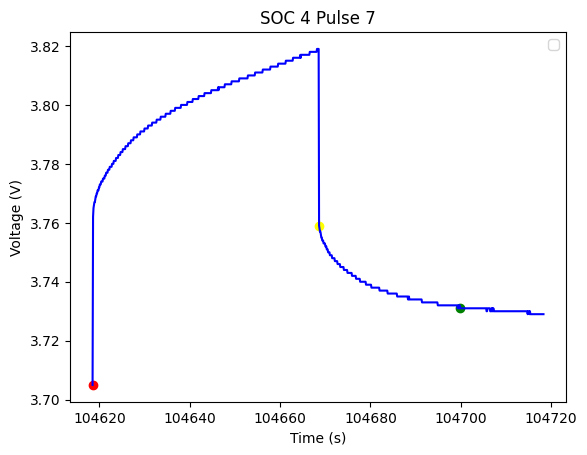

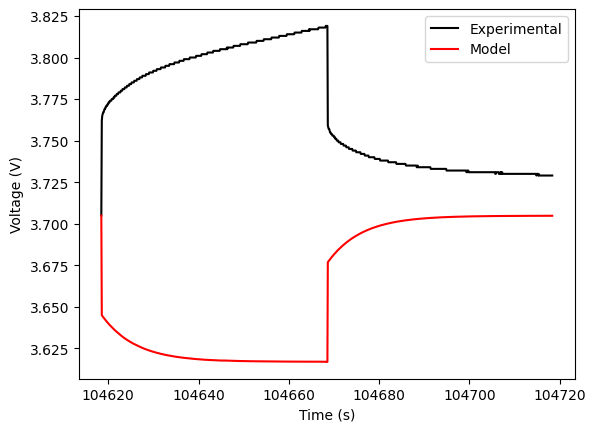

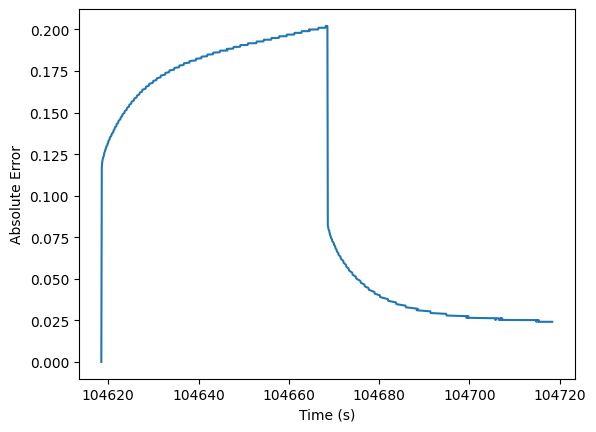

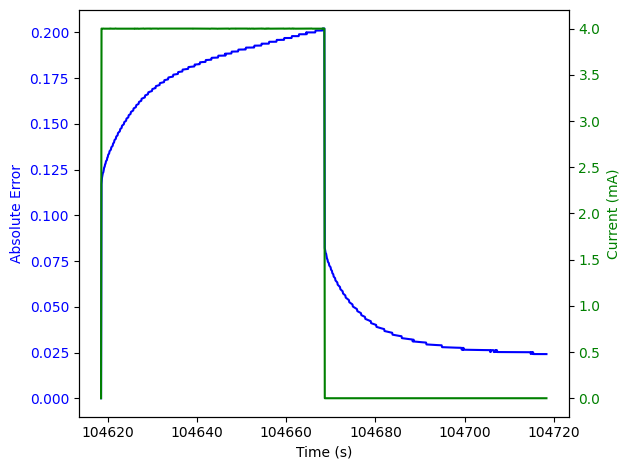

-1


Parameters (First Order ECN): 0.015193922431027514 0.0035985605757698283 851.3126111101245


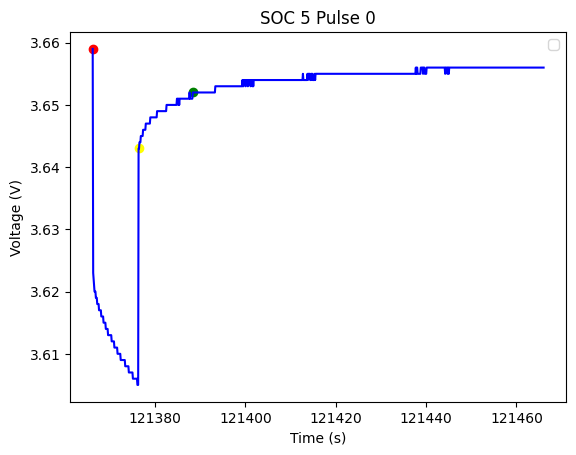

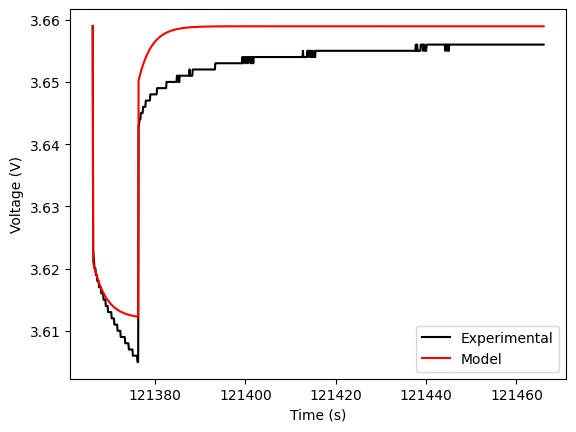

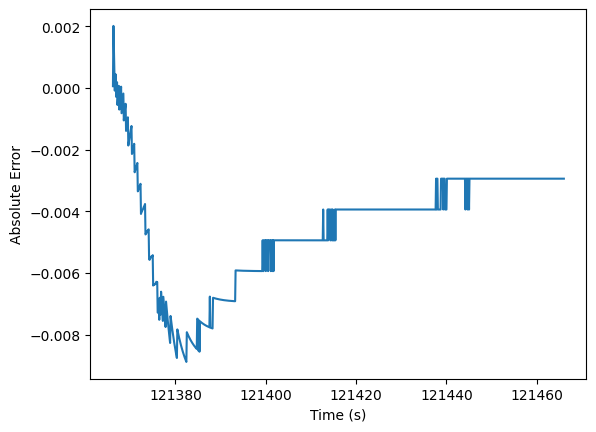

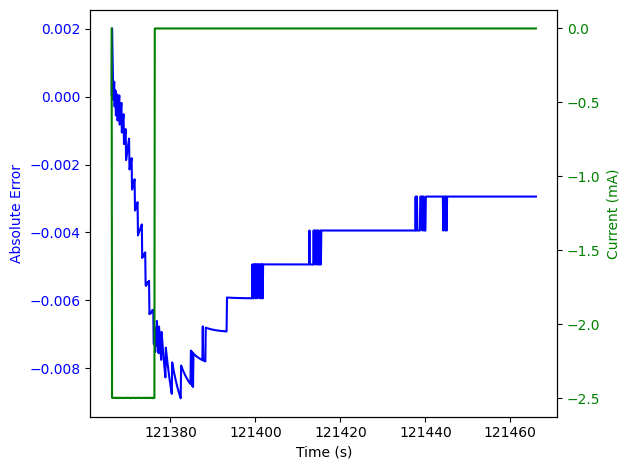

0


Parameters (First Order ECN): 0.015163607342378396 0.0047885075818038525 802.0244166663081


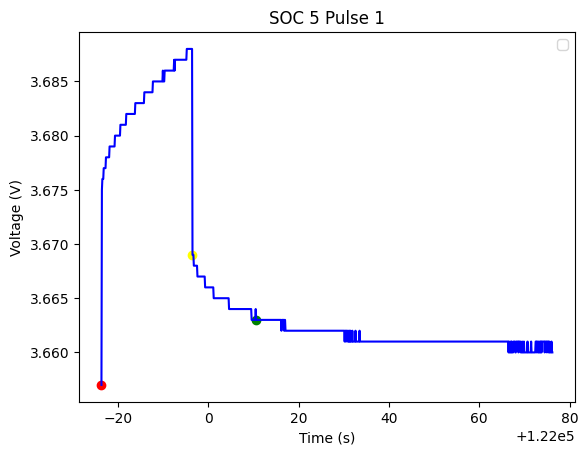

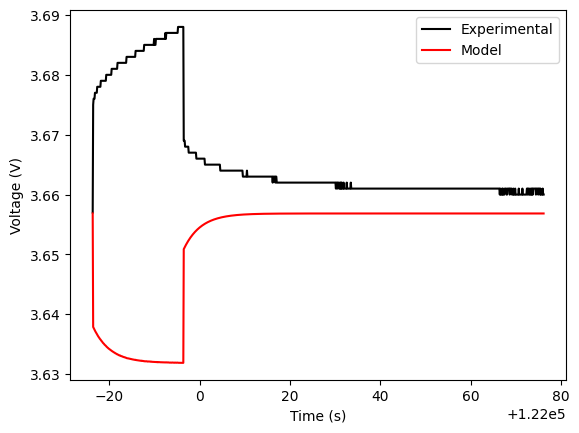

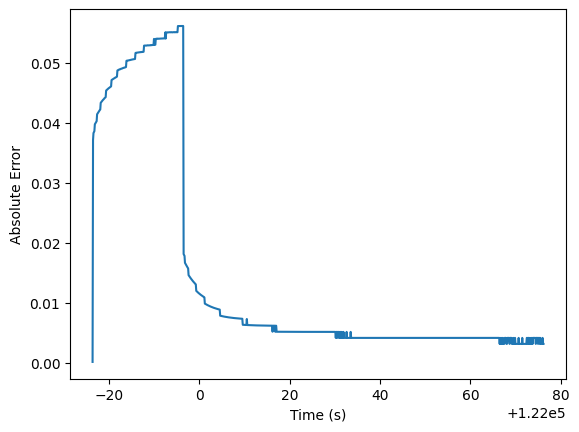

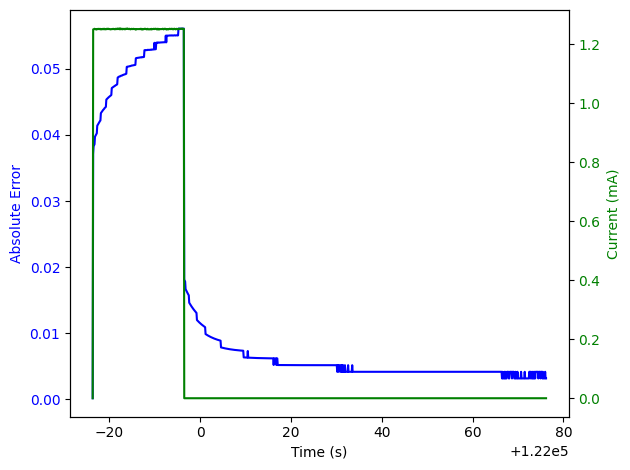

1


Parameters (First Order ECN): 0.01499700059987997 0.004199160167966476 1247.6304285717406


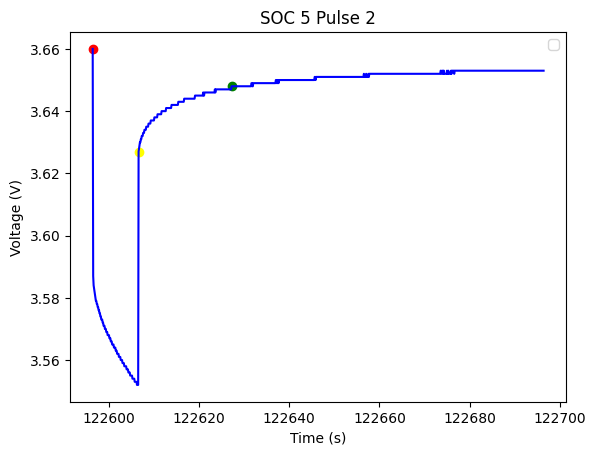

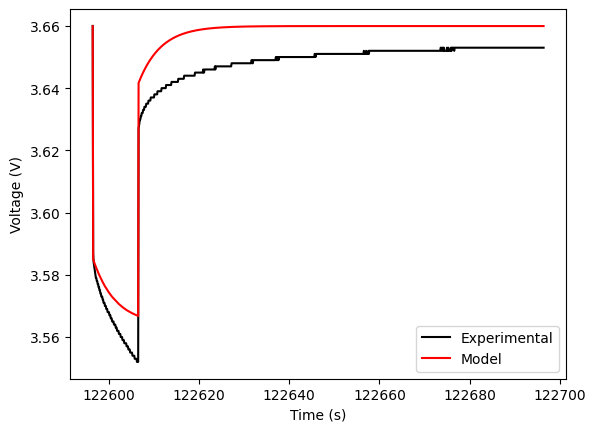

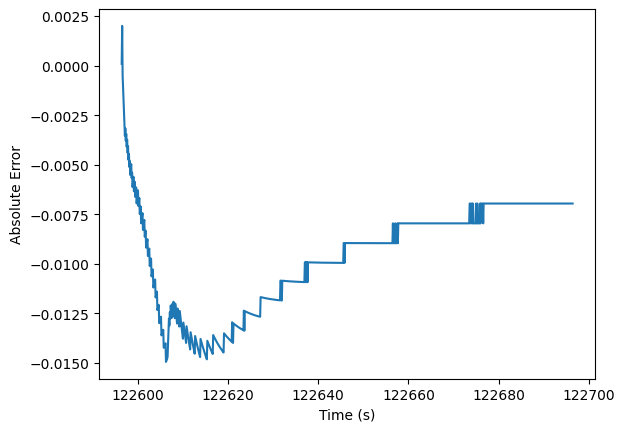

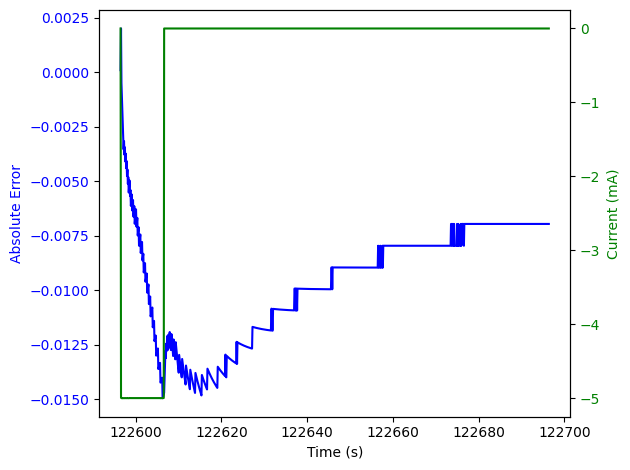

2


Parameters (First Order ECN): 0.014776357827476006 0.004392971246006438 743.1189090911593


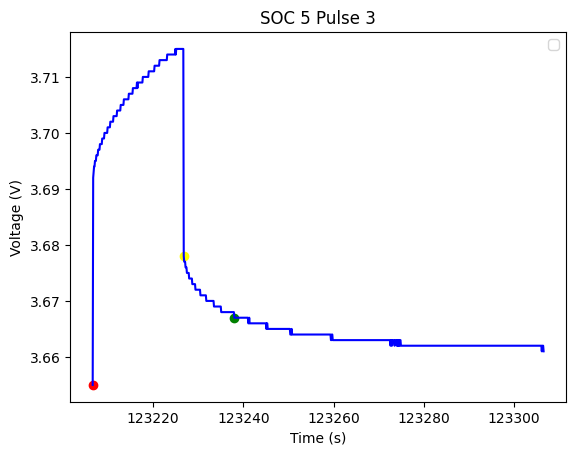

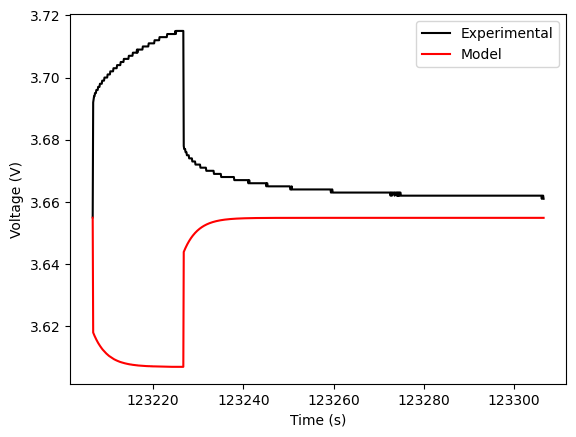

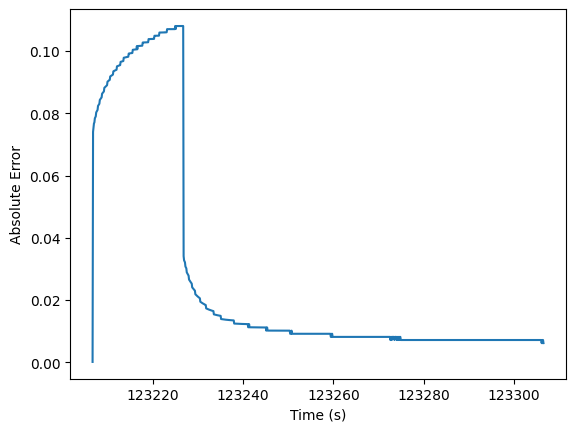

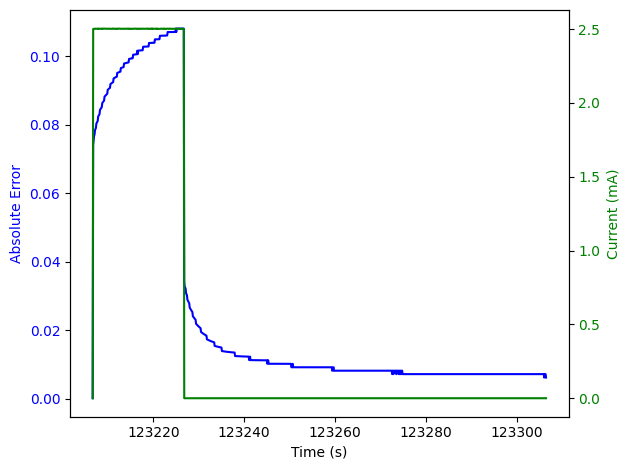

3


Parameters (First Order ECN): 0.015096980603879203 0.004699060187962421 2170.1147872336956


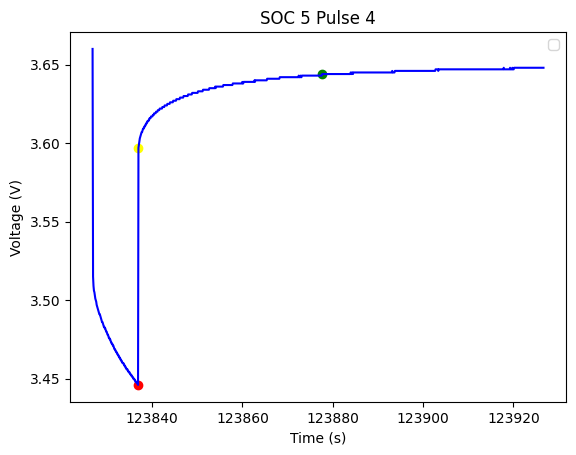

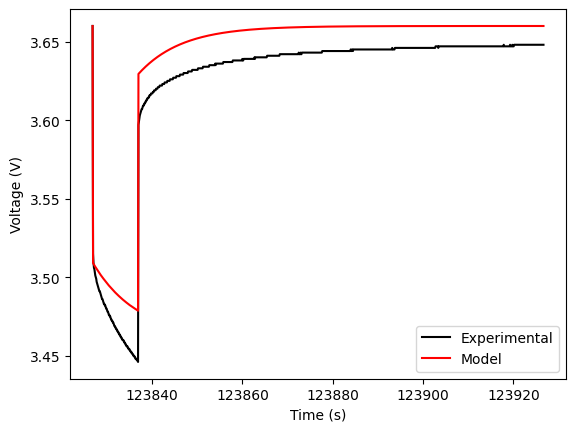

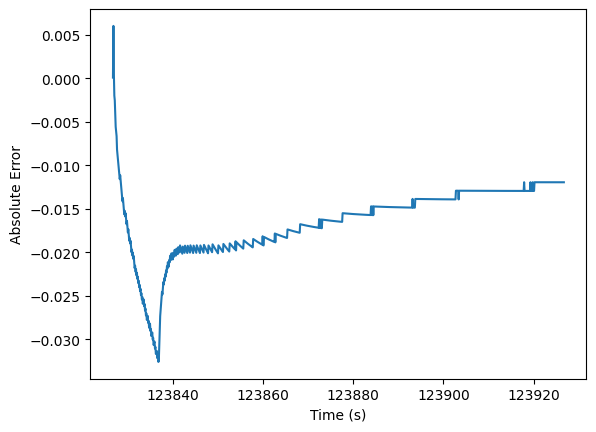

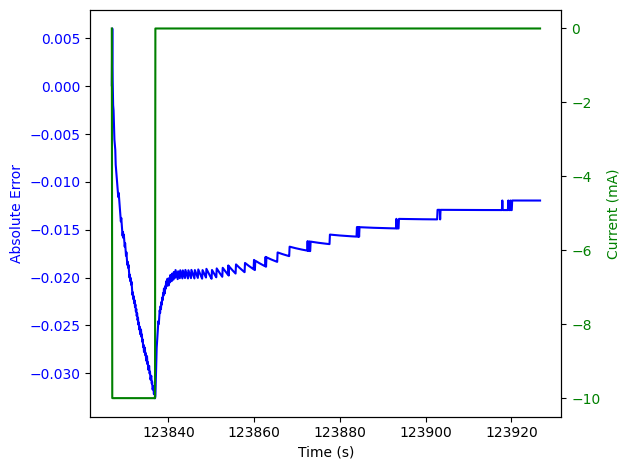

4


Parameters (First Order ECN): 0.014738945790657048 0.005745690731951069 1081.7672391307883


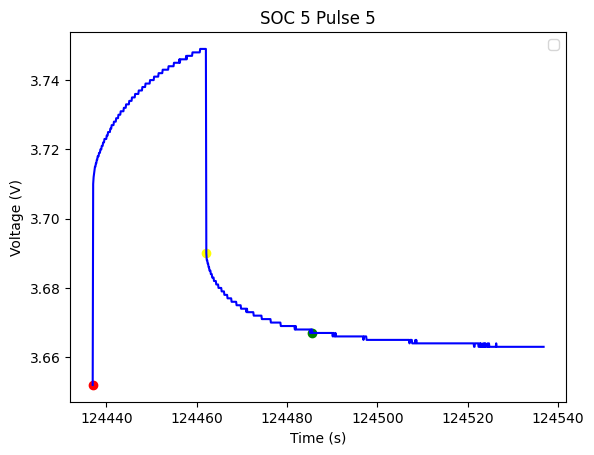

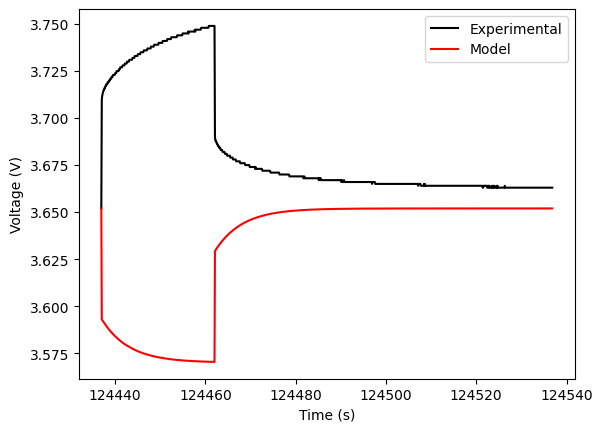

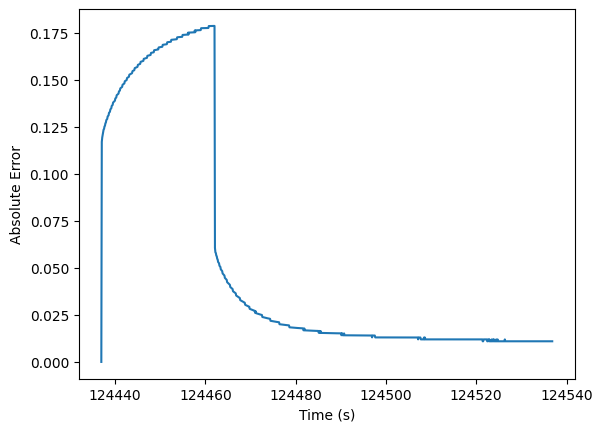

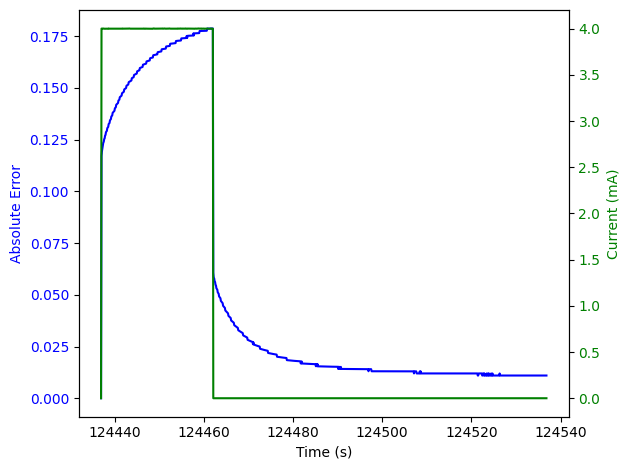

5


Parameters (First Order ECN): 0.015099245037748114 0.0045997700114994294 2878.513483695624


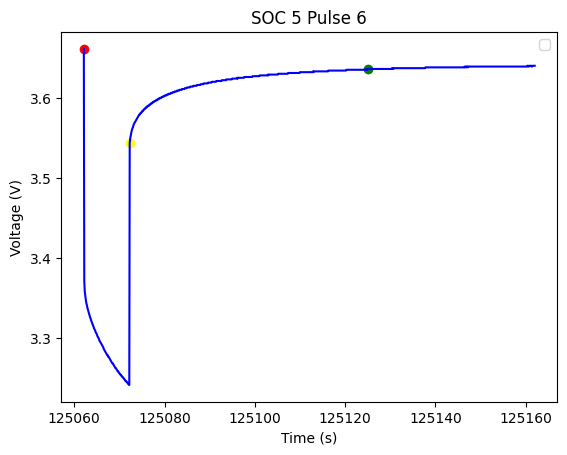

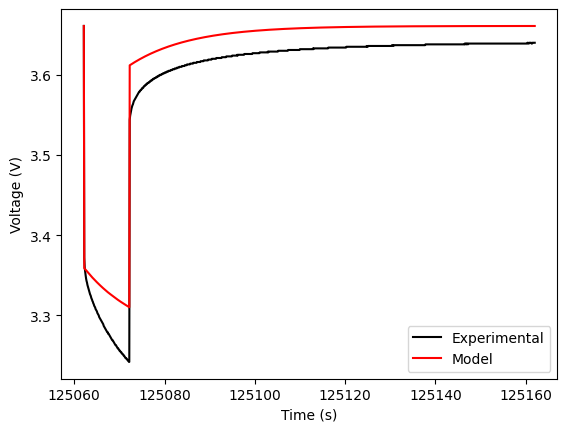

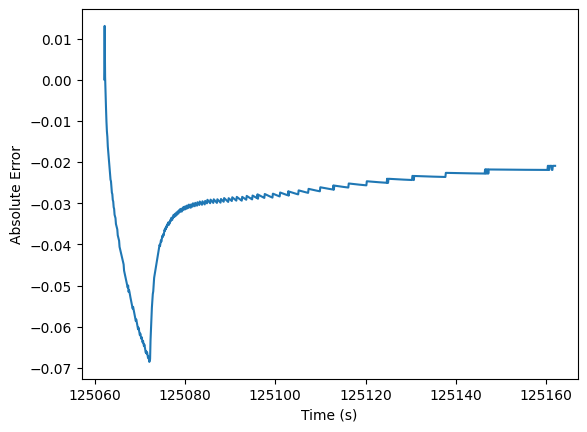

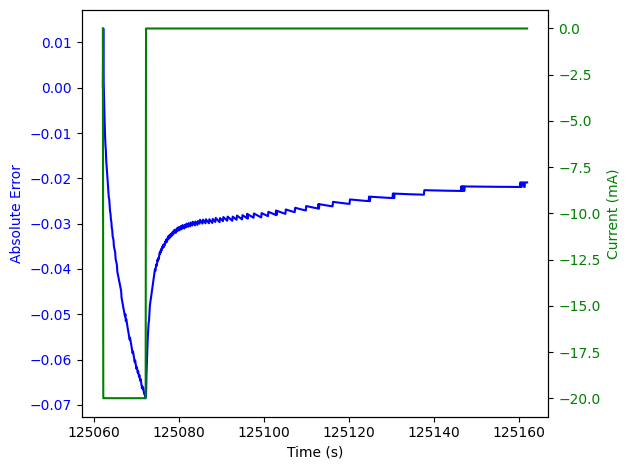

6


Parameters (First Order ECN): 0.014735264735264667 0.007242757242757334 1327.4640689654564


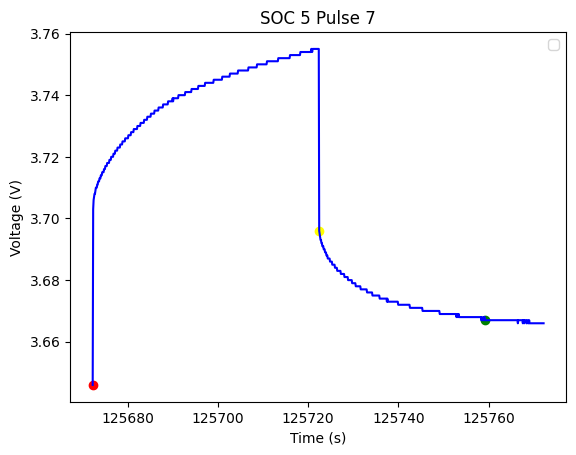

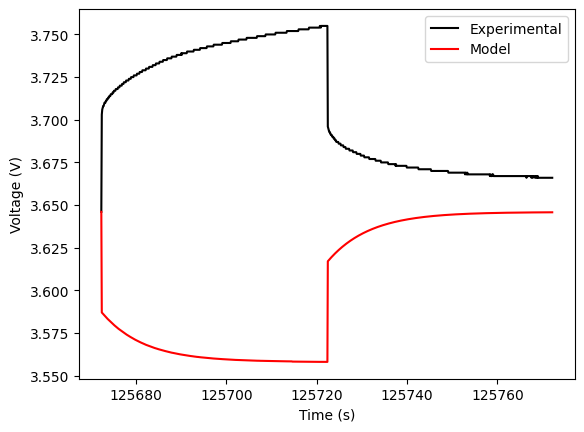

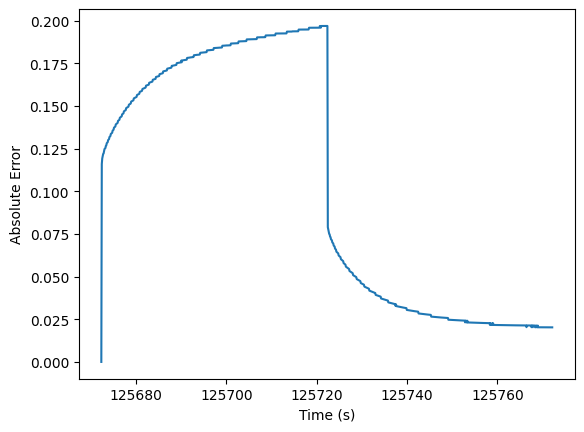

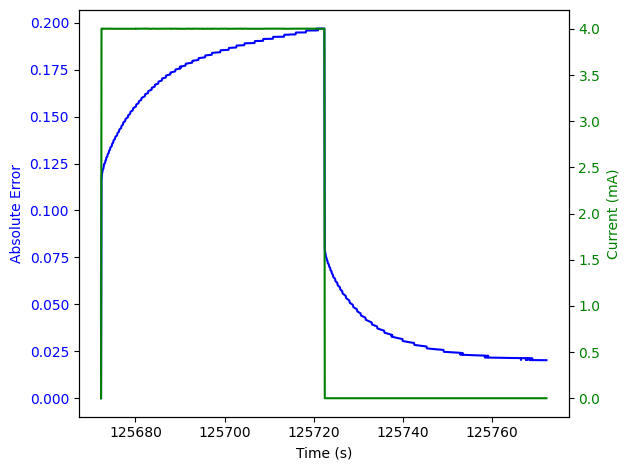

-1


Parameters (First Order ECN): 0.015193922431027514 0.0035985605757698283 858.5377222227073


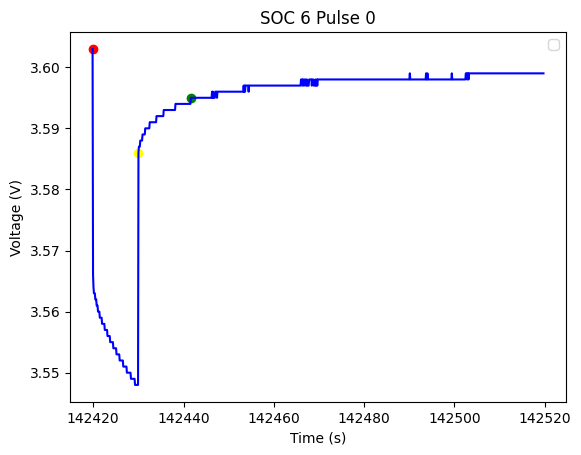

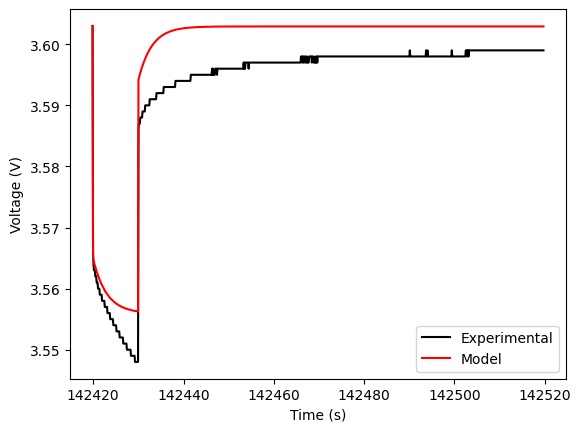

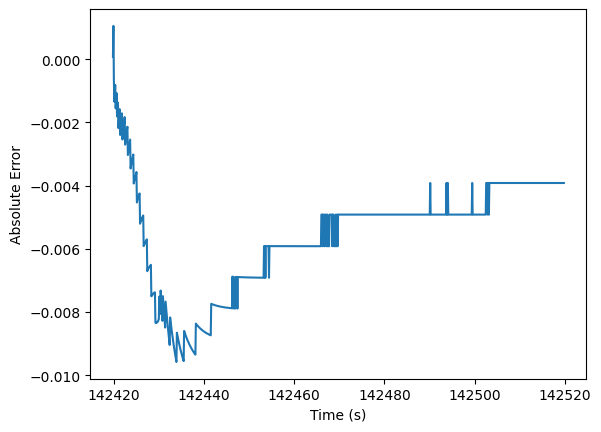

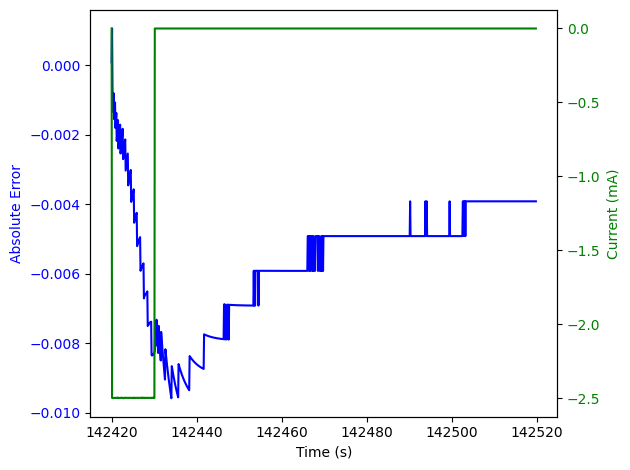

0


Parameters (First Order ECN): 0.015163607342378042 0.0047885075818038525 739.2700000001544


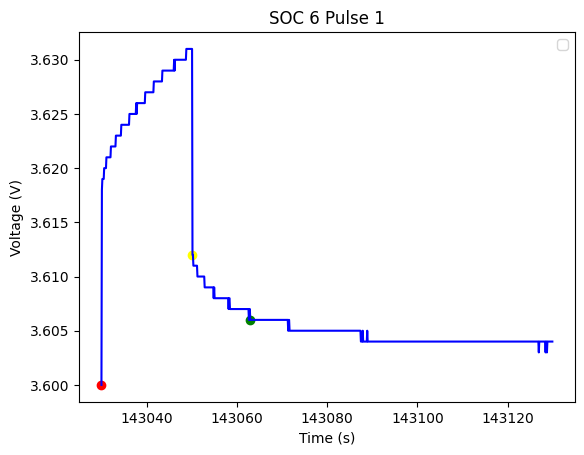

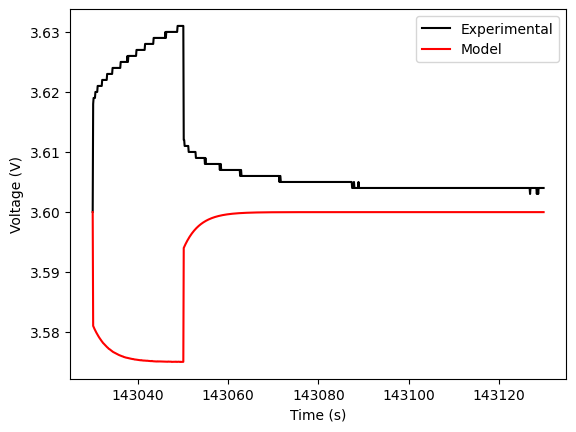

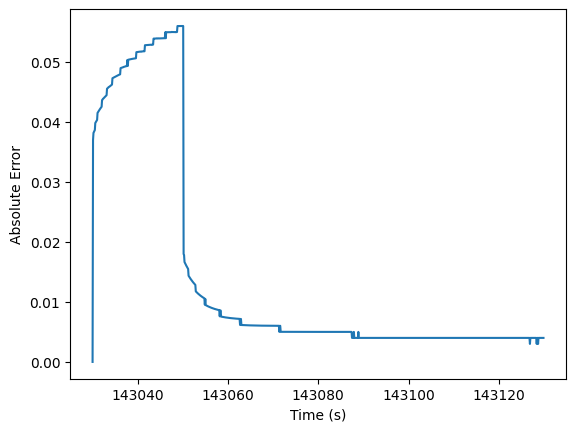

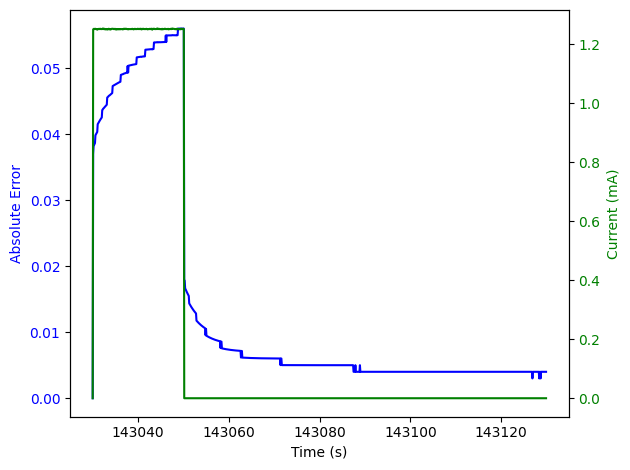

1


Parameters (First Order ECN): 0.015196960607878437 0.003999200159968009 1135.3520249988785


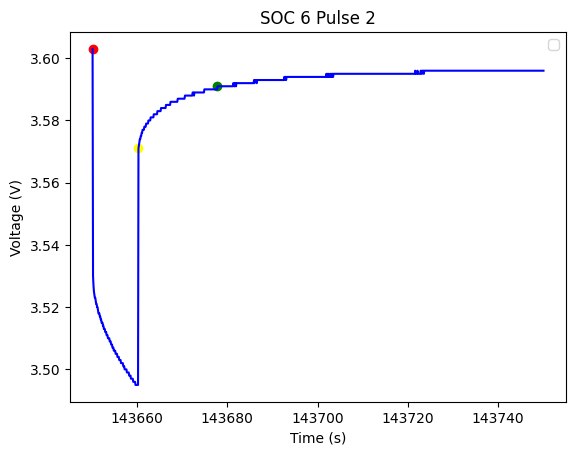

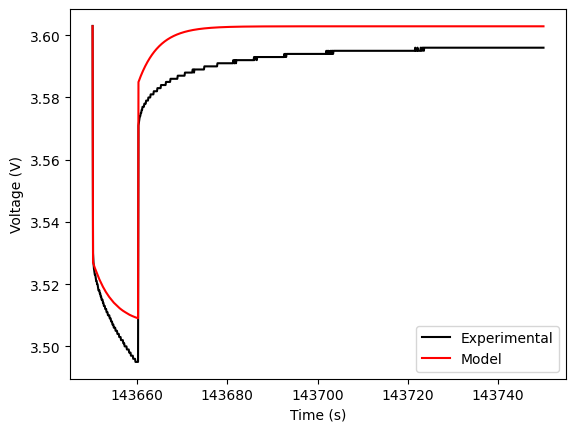

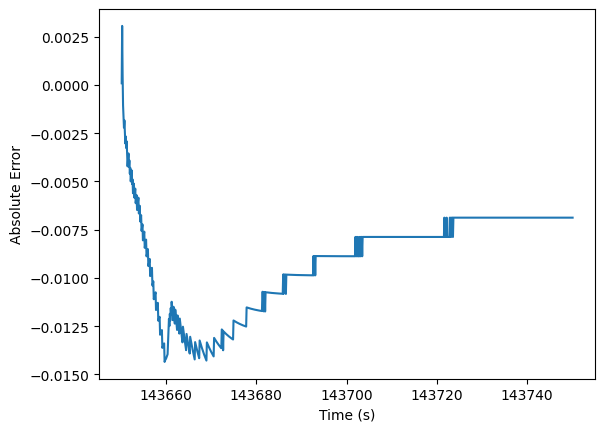

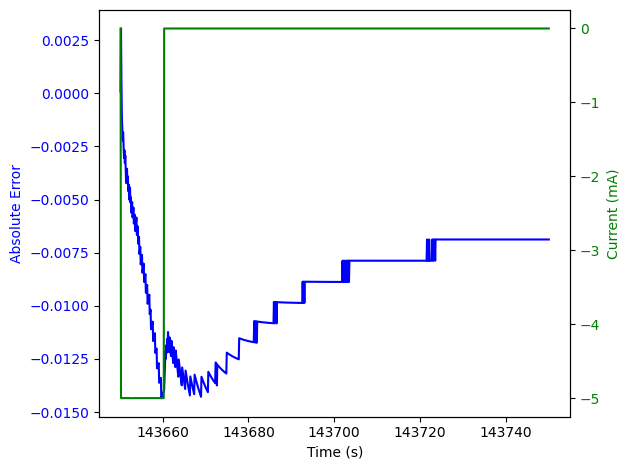

2


Parameters (First Order ECN): 0.015175718849840357 0.004792332268370612 832.371333333624


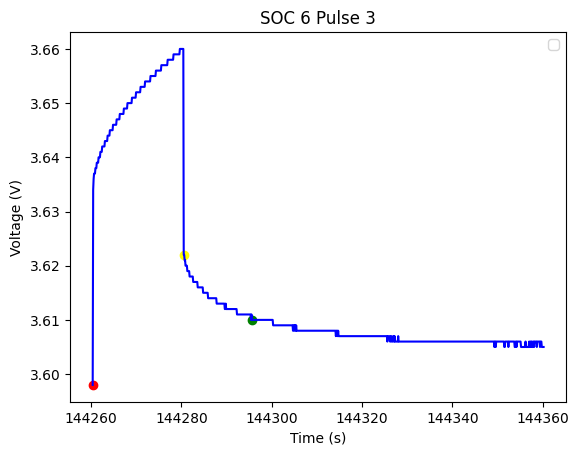

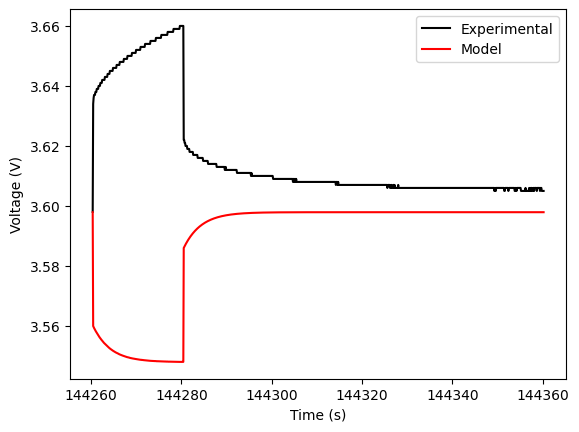

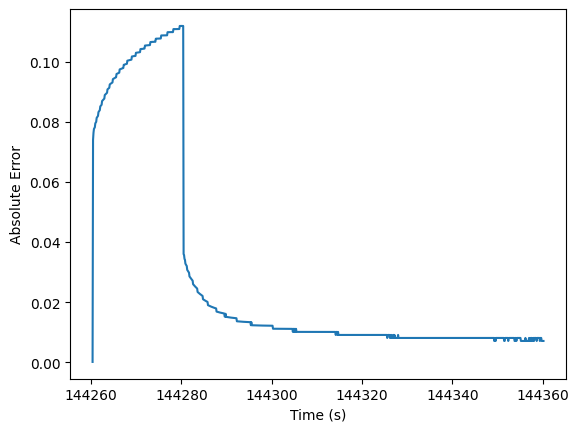

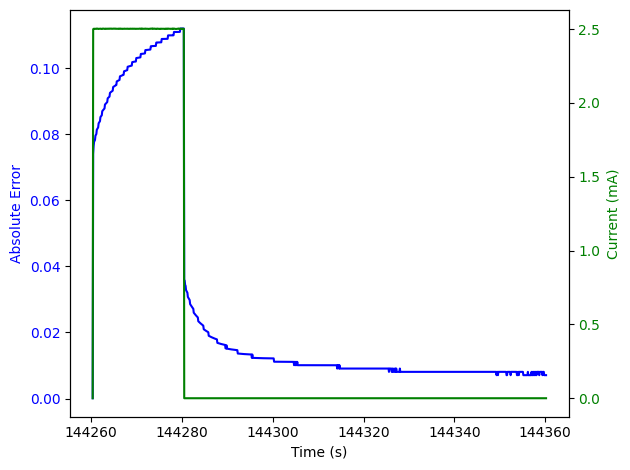

3


Parameters (First Order ECN): 0.015398460153984639 0.004399560043995604 1789.4971136379233


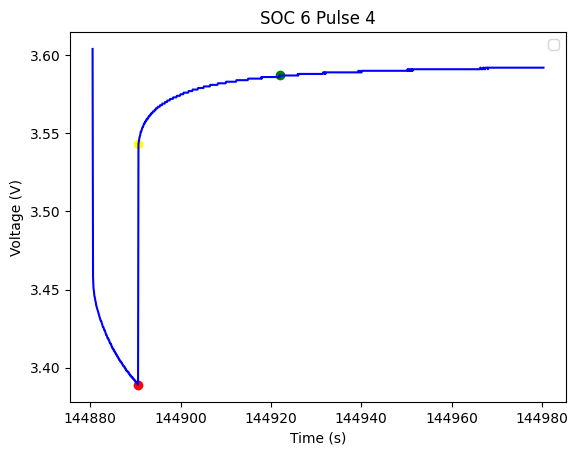

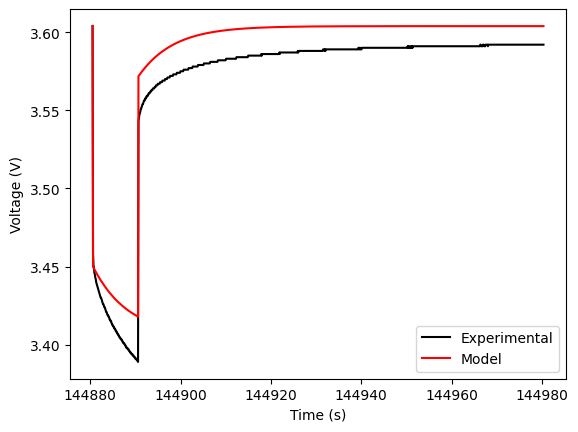

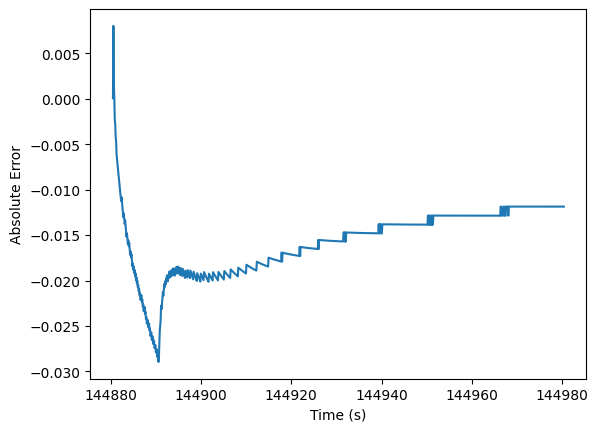

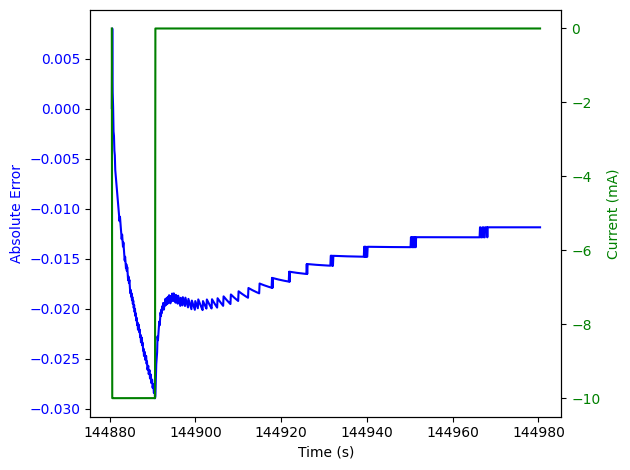

4


Parameters (First Order ECN): 0.015238571071696213 0.005745690731951069 1007.5376956516517


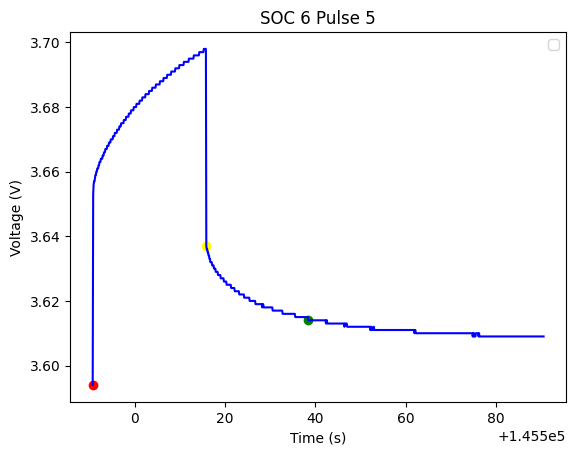

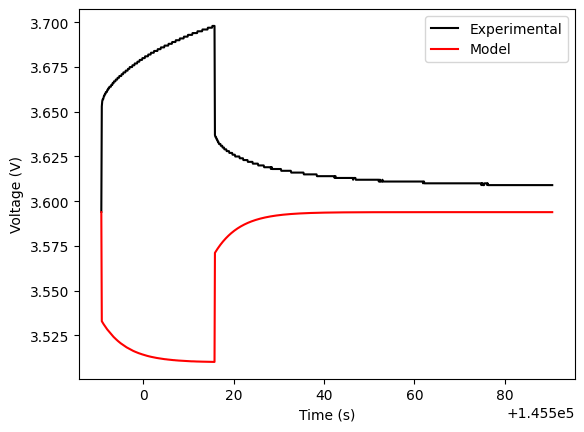

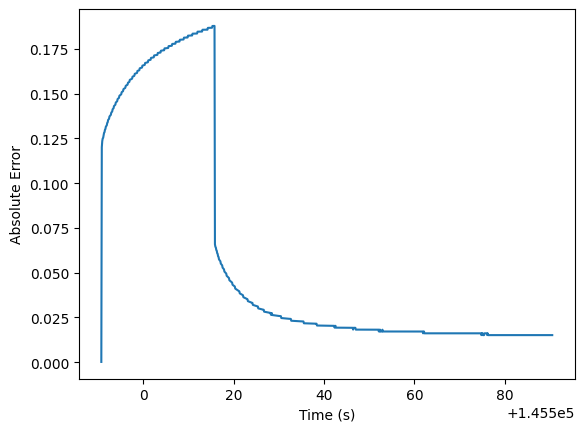

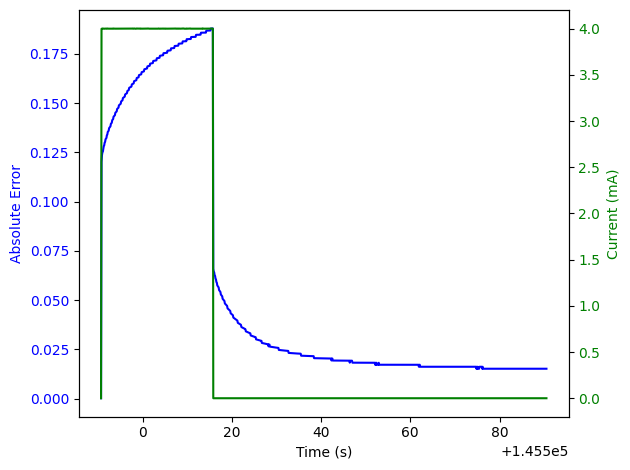

5


Parameters (First Order ECN): 0.015399230038498088 0.004649767511624417 2643.1429032259953


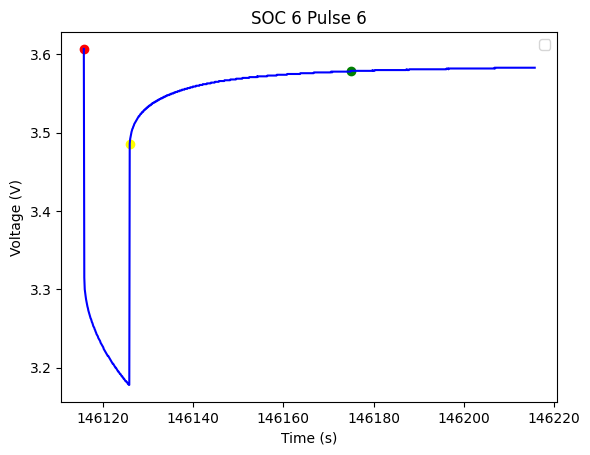

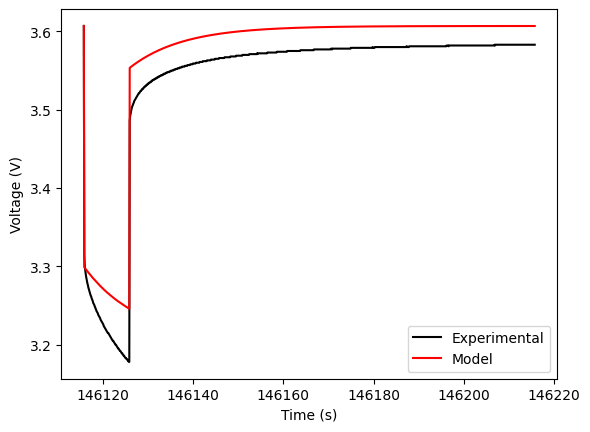

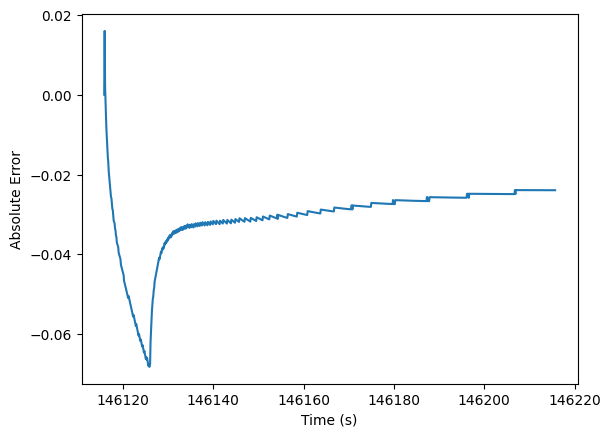

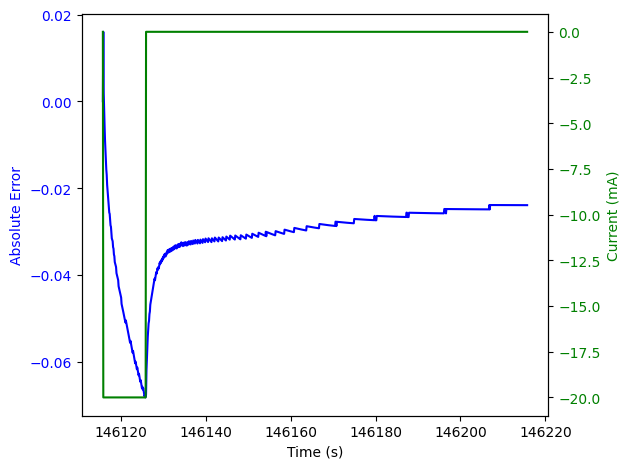

6


Parameters (First Order ECN): 0.015238571071696213 0.007244566575068787 1113.2481034485836


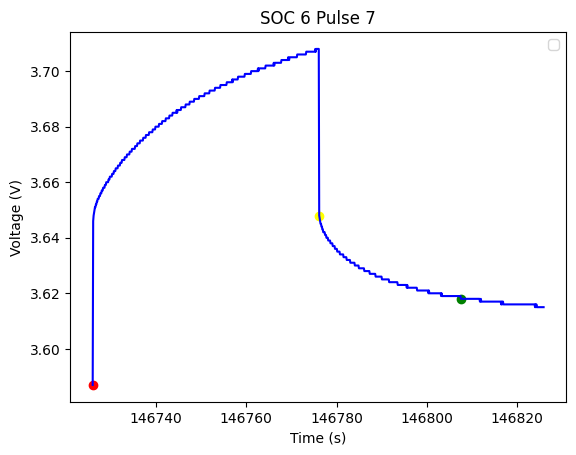

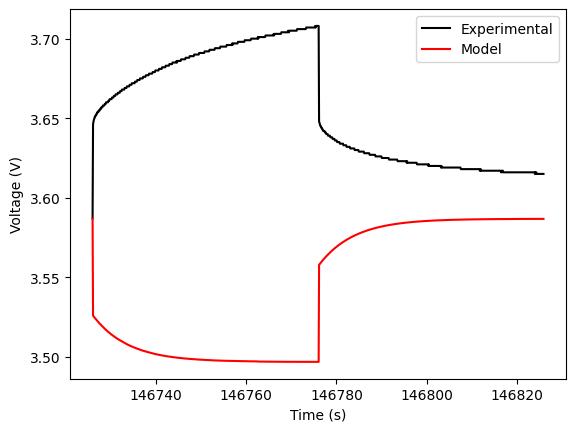

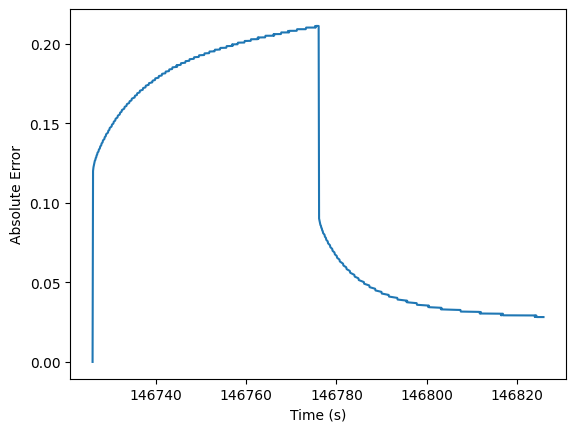

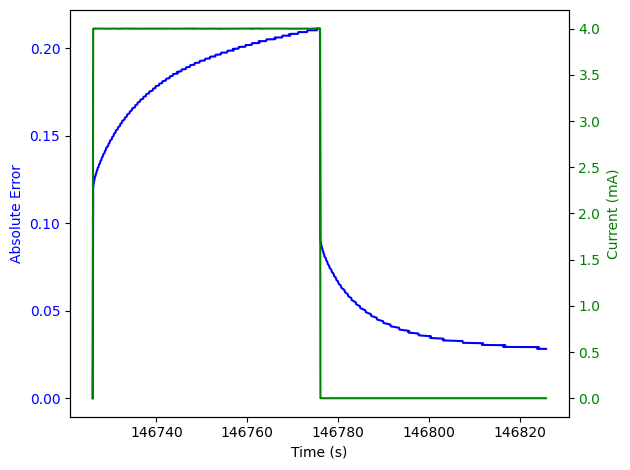

-1


Parameters (First Order ECN): 0.016000000000000014 0.004000000000000094 904.00000000043


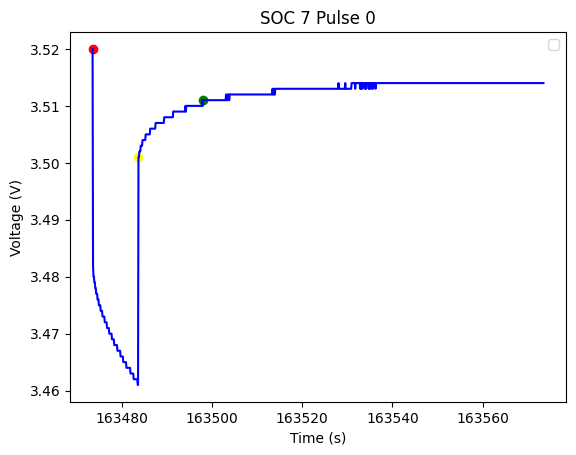

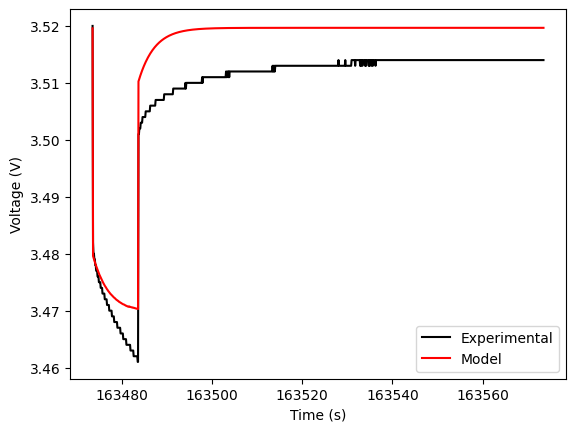

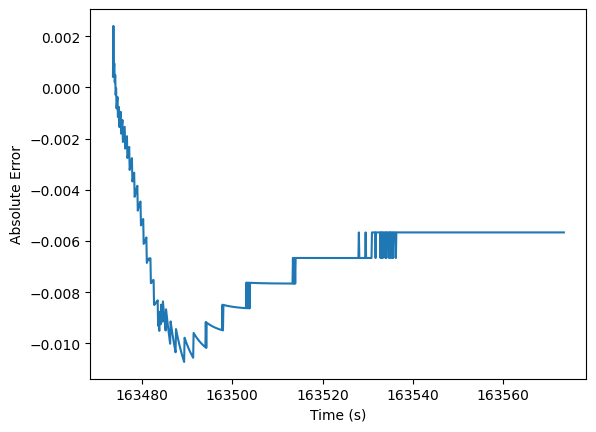

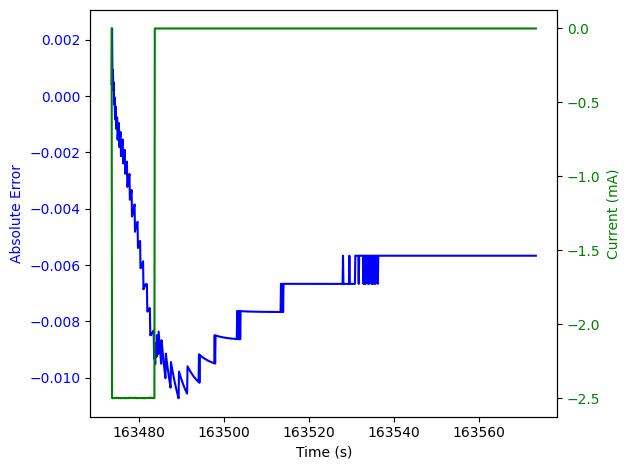

0


Parameters (First Order ECN): 0.015961691939345587 0.005586592178771041 937.8704999992761


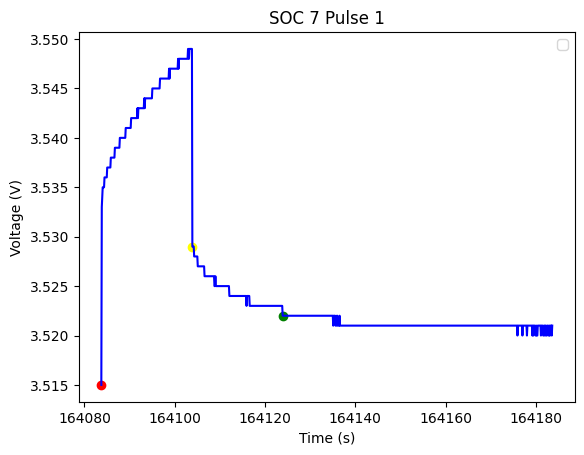

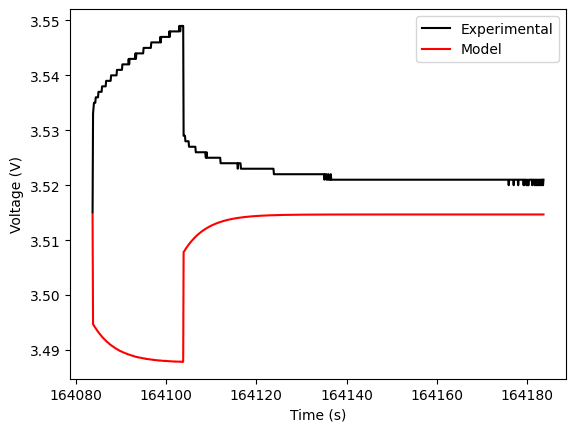

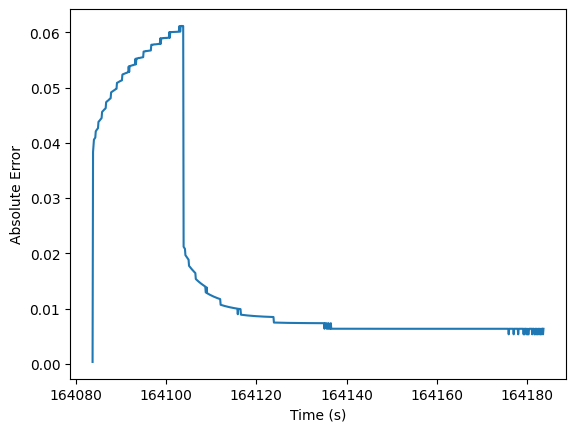

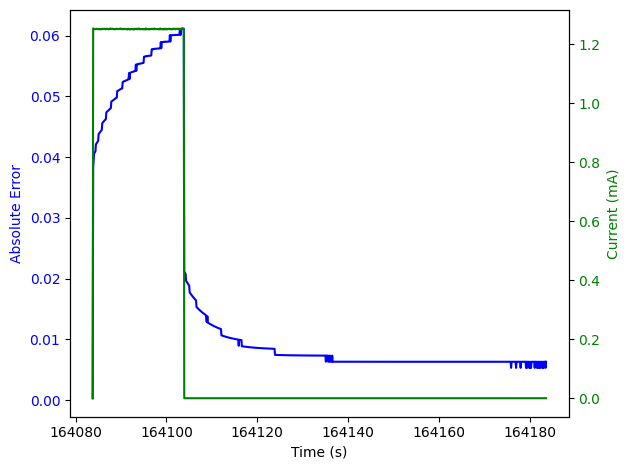

1


Parameters (First Order ECN): 0.01579684063187366 0.004599080183963232 1465.293000000296


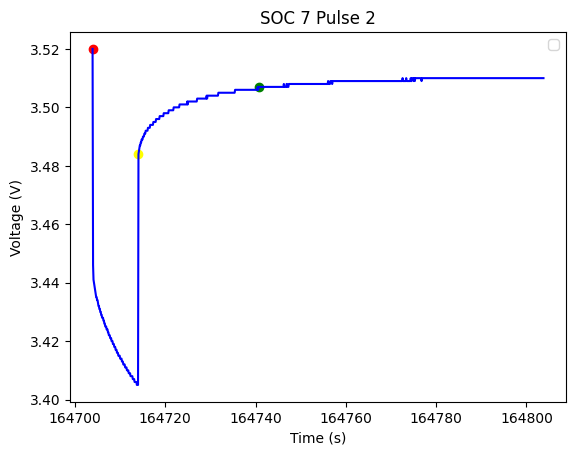

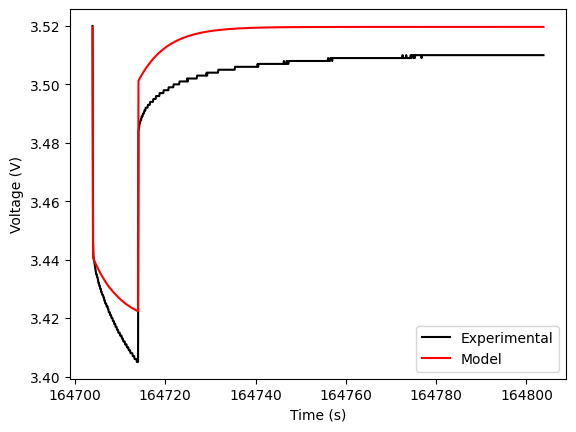

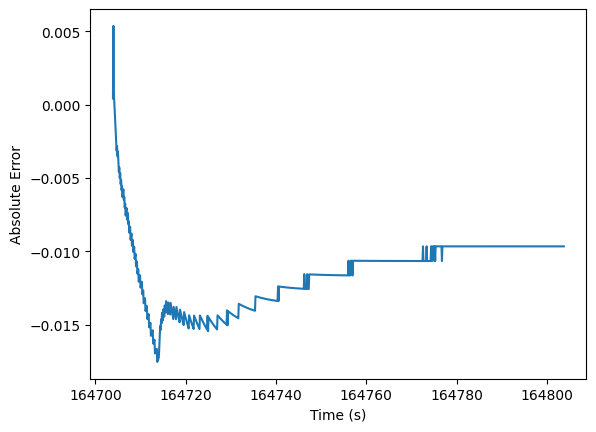

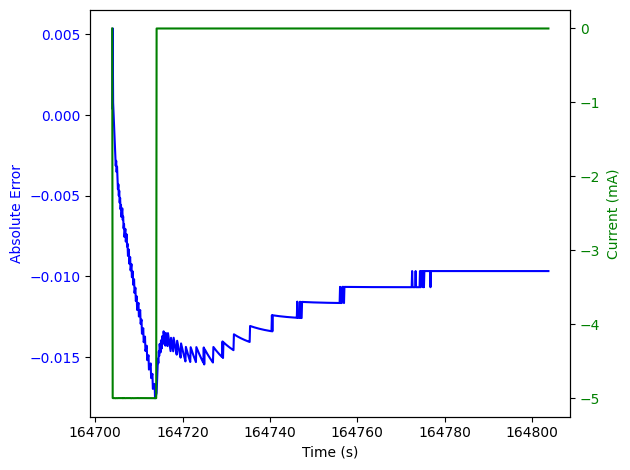

2


Parameters (First Order ECN): 0.015575079872204531 0.005591054313099137 838.6611428568579


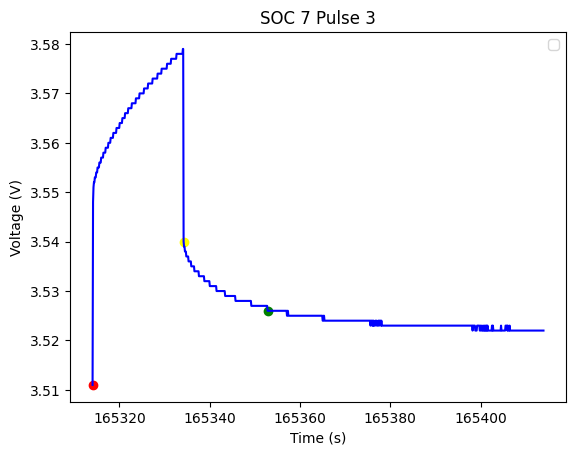

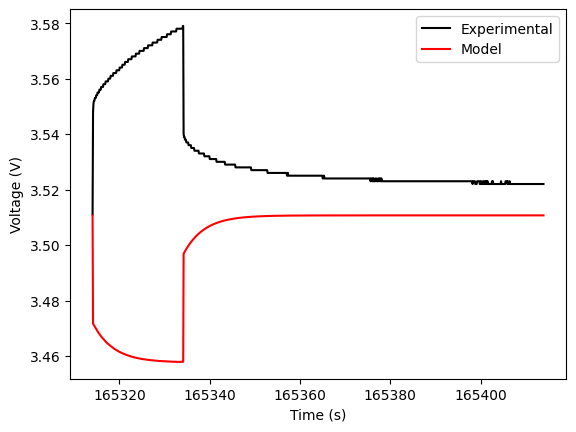

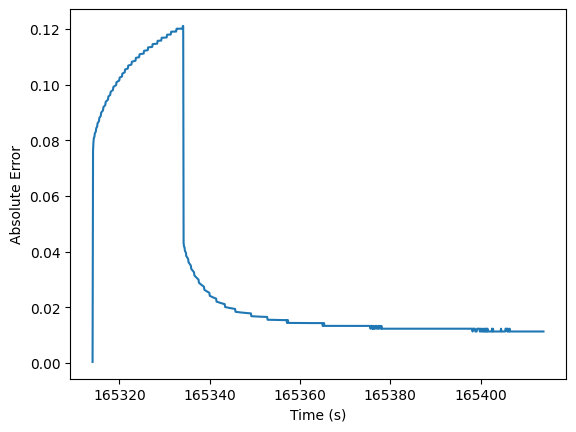

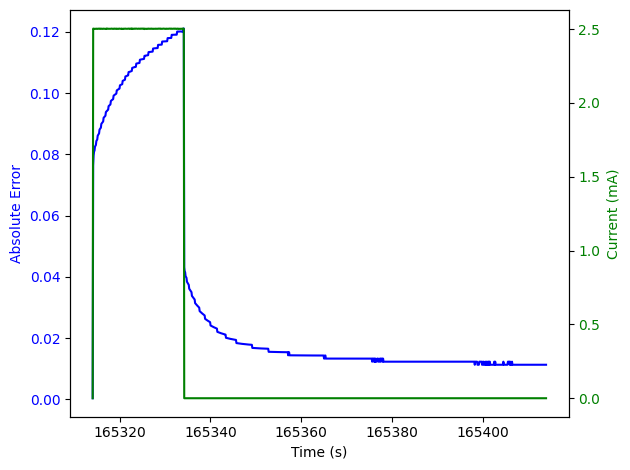

3


Parameters (First Order ECN): 0.015898410158984126 0.004399560043995606 1827.4554545456506


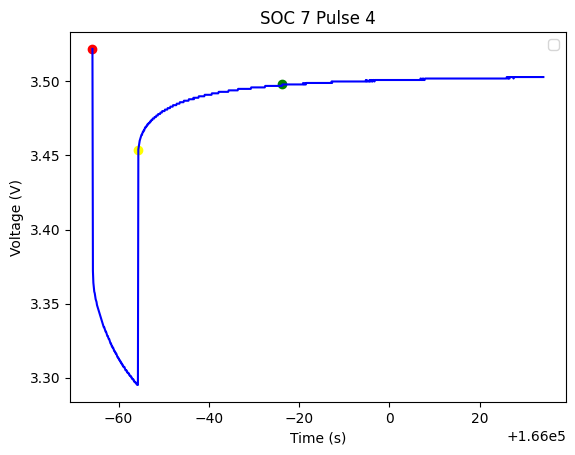

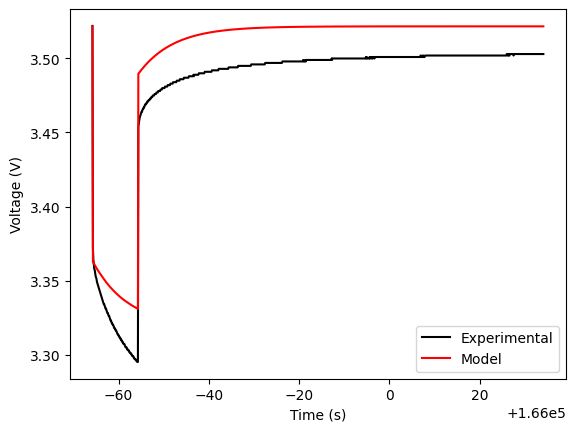

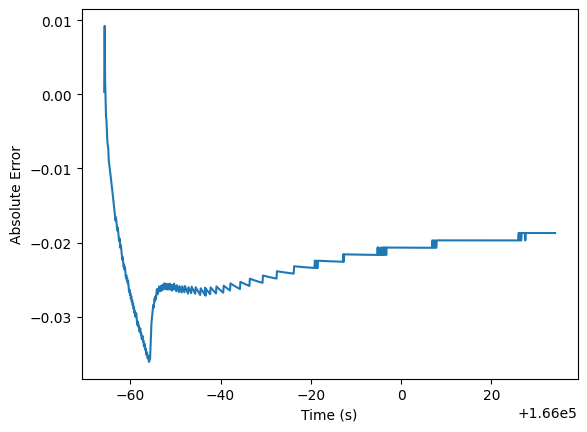

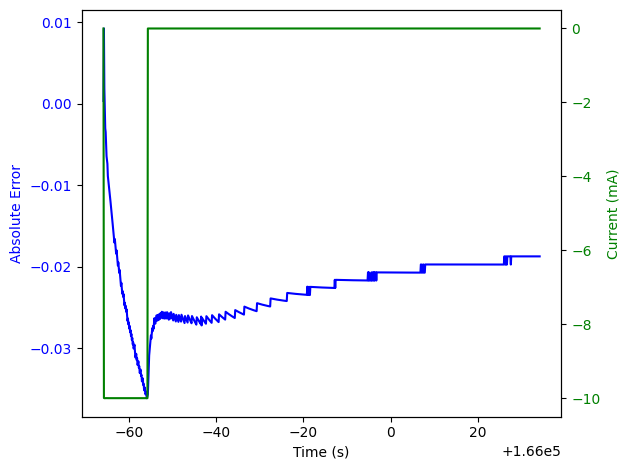

4


Parameters (First Order ECN): 0.015488383712215907 0.0059955033724706525 1003.0850833338081


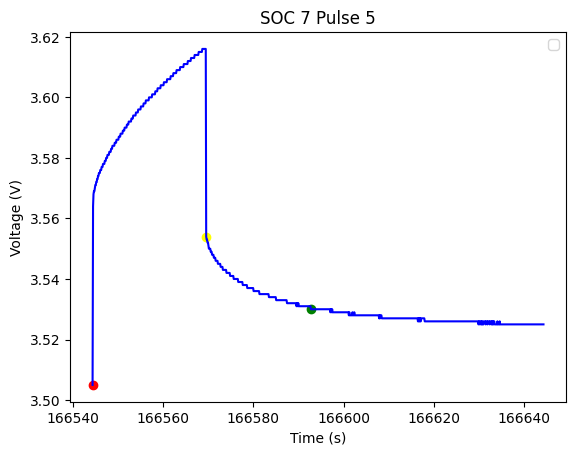

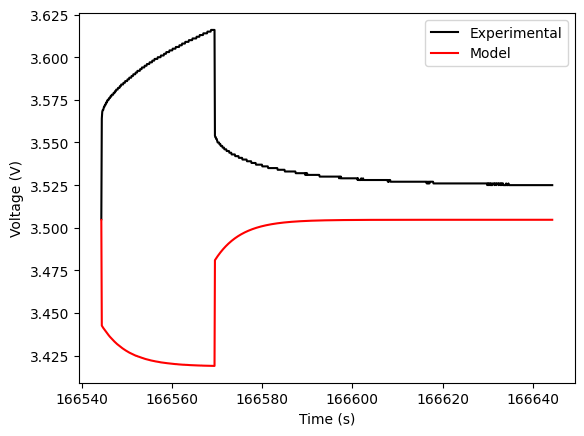

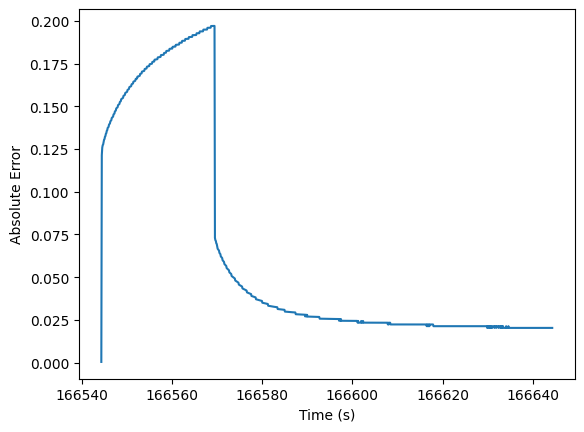

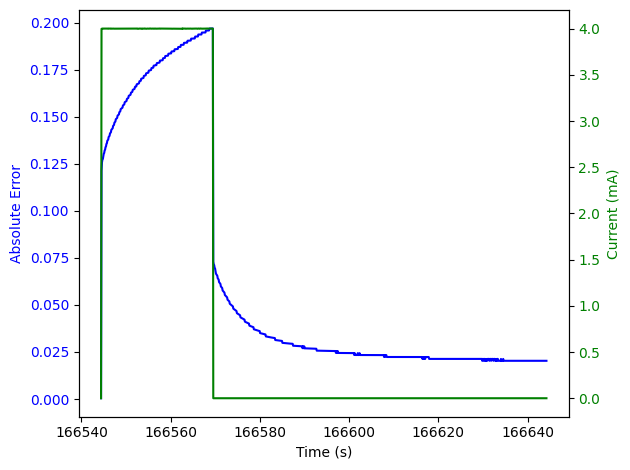

5


Parameters (First Order ECN): 0.016148385161483852 0.004599540045995405 2014.4405543481153


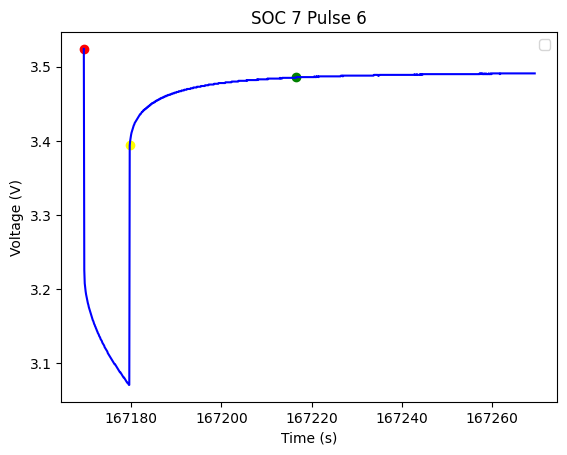

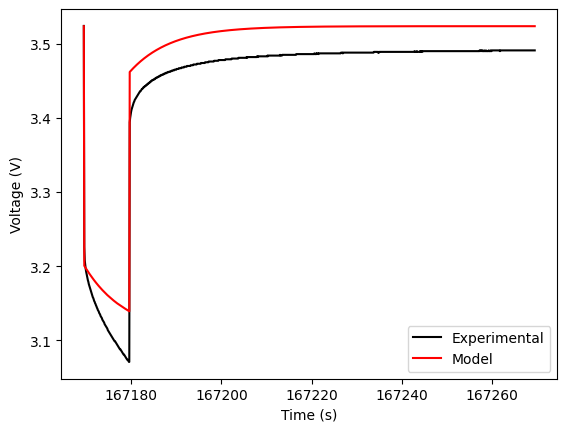

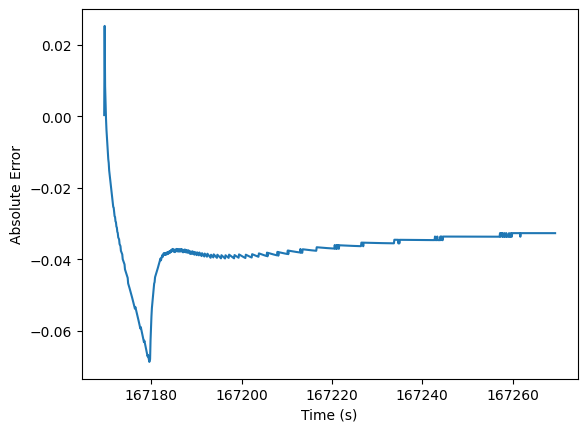

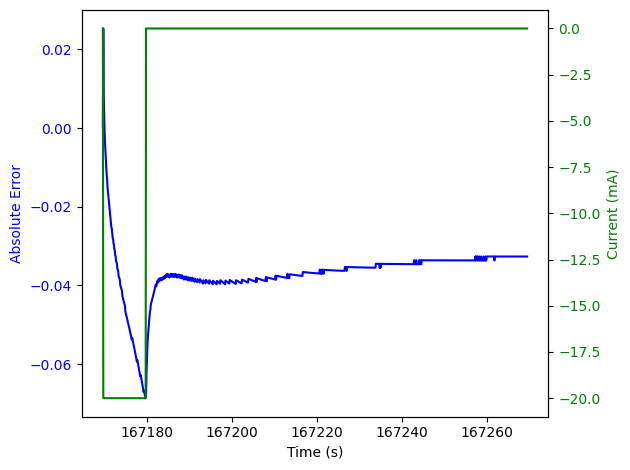

6


Parameters (First Order ECN): 0.017237072195853097 0.006245316012990346 1835.6957399991072


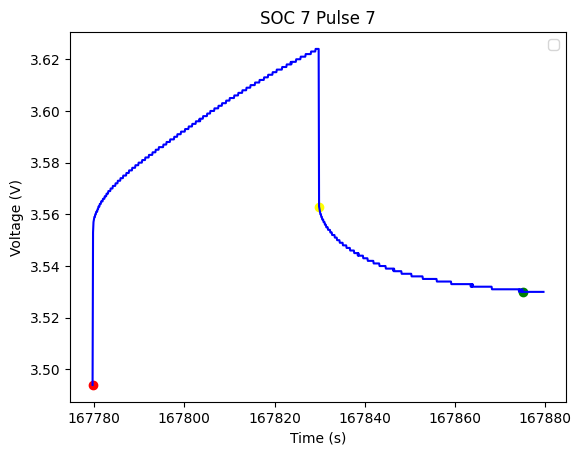

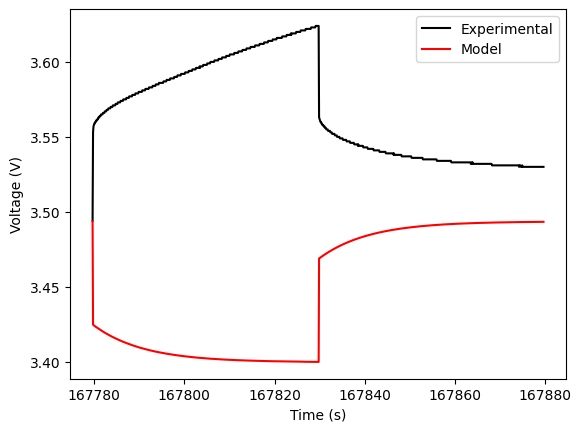

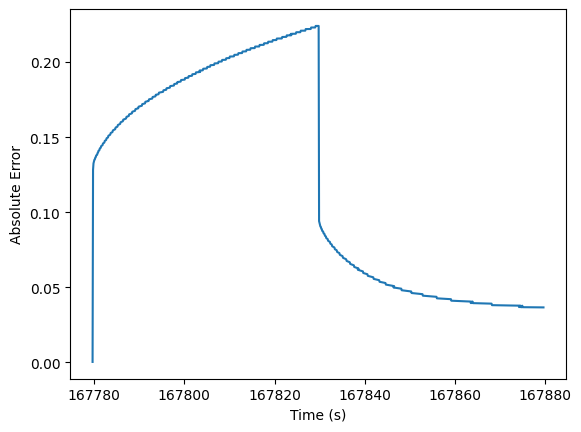

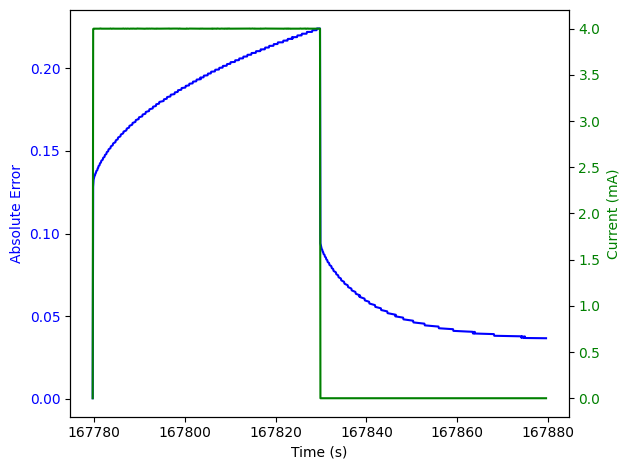

[[[0.015599999999999881, 0.006000000000000227, 998.2495833332526]], [[0.015163607342378396, 0.007182761372705779, 837.3517074998819]], [[0.015393842463014697, 0.006797281087565114, 2331.520470588181]], [[0.015175718849840357, 0.0075878594249201795, 1781.0685126316048]], [[0.015198480151984772, 0.006499350064993539, 2548.793700038391]], [[0.015238571071696213, 0.007244566575068676, 1352.4618620689387]], [[0.014899255037248139, 0.006199690015499252, 2741.8306330646014]], [[0.015234765234765222, 0.008241758241758334, 1312.0986666665788]], [[0.015599999999999881, 0.007200000000000095, 1305.2781249999932]], [[0.015163607342378396, 0.006384676775738233, 648.4275000001933]], [[0.015196960607878437, 0.007198560287942416, 1405.142083333302]], [[0.014776357827476006, 0.007188498402556183, 1316.6171111110673]], [[0.014998500149984993, 0.006699330066993319, 2059.6835597016043]], [[0.014988758431176741, 0.007494379215588369, 2420.54738333325]], [[0.01484851514848516, 0.0057494250574942635, 3134.921

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import least_squares

def FirstOrderECN(t,R0,R1,C1,I,dt,OCV):
    # Initialize i_R1
    i_R1 = np.zeros(len(t))

    # Simulate i_R1 evolution
    for j in range(1, len(t)):
        i_R1[j] = np.exp(-dt/(R1*C1))*i_R1[j-1] + (1-np.exp(-dt/(R1*C1)))*I[j-1]

    #Calculate cell voltage
    modelvol = OCV-(R1*i_R1)-(R0*I)
    return modelvol

def FitFirstOrderECN(t, I, V, dt, OCV):
    # Objective function to minimize
    def objective_function(t, params, I, V, dt, OCV):
        R0, R1, C1 = params
        predvoltage = FirstOrderECN(t, R0, R1, C1, I, dt, OCV)
        residual = predvoltage - V
        return residual

    # Parameters initial guesses (R0, R1, C1)
    InitialGuess = (1, 1, 1)

    # Define the objective function with fixed dt and OCV
    obj_func = lambda params: objective_function(t, params, I, V, dt, OCV)
    result = least_squares(obj_func, InitialGuess)

    # Extract the optimized parameters
    optimized_params = result.x
    return optimized_params

# Task 1 Model Updated
def ECNModel(npulse, nSOC):

    SOCinddata = SOCind[(nSOC)]
    print(npulse-1)
    SOCinddata = SOCinddata[(npulse)]
    t = SOCinddata[1]
    I = SOCinddata[2]
    V = SOCinddata[3]

    # Read the CSV file with space and tab-separated values
    df_soc = pd.read_csv('SOC_OCV_MFCTT_2019.csv', delimiter='\t')

    # Extract SOC and OCV data
    SOC_raw = df_soc['SOC\tEcell/V'].str.split('\t', expand=True)[0].astype(float).values
    OCV_raw = df_soc['SOC\tEcell/V'].str.split('\t', expand=True)[1].astype(float).values

    dSOC = SOC_raw[0]-SOC_raw[1] # SOC step
    dt = t[1]-t[0] # time step

    # Immediate voltage jump in current pulse application
    # Find the maximum/minimum voltage during the pulse
    V_max = max(V)
    V_min = min(V)

    # Find voltage at the moment when current switched to zero
    for i in range(1, len(I)):
        if I[i] == 0 and I[i-1] != 0:
          V_switch = V[i]
          t_switch = t[i]
          break
        else:
          # If loop doesn't find zero current, use first voltage
          V_switch = V[0]
          t_switch = t[0]

    dv0 = abs(V_max-V_switch) if abs(V_max-V_switch) > abs(V_min-V_switch) else abs(V_min-V_switch)

    # Calculate current difference
    di = abs(max(I)-min(I))
    R0 = dv0 / di

    # Find index corresponding to t_switch
    idx_switch = next(i for i, t_val in enumerate(t) if t_val >= t_switch)

    # Find the index of the first voltage value after the current is switched off
    idx_steady_state = None
    steady_state_duration_threshold = 20
    for i in range(idx_switch, len(V)-1):
        if all(abs(V[j] - V[j+1]) < 0.001 for j in range(i, min(i + int(steady_state_duration_threshold / dt), len(V)-1))):
        #if abs(V[i] - V[i+1]) < 0.001:
            idx_steady_state = i
            break
    if idx_steady_state is not None:
        V_steady_state = V[idx_steady_state]
    else:
        # Handle the case where steady state is not found
        V_steady_state = None

    dvinf = abs(V_steady_state-V_max) if abs(V_steady_state-V_max) > abs(V_steady_state-V_min) else abs(V_steady_state-V_min)
    R1 = (dvinf / di) - R0

    # Time to settle after pulse application
    Vmax = V[V==V_max]
    tmax = t[V==Vmax[0]]
    Vmin = V[V==V_min]
    tmin = t[V==Vmin[0]]
    dt_steady_state = t[idx_steady_state]-tmax[0] if abs(V_steady_state-V_max) > abs(V_steady_state-V_min) else t[idx_steady_state]-tmin[0]
    C1 = dt_steady_state / (4 * R1)

    Parameters = [R0,R1,C1]

    plt.figure()
    plt.plot(t, V, color='blue')
    plt.scatter(t_switch, V_switch, color='yellow')
    if len(V[V==V_max])<len(V[V==V_min]):
      plt.scatter(tmax[0], V_max, color='red')
    else:
      plt.scatter(tmin[0], V_min, color='red')
    plt.scatter(t[idx_steady_state], V_steady_state, color='green')
    plt.title(f'SOC {nSOC} Pulse {npulse}')
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.legend()

    print("Parameters (First Order ECN):", R0, R1, C1)

    Qn = 2500 # nominal capacity in mAh

    SOC = np.zeros(np.shape(t)) # SOC at each time step in discharge

    # calculating initial SOC - will match OCV due to long hold
    found = 0
    i = 0
    while not found:
        if V[0] > OCV_raw[i]:
            if abs(V[0] - OCV_raw[i]) < abs(V[0] - OCV_raw[i-1]):
                SOC[0] = SOC_raw[i]
            else:
                SOC[0] = SOC_raw[i-1]
            found = 1
        else:
            i += 1

    for j in range(1,len(t)):
        SOC[j] = SOC[j-1] - 100*(I[j]*dt/3600)/Qn # SOC as percentage

    SOC_ind = ((SOC_raw[0]-SOC)/dSOC-3).astype(int) # array with index corresponding to current SOC value
    OCV = OCV_raw[SOC_ind] # OCV at each time step in discharge

    # Calculate model voltage
    V_model = FirstOrderECN(t, R0, R1, C1, I, dt, OCV) if abs(V_steady_state-V_max) > abs(V_steady_state-V_min) else FirstOrderECN(t, -R0, -R1, -C1, I, dt, OCV)

    fig, ax = plt.subplots()
    plt.plot(t,V,'k')
    plt.plot(t,V_model,'r')
    plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
    plt.legend(['Experimental','Model'])
    plt.show()

    err = V-V_model # Error between experimental and model voltage
    plt.plot(t,err)
    plt.xlabel('Time (s)')
    plt.ylabel('Absolute Error')
    plt.show()

    # Overlaying current
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Absolute Error', c='b')
    ax1.plot(t,err,'b')
    ax1.tick_params(axis='y', labelcolor='b')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Current (mA)', c='g')
    ax2.plot(t,I,'g')
    ax2.tick_params(axis='y', labelcolor='g')

    fig.tight_layout()
    plt.show()

    return Parameters

AllSOCParam = []
AverageParam = []
for i, pulses in enumerate(SOCpulseintervals):
  for j in enumerate(pulses):
    Parameters = ECNModel(j[0],i)
    AllSOCParam.append([Parameters])
print(AllSOCParam)